<img src="VoicefortheOcean_Spotlight_Banner_1.jpg" />

<h1>Résultat VFTO final<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Nombre-de-participants" data-toc-modified-id="Nombre-de-participants-1">Nombre de participants</a></span></li><li><span><a href="#Questionnaire" data-toc-modified-id="Questionnaire-2">Questionnaire</a></span></li><li><span><a href="#Résultat-global" data-toc-modified-id="Résultat-global-3">Résultat global</a></span></li><li><span><a href="#Par-profil" data-toc-modified-id="Par-profil-4">Par profil</a></span></li><li><span><a href="#Par-tranche-d'âge" data-toc-modified-id="Par-tranche-d'âge-5">Par tranche d'âge</a></span></li><li><span><a href="#Par-genre" data-toc-modified-id="Par-genre-6">Par genre</a></span></li><li><span><a href="#Par-profession" data-toc-modified-id="Par-profession-7">Par profession</a></span></li><li><span><a href="#Par-implication" data-toc-modified-id="Par-implication-8">Par implication</a></span></li><li><span><a href="#Par-pays/continent" data-toc-modified-id="Par-pays/continent-9">Par pays/continent</a></span></li></ul></div>

In [1]:
import os
import re
import textwrap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import country_converter as coco
# import geopandas as gp
# import cartopy.crs as ccrs
# from shapely.geometry import Point
# from shapely import ops
%matplotlib inline
plt.style.use('ggplot')
os.chdir('/data/backup/Surfrider/')
pd.set_option("display.max_colwidth",200)
pd.set_option("display.max_columns",250)
pd.set_option("display.max_rows",250)

In [2]:
# Questions
theme = pd.read_csv("VFTO/theme.csv", sep=";")
questionnaire = pd.read_csv("VFTO/questionnaire.csv", sep=";")
question = pd.read_csv("VFTO/question.csv", sep=";")
question_block = pd.read_csv("VFTO/question_block.csv", sep=";").fillna(0)
question_block["questionnaire_id"] = question_block.questionnaire_id.astype(int)

res = theme[["id","name","language_id"]]
res.columns = ["theme_id","theme","language_id"]
res = pd.merge(questionnaire, res, how='left').rename(columns={"id":"questionnaire_id", "name":"questionnaire"})
res = res[["questionnaire_id","questionnaire","theme","language_id"]]
res = pd.merge(question_block,res,how="left").rename(columns={"id":"question_block_id", "name":"question_block"})
res = res[["question_block_id", "question_block", "questionnaire", "theme", "language_id"]]
res = pd.merge(question, res, how="left").rename(columns={"id":"reponse_id", "title":"reponse", 
                                                          "question_block": "question"})

VFTO = res[["theme","questionnaire","question","reponse","question_block_id","reponse_id","language_id"]]

In [3]:
VFTO.iloc[[0,67,134,201,268,335],]

theme  \
0            POLLUTION DES OCEANS   
67        Замърсяване на океаните   
134               Ocean pollution   
201  Contaminación de los océanos   
268          Poluição dos oceanos   
335   Verschmutzung der Weltmeere   

                                                questionnaire  \
0                      La pollution microplastique des océans   
67   La pollution microplastique des océans (bg - pratiquant)   
134  La pollution microplastique des océans (en - pratiquant)   
201  La pollution microplastique des océans (es - pratiquant)   
268  La pollution microplastique des océans (pt - pratiquant)   
335  La pollution microplastique des océans (de - pratiquant)   

                                                                                                                                                         question  \
0                                    Quelles sont, selon vous, les actions prioritaires à mener contre la pollution du milieu aquatique par les microplastiques ?   
67                              Какви са според Вас приоритетните действия, които трябва да бъдат предприети срещу замърсяване на водната среда с микропластмаси?   
134                                                                              In your opinion, what actions should be taken to control microplastic pollution?   
201              ¿Cuáles son, a su parecer, las acciones prioritarias que deberían llevarse a cabo contra la contaminación del medio acuático por microplásticos?   
268                               Na sua opinião, quais são as ações prioritárias que devem ser tomadas contra a poluição do meio aquático pelos micro-plásticos?   
335  Was sind Ihrer Meinung nach die vorrangigen Maßnahmen, welche im Kampf gegen die Verschmutzung unserer Gewässer durch Mikroplastik getroffen werden sollten?   

                                                                                                                                   reponse  \
0                      Installer des systèmes dans les stations d’épuration pour filtrer les microplastiques avant la sortie de la station   
67   да инсталира в пречиствателните станции за отпадни води системи, способни да улавят микропластмасите, преди те да напуснат станцията.   
134                                          Install systems in water treatment plants to filter microplastics before they leave the plant   
201                                                                  Instalar sistemas en las depuradoras para filtrar los microplásticos.   
268     Instalar, nas estações de tratamento de água, os devidos sistemas para filtrar os micro-plásticos antes que a água saia da estação   
335                     Kläranlagen mit speziellen Filtersystemen ausrüsten, um das Mikroplastik vor dem Verlassen der Anlagen aufzufangen   

     question_block_id  reponse_id  language_id  
0                    1           3          1.0  
67                  16          71          2.0  
134                 31         139          3.0  
201                 46         207          4.0  
268                 61         275          5.0  
335                 76         343          6.0

In [4]:
# Tableau de conversion des numéros de questions par langues
cols = ["res1","res2"]
conversion = pd.DataFrame(columns=cols)
tmp = VFTO[VFTO.language_id==1][["reponse_id"]]

for i in range(1,7):
    j = VFTO[VFTO.language_id==i][["reponse_id"]]
    j.reset_index(inplace=True, drop=True)
    res = pd.concat([j,tmp],axis=1)
    res.columns = cols
    conversion = pd.concat([conversion,res],axis=0)
conversion.reset_index(inplace=True, drop=True)
conversion[conversion.res2 == 3]

res1 res2
0      3    3
59    71    3
118  139    3
177  207    3
236  275    3
295  343    3

In [5]:
# Tableau des réponses
with open(u"VFTO/utilisateur_final.csv") as file:
    raw_answers = file.read()
raw_answers = [''.join(i for i in raw_answers if i not in list('{}[]_"'))]
raw_answers = raw_answers[0].split("\n")
raw_answers[161]

'188;DUPOUY;Thomas;2;1;Grenoble, France;thomas.mylab33@gmail.com;2;sf2attributes:whoiam:1,theme1:1,theme2:1,theme3:1,theme4:1,q1:3,4,5,6,q2:7,8,9,10,q3:15,11,12,13,14,q6:25,27,24,26,q4:19,q5:22,q7:28,q8:30,q9:37,q10:42,q11:47,q12:50,q13:52,53,55,q14:59,60,61,62,q0:2,4,5,:null,user:nom:DUPOUY,prenom:Thomas,genre:2,age:39,profession:1,ville:Grenoble, France,implication:2,sf2flashes:,sf2meta:u:1528121234,c:1528120515,l:0;39;NULL'

In [6]:
# Liste des villes renseignées par les utilisateurs
localisation = pd.read_csv("localisation.csv")
localisation = localisation.drop_duplicates()
del localisation["genre"]
localisation.head()

ville  \
0                      nouméa   
1                     Belfast   
2                      Exeter   
3                     Lauzach   
4  01300 Saint-Benoît, France   

                                                                            localisation  
0                                Nouméa, Province Sud, Nouvelle-Calédonie, 98800, France  
1                                  Belfast, County Antrim, Northern Ireland, BT1 5GS, UK  
2                                         Exeter, Devon, South West England, England, UK  
3              Lauzach, Vannes, Morbihan, Bretagne, France métropolitaine, 56190, France  
4  Saint-Benoît, Belley, Ain, Auvergne-Rhône-Alpes, France métropolitaine, 01300, France

In [159]:
keys = ["whoiam", "genre", "age", "profession", "implication"]

# Dict de remplacement des ids des questions 
qids = {}
for i in np.arange(1,15):
    qids["q%d" % i] = ["q%d" % i] + ["q%d" % s for s in np.arange(15+i,100,15)[:5]]
qids['q0'] = ['q0']

# Filtre sur les listes de questions
re_quest = re.compile("(q\d+:(?:\d+,)+)")
re_infos = re.compile("(\w+):(\d+),")
res = {}
tot = []
for line in [str(i) for i in raw_answers if i]:
    quest = re.findall(re_quest, line)
    infos = re.findall(re_infos, line)
    # Informations utilisateurs
    for key, val in infos:
        if key in keys:
            try:
                res[key].append(val)
            except KeyError:
                res[key] = [val]
    
    # Emplacement géographique
    ville = line.split(";")[5]
    try:
        res["ville"].append(ville)
    except KeyError:
        res["ville"] = [ville]
    
    # Réponses
    for i in quest:
        qid, answers = i.split(":")
        qid = list(m for m in qids.keys() if qid in qids[m])[0]
        for j, k in enumerate(answers.split(",")[:-1]):
            k = np.int(k)
            key = "%s.%d" % (qid, j) # q0.0
            try:
                res[key].append(k)
            except KeyError:
                res[key] = [k]
                

# Conversion en Dataframe
reponses = pd.DataFrame.from_dict(res, orient='index').transpose()

# Remplacement des n° de réponses par les n° français
reponses = reponses.replace(conversion.res1.tolist(), conversion.res2.tolist())

# Enregistrement des réponses dans un fichier (bug Pandas)
reponses.to_csv("reponses.csv",float_format="%d" , index=False)

# Relecture du fichier des réponses
reponses = pd.read_csv("reponses.csv")

# Pour calculer le nombre de réponses par groupes 
reponses["cnt"] = 1

# Conversion de l'âge en tranche d'âge
reponses["age"] = pd.cut(reponses.age, [0, 17, 24, 34, 44, 59, 100], labels=["0_17", "18_24", "25_34", "35_45", "45_59", "59_100"])

# Remplacement du profil (whoiam) par version explicite
reponses["whoiam"] = reponses.whoiam.replace([1.0, 2.0, 3.0, 4.0], ["sportif nautique", "professeur(e)", "expert(e)", "citoyen(ne)"])
reponses.rename({"whoiam": "profil"}, axis="columns", inplace=True)

# Remplacement du genre par version explicite
reponses["genre"] = reponses.genre.replace([1, 2, 3], ["femme", "homme", "autre"])

# Remplacement de la profession par version explicite
reponses["profession"] = reponses.profession.replace([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0],
                                                    ["fermier(e)", "indépendant(e)", "cadre", "cadre senior",
                                                    "cadre moyen", "employé(e)", "ouvrier(e)", "autre"])

# Remplacement de l'implication' par version explicite
reponses["implication"] = reponses.implication.replace([1, 2, 3, 4], ["très intéressé(e)", "assez intéressé(e)",
                                                                      "pas vraiment intéressé(e)", "pas du tout intéressé(e)"])

# Localisation
reponses = reponses.merge(localisation, how='left', on='ville')
reponses["pays"] = reponses.localisation.map(lambda row: row.split(",")[-1].strip(), na_action="ignore")
reponses["pays"] = coco.convert(names=reponses.pays.tolist(), to='ISO3', not_found='WORLD')

reponses.head()

profil  genre    age      profession         implication  \
0       citoyen(ne)  femme  25_34  indépendant(e)   très intéressé(e)   
1       citoyen(ne)  femme  25_34  indépendant(e)  assez intéressé(e)   
2  sportif nautique  femme  18_24           cadre   très intéressé(e)   
3       citoyen(ne)  femme  18_24           cadre   très intéressé(e)   
4       citoyen(ne)  homme  25_34  indépendant(e)   très intéressé(e)   

               ville  q1.0  q1.1  q1.2  q1.3  q3.0  q3.1  q3.2  q3.3  q3.4  \
0              Paris   5.0   4.0   3.0   6.0  14.0  11.0  12.0  13.0  15.0   
1              Paris   3.0   5.0   4.0   6.0  11.0  15.0  14.0  13.0  12.0   
2              Paris   3.0   5.0   6.0   4.0  14.0  12.0  13.0  11.0  15.0   
3      Paris, France   5.0   4.0   3.0   6.0  14.0  11.0  15.0  13.0  12.0   
4  Montrouge, France   5.0   3.0   6.0   4.0  14.0  15.0  13.0  11.0  12.0   

   q2.0  q2.1  q2.2  q2.3  q6.0  q6.1  q6.2  q6.3  q4.0  q5.0  q7.0  q8.0  \
0   7.0   8.0  10.0   9.0  27.0  26.0  24.0  25.0  18.0  20.0  28.0  30.0   
1   8.0   7.0  10.0   9.0  27.0  24.0  26.0  25.0  18.0  23.0  28.0  33.0   
2   8.0   7.0  10.0   9.0  27.0  25.0  26.0  24.0  19.0  23.0  28.0  33.0   
3   7.0   8.0  10.0   9.0  27.0  25.0  24.0  26.0  18.0  20.0  28.0  30.0   
4   8.0  10.0   7.0   9.0  24.0  27.0  26.0  25.0  18.0  20.0  28.0  30.0   

   q9.0  q10.0  q11.0  q12.0  q13.0  q13.1  q13.2  q14.0  q14.1  q14.2  q14.3  \
0  37.0   41.0   47.0   50.0   52.0   53.0   55.0   59.0   60.0   61.0   62.0   
1  37.0   40.0   43.0   50.0   52.0   55.0   57.0   61.0   59.0   60.0   62.0   
2  34.0   42.0   47.0   50.0   55.0   56.0   57.0   60.0   61.0   62.0   59.0   
3  37.0   40.0   44.0   48.0   52.0   53.0   57.0   59.0   61.0   60.0   62.0   
4  37.0   38.0   44.0   50.0   52.0   55.0   56.0   60.0   59.0   61.0   62.0   

   q13.3  q13.4  q13.5  q0.0  q0.1  q0.2  q0.3  q0.4  q0.5  q0.6  cnt  \
0   57.0   56.0   57.0   1.0   3.0   5.0   6.0   5.0   7.0   8.0    1   
1   55.0   57.0   57.0   1.0   2.0   5.0   5.0   7.0   NaN   NaN    1   
2   55.0   56.0   57.0   1.0   2.0   3.0   5.0   8.0   NaN   NaN    1   
3    8.0   56.0   57.0   1.0   4.0   7.0   7.0   7.0   NaN   NaN    1   
4    8.0   56.0    NaN   1.0   3.0   5.0   7.0   6.0   NaN   NaN    1   

                                                                             localisation  \
0                                     Paris, Île-de-France, France métropolitaine, France   
1                                     Paris, Île-de-France, France métropolitaine, France   
2                                     Paris, Île-de-France, France métropolitaine, France   
3                                     Paris, Île-de-France, France métropolitaine, France   
4  Montrouge, Antony, Hauts-de-Seine, Île-de-France, France métropolitaine, 92120, France   

  pays  
0  FRA  
1  FRA  
2  FRA  
3  FRA  
4  FRA

In [160]:
def moyenne_ponderee(q, scope=None):
    
    idx = [reponses[i].value_counts() for i in reponses.columns if i.startswith("q%d." % q) or i == "q%d" % q]
    res = pd.DataFrame(idx).fillna(0)
    # Bug incompréhensible
    if q == 13:
        del res[8]
    if scope:
        tot = pd.DataFrame()
        for i, j in enumerate(res.index):
            r = reponses.groupby([scope,j])[j].size().unstack(fill_value=0).transpose()
            mult = len(res.index) - i
            r = r * mult
            tot = tot.append(r)    
        res = tot.groupby(tot.index).sum().div(np.arange(1,len(tot.index) + 1).sum())
    else:
        mult = np.arange(1, len(res.index)+1)[::-1]
        res = res.multiply(mult, axis=0).sum().div(mult.sum())
    if q == 0:
        res.index = VFTO[VFTO.question_block_id == 0].reponse
    else:
        idx = res.index.tolist()
        res.index = [VFTO[VFTO.reponse_id == x].reponse.iloc[0] for x in idx]
    
    res.index = [textwrap.fill(s, 40) for s in res.index.tolist()]
    return(res)

In [161]:
def moyenne_ponderee_pct(q, scope=None):
    if scope:
        res = moyenne_ponderee(q, scope)
        tot = res.sum().sum()
        res = (res * 100 / tot).round().astype("int")
    else:
        res = moyenne_ponderee(q)
        res = (res * 100 / res.sum()).round().astype("int")
    res = pd.DataFrame(res)
    if scope:
        res.columns.name = "% des votes"
    else:
        res.columns=["% des votes"]
    resid = 100 - res.sum().sum()
    res.loc[res.idxmax()[0], res.idxmax(axis=1)[0]] += resid
    return(res)

In [162]:
def plot_moyenne_pct(q, scope=None):
    if scope:
        res = moyenne_ponderee_pct(q, scope)
        legend = True
    else:
        res = moyenne_ponderee_pct(q)
        legend = False
    text = textwrap.fill(VFTO[VFTO.question_block_id == q].question.iloc[0], 64)
    ax = res.plot(figsize=(10,10), kind='barh', stacked=True, title="%s" % text, legend=legend)
    _ = ax.set_xlabel("% des votes")
    _ = ax.set_ylabel("")

In [163]:
def plot_khi_2(q, scope):
    plt.figure(figsize=(10,10))
    text = textwrap.fill(VFTO[VFTO.question_block_id == q].question.iloc[0], 64)
    # Récupération des résultats en %
    res = moyenne_ponderee_pct(q, scope)
    # khi2, pvalue, degrees, expected = chi2_contingency(res)
    # Calcul et heatmap du taux de corrélation
    tx = pd.DataFrame(res.sum(axis=1))
    ty = pd.DataFrame(res.sum())
    tx.columns = ["foo"]
    ty.columns = ["foo"]
    expected = (tx.dot(ty.T)).div(res.sum().sum(), fill_value=0)
    mesure = ((res - expected)**2 ).div(expected, fill_value=0).fillna(0)
    try:
        assert res.columns.dtype == 'category'
        res.columns = res.columns.add_categories(["Total"])
        mesure.columns = mesure.columns.add_categories(["Total"])
    except (AssertionError, TypeError):
        pass
    res["Total"] = tx
    mesure["Total"] = .5
    ax = sns.heatmap(mesure, annot=res, vmin=0, vmax=1, cmap="Blues", square=True, cbar=False)
    ax.set_title(text)

# Nombre de participants

In [164]:
len(reponses)

6877

# Questionnaire

## Question 0

In [165]:
VFTO[VFTO.question_block_id == 0].set_index("reponse_id")

theme questionnaire  \
reponse_id                       
1000         NaN           NaN   
1001         NaN           NaN   
1002         NaN           NaN   
1003         NaN           NaN   
1004         NaN           NaN   
1005         NaN           NaN   
1006         NaN           NaN   
1007         NaN           NaN   

                                                                                                                         question  \
reponse_id                                                                                                                          
1000        Parmi les 8 thèmes abordés, quelles sont vos trois priorités ou préoccupations majeures dont l'UE devrait se saisir ?   
1001        Parmi les 8 thèmes abordés, quelles sont vos trois priorités ou préoccupations majeures dont l'UE devrait se saisir ?   
1002        Parmi les 8 thèmes abordés, quelles sont vos trois priorités ou préoccupations majeures dont l'UE devrait se saisir ?   
1003        Parmi les 8 thèmes abordés, quelles sont vos trois priorités ou préoccupations majeures dont l'UE devrait se saisir ?   
1004        Parmi les 8 thèmes abordés, quelles sont vos trois priorités ou préoccupations majeures dont l'UE devrait se saisir ?   
1005        Parmi les 8 thèmes abordés, quelles sont vos trois priorités ou préoccupations majeures dont l'UE devrait se saisir ?   
1006        Parmi les 8 thèmes abordés, quelles sont vos trois priorités ou préoccupations majeures dont l'UE devrait se saisir ?   
1007        Parmi les 8 thèmes abordés, quelles sont vos trois priorités ou préoccupations majeures dont l'UE devrait se saisir ?   

                                                                reponse  \
reponse_id                                                                
1000                             La pollution microplastique des océans   
1001                             La qualité de l'eau en milieu nautique   
1002                   Les énergies fossiles et l'exploitation offshore   
1003                    Vers un transport maritime plus éco-responsable   
1004                                 Les énergies marines renouvelables   
1005                                       Le partage des connaissances   
1006        Les risques liés au changement climatique en zone littorale   
1007                               Le tourisme durable et le patrimoine   

            question_block_id  language_id  
reponse_id                                  
1000                        0          NaN  
1001                        0          NaN  
1002                        0          NaN  
1003                        0          NaN  
1004                        0          NaN  
1005                        0          NaN  
1006                        0          NaN  
1007                        0          NaN

## Question 1

In [166]:
VFTO[VFTO.question_block_id == 1].set_index("reponse_id")

theme                           questionnaire  \
reponse_id                                                                 
3           POLLUTION DES OCEANS  La pollution microplastique des océans   
4           POLLUTION DES OCEANS  La pollution microplastique des océans   
5           POLLUTION DES OCEANS  La pollution microplastique des océans   
6           POLLUTION DES OCEANS  La pollution microplastique des océans   

                                                                                                                                question  \
reponse_id                                                                                                                                 
3           Quelles sont, selon vous, les actions prioritaires à mener contre la pollution du milieu aquatique par les microplastiques ?   
4           Quelles sont, selon vous, les actions prioritaires à mener contre la pollution du milieu aquatique par les microplastiques ?   
5           Quelles sont, selon vous, les actions prioritaires à mener contre la pollution du milieu aquatique par les microplastiques ?   
6           Quelles sont, selon vous, les actions prioritaires à mener contre la pollution du milieu aquatique par les microplastiques ?   

                                                                                                                          reponse  \
reponse_id                                                                                                                          
3             Installer des systèmes dans les stations d’épuration pour filtrer les microplastiques avant la sortie de la station   
4                        Créer un label européen permettant de savoir en un coup d’œil si le produit contient des microplastiques   
5           Interdire les composés microplastiques ajoutés intentionnellement aux produits de soins, détergents et aux peintures.   
6                   Allouer des fonds à la recherche scientifique pour mesurer l’impact des microplastiques sur  la santé humaine   

            question_block_id  language_id  
reponse_id                                  
3                           1          1.0  
4                           1          1.0  
5                           1          1.0  
6                           1          1.0

## Question 2

In [167]:
VFTO[VFTO.question_block_id == 2].set_index("reponse_id")

theme                           questionnaire  \
reponse_id                                                                 
7           POLLUTION DES OCEANS  La pollution microplastique des océans   
8           POLLUTION DES OCEANS  La pollution microplastique des océans   
9           POLLUTION DES OCEANS  La pollution microplastique des océans   
10          POLLUTION DES OCEANS  La pollution microplastique des océans   

                                                                                                                                                               question  \
reponse_id                                                                                                                                                                
7           Pour lutter contre les microplastiques issus de la dégradation de produits manufacturés (textiles, pneus, emballages plastiques…), je pense que l’UE doit :   
8           Pour lutter contre les microplastiques issus de la dégradation de produits manufacturés (textiles, pneus, emballages plastiques…), je pense que l’UE doit :   
9           Pour lutter contre les microplastiques issus de la dégradation de produits manufacturés (textiles, pneus, emballages plastiques…), je pense que l’UE doit :   
10          Pour lutter contre les microplastiques issus de la dégradation de produits manufacturés (textiles, pneus, emballages plastiques…), je pense que l’UE doit :   

                                                                                                                                                                                   reponse  \
reponse_id                                                                                                                                                                                   
7                                       Encourager les innovations de l’industrie pour développer des textiles qui ne relâchent pas de fibres et des pneus qui ne subissent pas l’abrasion   
8           Imposer des contrôles aux entreprises produisant, transformant et transportant des granulés plastiques industriels (microbilles de plastique utilisées comme matière première)   
9                                                                             Allouer des fonds à la recherche scientifique pour mesurer l’impact des microplastiques sur la santé humaine   
10          Allouer des fonds à la recherche pour mesurer la quantité de microplastiques dans l’air, l’eau potable et les autres substances susceptibles d’être ingérées par l’être humain   

            question_block_id  language_id  
reponse_id                                  
7                           2          1.0  
8                           2          1.0  
9                           2          1.0  
10                          2          1.0

## Question 3

In [168]:
VFTO[VFTO.question_block_id == 3].set_index("reponse_id")

theme  \
reponse_id                         
11          POLLUTION DES OCEANS   
12          POLLUTION DES OCEANS   
13          POLLUTION DES OCEANS   
14          POLLUTION DES OCEANS   
15          POLLUTION DES OCEANS   

                                                questionnaire  \
reponse_id                                                      
11          La qualité de l’eau liées aux activités nautiques   
12          La qualité de l’eau liées aux activités nautiques   
13          La qualité de l’eau liées aux activités nautiques   
14          La qualité de l’eau liées aux activités nautiques   
15          La qualité de l’eau liées aux activités nautiques   

                                                                                                                                                                   question  \
reponse_id                                                                                                                                                                    
11          Pour améliorer l’information sur la qualité des eaux liée aux activités nautiques, quelle action vous semble prioritaire à mettre en place au niveau européen ?   
12          Pour améliorer l’information sur la qualité des eaux liée aux activités nautiques, quelle action vous semble prioritaire à mettre en place au niveau européen ?   
13          Pour améliorer l’information sur la qualité des eaux liée aux activités nautiques, quelle action vous semble prioritaire à mettre en place au niveau européen ?   
14          Pour améliorer l’information sur la qualité des eaux liée aux activités nautiques, quelle action vous semble prioritaire à mettre en place au niveau européen ?   
15          Pour améliorer l’information sur la qualité des eaux liée aux activités nautiques, quelle action vous semble prioritaire à mettre en place au niveau européen ?   

                                                                                                                    reponse  \
reponse_id                                                                                                                    
11                                                             Rendre l’information sur la qualité de l’eau plus accessible   
12                     Elargir les zones de surveillance de la qualité de l'eau (zones d'activité nautiques, spots de surf)   
13                                                      Etendre la période de surveillance de la qualité de l’eau à l'année   
14                Sensibiliser les citoyens européens aux dangers des polluants chimiques et bactériologiques pour la santé   
15          Prendre en compte de nouveaux paramètres pour évaluer la qualité de l’eau (algues, perturbateurs endocriniens…)   

            question_block_id  language_id  
reponse_id                                  
11                          3          1.0  
12                          3          1.0  
13                          3          1.0  
14                          3          1.0  
15                          3          1.0

## Question 4

In [169]:
VFTO[VFTO.question_block_id == 4].set_index("reponse_id")

theme  \
reponse_id                                         
16          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
17          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
18          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
19          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   

                                               questionnaire  \
reponse_id                                                     
16          Les énergies fossiles et l’exploitation offshore   
17          Les énergies fossiles et l’exploitation offshore   
18          Les énergies fossiles et l’exploitation offshore   
19          Les énergies fossiles et l’exploitation offshore   

                                                                                                                                                                                          question  \
reponse_id                                                                                                                                                                                           
16          Si vous étiez un parlementaire européen, en faveur de quelle solution voteriez-vous pour répondre au problème de la pollution de l’océan par les plateformes pétrolières et gazières ?   
17          Si vous étiez un parlementaire européen, en faveur de quelle solution voteriez-vous pour répondre au problème de la pollution de l’océan par les plateformes pétrolières et gazières ?   
18          Si vous étiez un parlementaire européen, en faveur de quelle solution voteriez-vous pour répondre au problème de la pollution de l’océan par les plateformes pétrolières et gazières ?   
19          Si vous étiez un parlementaire européen, en faveur de quelle solution voteriez-vous pour répondre au problème de la pollution de l’océan par les plateformes pétrolières et gazières ?   

                                                                                                     reponse  \
reponse_id                                                                                                     
16                                      Renforcer la régulation et le contrôle sur les plateformes offshores   
17                     Interdire l’exploration et l’exploitation pétrolière dans les aires marines protégées   
18          Sortir de l’énergie fossile et interdire toute exploration ou exploitation pétrolière ou gazière   
19                                      Elargir la responsabilité des compagnies dans les crimes écologiques   

            question_block_id  language_id  
reponse_id                                  
16                          4          1.0  
17                          4          1.0  
18                          4          1.0  
19                          4          1.0

## Question 5

In [170]:
VFTO[VFTO.question_block_id == 5].set_index("reponse_id")

theme  \
reponse_id                                         
20          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
21          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
22          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
23          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   

                                               questionnaire  \
reponse_id                                                     
20          Les énergies fossiles et l’exploitation offshore   
21          Les énergies fossiles et l’exploitation offshore   
22          Les énergies fossiles et l’exploitation offshore   
23          Les énergies fossiles et l’exploitation offshore   

                                                                                               question  \
reponse_id                                                                                                
20          Selon vous, que doit faire en priorité l’Europe pour encourager la transition énergétique ?   
21          Selon vous, que doit faire en priorité l’Europe pour encourager la transition énergétique ?   
22          Selon vous, que doit faire en priorité l’Europe pour encourager la transition énergétique ?   
23          Selon vous, que doit faire en priorité l’Europe pour encourager la transition énergétique ?   

                                                                                                                            reponse  \
reponse_id                                                                                                                            
20          Suspendre toutes les aides financières européennes (subventions, investissements etc.) au secteur des énergies fossiles   
21                                                                                Stopper l’importation des énergies fossiles en UE   
22                                                               Instaurer une taxe sur les produits manufacturés à base de pétrole   
23                                             Transférer les investissements des énergies fossiles vers les énergies renouvelables   

            question_block_id  language_id  
reponse_id                                  
20                          5          1.0  
21                          5          1.0  
22                          5          1.0  
23                          5          1.0

## Question 6

In [171]:
VFTO[VFTO.question_block_id == 6].set_index("reponse_id")

theme  \
reponse_id                                         
24          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
25          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
26          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
27          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   

                                                questionnaire  \
reponse_id                                                      
24          Vers un transport maritime plus éco-responsable ?   
25          Vers un transport maritime plus éco-responsable ?   
26          Vers un transport maritime plus éco-responsable ?   
27          Vers un transport maritime plus éco-responsable ?   

                                                                                                           question  \
reponse_id                                                                                                            
24          Quelles orientations proposeriez-vous pour accompagner la transition écologique du transport maritime ?   
25          Quelles orientations proposeriez-vous pour accompagner la transition écologique du transport maritime ?   
26          Quelles orientations proposeriez-vous pour accompagner la transition écologique du transport maritime ?   
27          Quelles orientations proposeriez-vous pour accompagner la transition écologique du transport maritime ?   

                                                                                                            reponse  \
reponse_id                                                                                                            
24          Promouvoir l’innovation et l’éco conception des navires (peintures, efficacité énergétique, matériaux…)   
25                                   Intégrer dans la loi les bonnes pratiques pour éviter les pertes de conteneurs   
26                                                                     Assurer un démantèlement éthique des navires   
27                                        Renforcer la surveillance des pollutions marines et des nuisances sonores   

            question_block_id  language_id  
reponse_id                                  
24                          6          1.0  
25                          6          1.0  
26                          6          1.0  
27                          6          1.0

## Question 7

In [172]:
VFTO[VFTO.question_block_id == 7].set_index("reponse_id")

theme  \
reponse_id                                         
28          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
29          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   

                                                questionnaire  \
reponse_id                                                      
28          Vers un transport maritime plus éco-responsable ?   
29          Vers un transport maritime plus éco-responsable ?   

                                                                                                                                              question  \
reponse_id                                                                                                                                               
28          S'il existait un label « transport éco-responsable », seriez-vous prêt à changer vos habitudes de consommation pour tendre vers ce label ?   
29          S'il existait un label « transport éco-responsable », seriez-vous prêt à changer vos habitudes de consommation pour tendre vers ce label ?   

           reponse  question_block_id  language_id  
reponse_id                                          
28             oui                  7          1.0  
29             non                  7          1.0

## Question 8

In [173]:
VFTO[VFTO.question_block_id == 8].set_index("reponse_id")

theme  \
reponse_id                                         
30          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
31          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
32          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
33          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   

                             questionnaire  \
reponse_id                                   
30          Energies Marines Renouvelables   
31          Energies Marines Renouvelables   
32          Energies Marines Renouvelables   
33          Energies Marines Renouvelables   

                                                                          question  \
reponse_id                                                                           
30          Selon vous, le développement des énergies marines renouvelables doit :   
31          Selon vous, le développement des énergies marines renouvelables doit :   
32          Selon vous, le développement des énergies marines renouvelables doit :   
33          Selon vous, le développement des énergies marines renouvelables doit :   

                                                                                     reponse  \
reponse_id                                                                                     
30                                  Etre priorisé car il encourage la transition énergétique   
31                 Etre priorisé car c’est une filière d’innovation et génératrice d’emplois   
32                            Etre freiné car l’océan ne doit pas devenir un nouvel eldorado   
33          Etre freiné car il produit des nuisances visuelles et sonores impactant la faune   

            question_block_id  language_id  
reponse_id                                  
30                          8          1.0  
31                          8          1.0  
32                          8          1.0  
33                          8          1.0

## Question 9

In [174]:
VFTO[VFTO.question_block_id == 9].set_index("reponse_id")

theme  \
reponse_id                                         
34          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
35          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
36          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   
37          RESSOURCES ET TRANSITION ÉNERGÉTIQUE   

                             questionnaire  \
reponse_id                                   
34          Energies Marines Renouvelables   
35          Energies Marines Renouvelables   
36          Energies Marines Renouvelables   
37          Energies Marines Renouvelables   

                                                                                                                          question  \
reponse_id                                                                                                                           
34          Quelle action vous semble la plus pertinente pour faire progresser le déploiement des énergies marines renouvelables ?   
35          Quelle action vous semble la plus pertinente pour faire progresser le déploiement des énergies marines renouvelables ?   
36          Quelle action vous semble la plus pertinente pour faire progresser le déploiement des énergies marines renouvelables ?   
37          Quelle action vous semble la plus pertinente pour faire progresser le déploiement des énergies marines renouvelables ?   

                                                                                               reponse  \
reponse_id                                                                                               
34                Accroitre la connaissance des énergies marines renouvelables auprès de tout le monde   
35                                  Encourager la concertation et le dialogue territorial sur le sujet   
36                                 Développer la recherche et le développement pour booster la filière   
37          Adopter un comportement de consommation énergétique plus raisonné à l'échelle individuelle   

            question_block_id  language_id  
reponse_id                                  
34                          9          1.0  
35                          9          1.0  
36                          9          1.0  
37                          9          1.0

## Question 10

In [175]:
VFTO[VFTO.question_block_id == 10].set_index("reponse_id")

theme                             questionnaire  \
reponse_id                                                              
38          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
39          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
40          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
41          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
42          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   

                                                                                                                        question  \
reponse_id                                                                                                                         
38          Selon vous, quel est le format le plus adapté pour expliquer et transmettre les enjeux de la protection de l’océan ?   
39          Selon vous, quel est le format le plus adapté pour expliquer et transmettre les enjeux de la protection de l’océan ?   
40          Selon vous, quel est le format le plus adapté pour expliquer et transmettre les enjeux de la protection de l’océan ?   
41          Selon vous, quel est le format le plus adapté pour expliquer et transmettre les enjeux de la protection de l’océan ?   
42          Selon vous, quel est le format le plus adapté pour expliquer et transmettre les enjeux de la protection de l’océan ?   

                                                         reponse  \
reponse_id                                                         
38                                                         Vidéo   
39          Contenus pédagogique / Cours en ligne / Infographies   
40                                     Articles de presse / Blog   
41                                              Conférence débat   
42                                              Exposition / Art   

            question_block_id  language_id  
reponse_id                                  
38                         10          1.0  
39                         10          1.0  
40                         10          1.0  
41                         10          1.0  
42                         10          1.0

## Question 11

In [176]:
VFTO[VFTO.question_block_id == 11].set_index("reponse_id")

theme                             questionnaire  \
reponse_id                                                              
43          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
44          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
45          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
46          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
47          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   

                                                                                                     question  \
reponse_id                                                                                                      
43          Parmi ces propositions, quel type de contenu privilégieriez-vous pour vous informer sur l’océan ?   
44          Parmi ces propositions, quel type de contenu privilégieriez-vous pour vous informer sur l’océan ?   
45          Parmi ces propositions, quel type de contenu privilégieriez-vous pour vous informer sur l’océan ?   
46          Parmi ces propositions, quel type de contenu privilégieriez-vous pour vous informer sur l’océan ?   
47          Parmi ces propositions, quel type de contenu privilégieriez-vous pour vous informer sur l’océan ?   

                                    reponse  question_block_id  language_id  
reponse_id                                                                   
43                    Emailing / Newsletter                 11          1.0  
44          Réseaux sociaux / Site internet                 11          1.0  
45                Presse papier / Magasines                 11          1.0  
46                                       TV                 11          1.0  
47                               Événements                 11          1.0

## Question 12

In [177]:
VFTO[VFTO.question_block_id == 12].set_index("reponse_id")

theme                             questionnaire  \
reponse_id                                                              
48          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
49          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
50          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   
51          L’OCÉAN ET VOUS  Le partage des connaissances sur l’Océan   

                                                                         question  \
reponse_id                                                                          
48          Evaluez votre niveau d’information sur les océans. Vous sentez vous ?   
49          Evaluez votre niveau d’information sur les océans. Vous sentez vous ?   
50          Evaluez votre niveau d’information sur les océans. Vous sentez vous ?   
51          Evaluez votre niveau d’information sur les océans. Vous sentez vous ?   

                        reponse  question_block_id  language_id  
reponse_id                                                       
48            Très bien informé                 12          1.0  
49          Plutôt bien informé                 12          1.0  
50           Plutôt mal informé                 12          1.0  
51             Très mal informé                 12          1.0

## Question 13

In [178]:
VFTO[VFTO.question_block_id == 13].set_index("reponse_id")

theme  \
reponse_id                    
52          L’OCÉAN ET VOUS   
53          L’OCÉAN ET VOUS   
54          L’OCÉAN ET VOUS   
55          L’OCÉAN ET VOUS   
56          L’OCÉAN ET VOUS   
57          L’OCÉAN ET VOUS   

                                                          questionnaire  \
reponse_id                                                                
52          Les risques liés au changement climatique en zone littorale   
53          Les risques liés au changement climatique en zone littorale   
54          Les risques liés au changement climatique en zone littorale   
55          Les risques liés au changement climatique en zone littorale   
56          Les risques liés au changement climatique en zone littorale   
57          Les risques liés au changement climatique en zone littorale   

                                                                                                                           question  \
reponse_id                                                                                                                            
52          Face au changement climatique, sur quels enjeux doivent communiquer en priorité les autorités publiques et les experts?   
53          Face au changement climatique, sur quels enjeux doivent communiquer en priorité les autorités publiques et les experts?   
54          Face au changement climatique, sur quels enjeux doivent communiquer en priorité les autorités publiques et les experts?   
55          Face au changement climatique, sur quels enjeux doivent communiquer en priorité les autorités publiques et les experts?   
56          Face au changement climatique, sur quels enjeux doivent communiquer en priorité les autorités publiques et les experts?   
57          Face au changement climatique, sur quels enjeux doivent communiquer en priorité les autorités publiques et les experts?   

                                                                                      reponse  \
reponse_id                                                                                      
52                                                                            Montée des eaux   
53                                                                  Phénomènes météo extrêmes   
54          Comportements à adopter en cas de risque (submersion, inondations, écroulements…)   
55                                                           Conséquences sur la biodiversité   
56                  Conséquences sur les activités économiques (tourisme, pêche, immobilier…)   
57                    Informations relatives aux modalités de participation aux concertations   

            question_block_id  language_id  
reponse_id                                  
52                         13          1.0  
53                         13          1.0  
54                         13          1.0  
55                         13          1.0  
56                         13          1.0  
57                         13          1.0

## Question 14

In [179]:
VFTO[VFTO.question_block_id == 14].set_index("reponse_id")

theme                         questionnaire  \
reponse_id                                                           
59          TOURISME DURABLE  Le tourisme durable et le patrimoine   
60          TOURISME DURABLE  Le tourisme durable et le patrimoine   
61          TOURISME DURABLE  Le tourisme durable et le patrimoine   
62          TOURISME DURABLE  Le tourisme durable et le patrimoine   

                                                                                                                                                                   question  \
reponse_id                                                                                                                                                                    
59          Selon vous, quelle serait la proposition la plus pertinente pour concilier la pratique nautique et la préservation du patrimoine naturel et culturel européen ?   
60          Selon vous, quelle serait la proposition la plus pertinente pour concilier la pratique nautique et la préservation du patrimoine naturel et culturel européen ?   
61          Selon vous, quelle serait la proposition la plus pertinente pour concilier la pratique nautique et la préservation du patrimoine naturel et culturel européen ?   
62          Selon vous, quelle serait la proposition la plus pertinente pour concilier la pratique nautique et la préservation du patrimoine naturel et culturel européen ?   

                                                                                                                                                                         reponse  \
reponse_id                                                                                                                                                                         
59                                                    Par la création d’un label européen du tourisme durable (englobant un nombre large de secteurs et d’activités) en littoral   
60                                             En conciliant les activités nautiques sportives et la conservation des écosystèmes dans les zones de protection Natura2000 en mer   
61          En facilitant la conciliation des usages et pratiques nautiques avec les autres usages d’exploitation économiques et scientifiques des espaces et ressources marines   
62                                                                               En créant et en promouvant une « route du surf » dans le cadre du patrimoine culturel européen.   

            question_block_id  language_id  
reponse_id                                  
59                         14          1.0  
60                         14          1.0  
61                         14          1.0  
62                         14          1.0

# Résultat global

## Question 0

In [180]:
q = 0
moyenne_ponderee_pct(q)

% des votes
La pollution microplastique des océans                                 34
La qualité de l'eau en milieu nautique                                  6
Les énergies fossiles et l'exploitation\noffshore                      18
Vers un transport maritime plus éco-\nresponsable                      13
Les énergies marines renouvelables                                     13
Le partage des connaissances                                            5
Les risques liés au changement\nclimatique en zone littorale            8
Le tourisme durable et le patrimoine                                    3

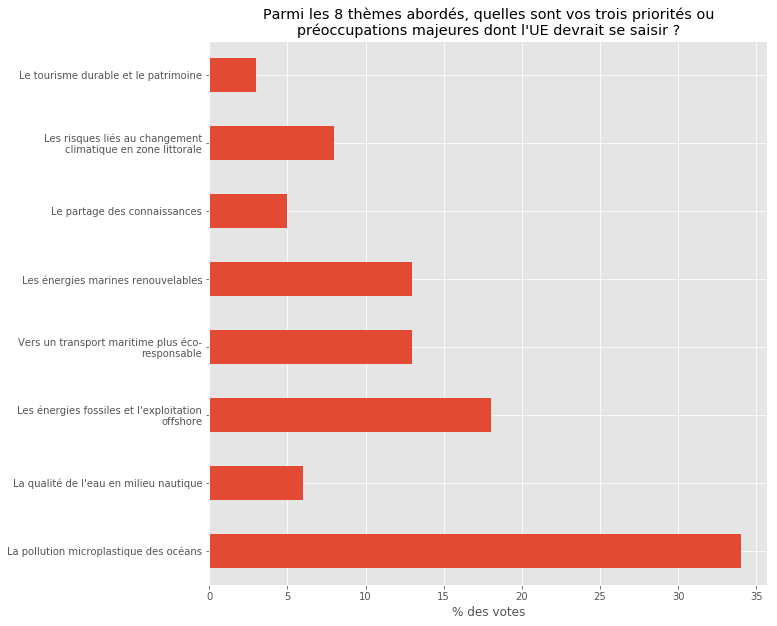

In [181]:
plot_moyenne_pct(q)

## Question 1

In [182]:
q = 1
moyenne_ponderee_pct(q)

% des votes
Installer des systèmes dans les stations\nd’épuration pour filtrer\nles microplastiques avant la sortie de\nla station             28
Créer un label européen permettant de\nsavoir en un coup d’œil si le produit\ncontient des microplastiques                         22
Interdire les\ncomposés microplastiques ajoutés\nintentionnellement aux produits de\nsoins, détergents et aux peintures.           35
Allouer des fonds à la recherche\nscientifique pour mesurer l’impact\ndes microplastiques sur  la santé\nhumaine                   15

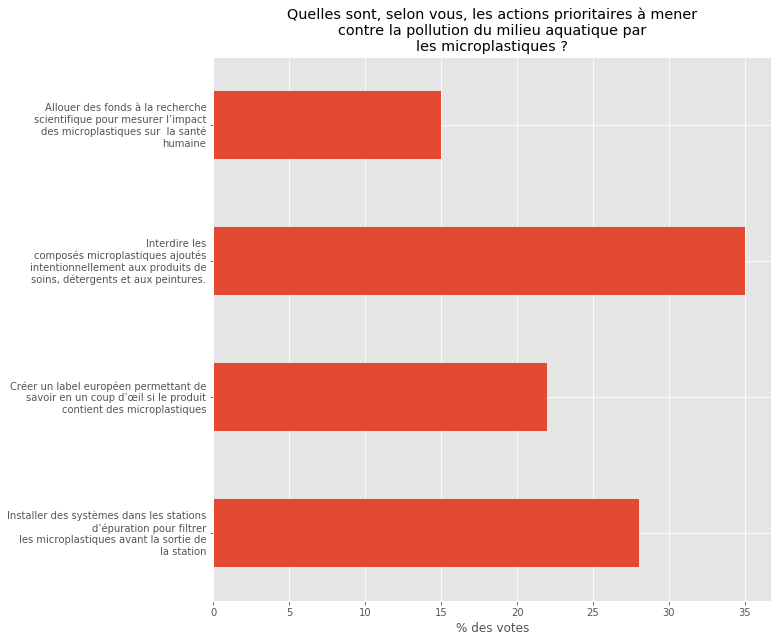

In [183]:
plot_moyenne_pct(q)

## Question 2

In [184]:
q = 2
moyenne_ponderee_pct(q)

% des votes
Encourager les innovations de\nl’industrie pour développer des textiles\nqui ne relâchent pas de fibres et des\npneus qui ne subissent pas l’abrasion                                         34
Imposer des contrôles aux entreprises\nproduisant, transformant et transportant\ndes granulés plastiques industriels\n(microbilles de plastique utilisées\ncomme matière première)            32
Allouer des fonds à la recherche\nscientifique pour mesurer l’impact\ndes microplastiques sur la santé humaine                                                                                18
Allouer des fonds à la recherche pour\nmesurer la quantité\nde microplastiques dans l’air, l’eau\npotable et les autres substances\nsusceptibles d’être ingérées par l’être\nhumain           16

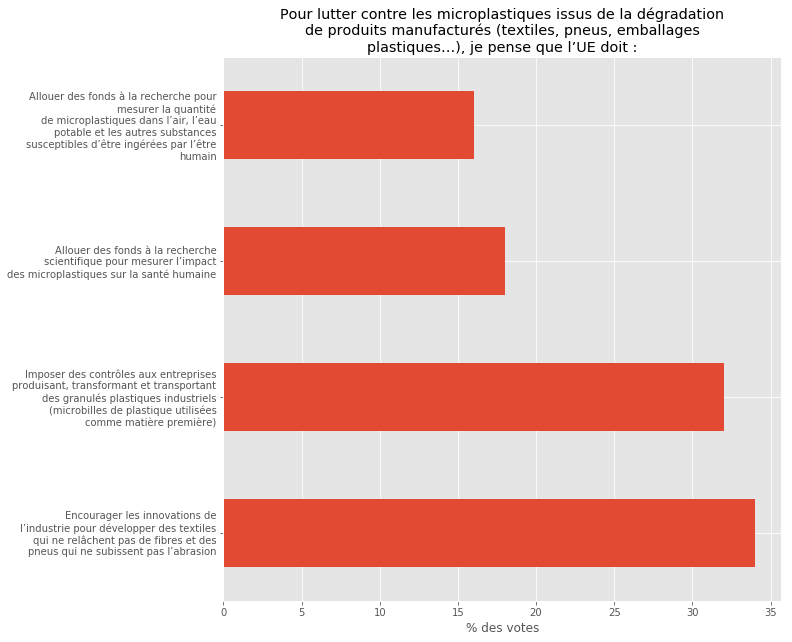

In [185]:
plot_moyenne_pct(q)

## Question 3

In [186]:
q = 3
moyenne_ponderee_pct(q)

% des votes
Rendre l’information sur la qualité de\nl’eau plus accessible                                                               23
Elargir les zones de surveillance de la\nqualité de l'eau (zones d'activité\nnautiques, spots de surf)                      20
Etendre la période de surveillance de la\nqualité de l’eau à l'année                                                        19
Sensibiliser les citoyens européens aux\ndangers des polluants chimiques et\nbactériologiques pour la santé                 20
Prendre en compte de nouveaux paramètres\npour évaluer la qualité de l’eau\n(algues, perturbateurs endocriniens…)           18

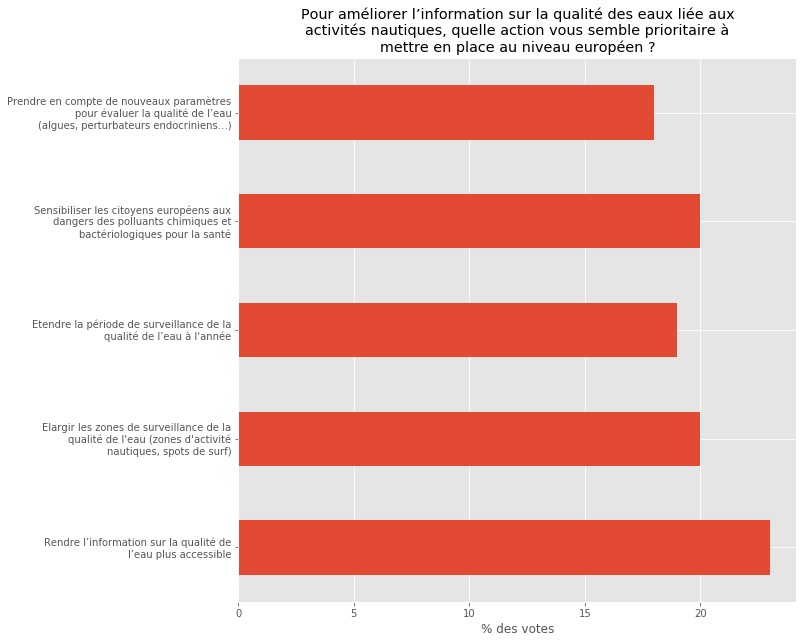

In [187]:
plot_moyenne_pct(q)

## Question 4

In [188]:
q = 4
moyenne_ponderee_pct(q)

% des votes
Sortir de l’énergie fossile et interdire\ntoute exploration ou exploitation\npétrolière ou gazière           50
Interdire l’exploration et\nl’exploitation pétrolière dans les aires\nmarines protégées                      27
Elargir la responsabilité des compagnies\ndans les crimes écologiques                                        18
Renforcer la régulation et le contrôle\nsur les plateformes offshores                                         5

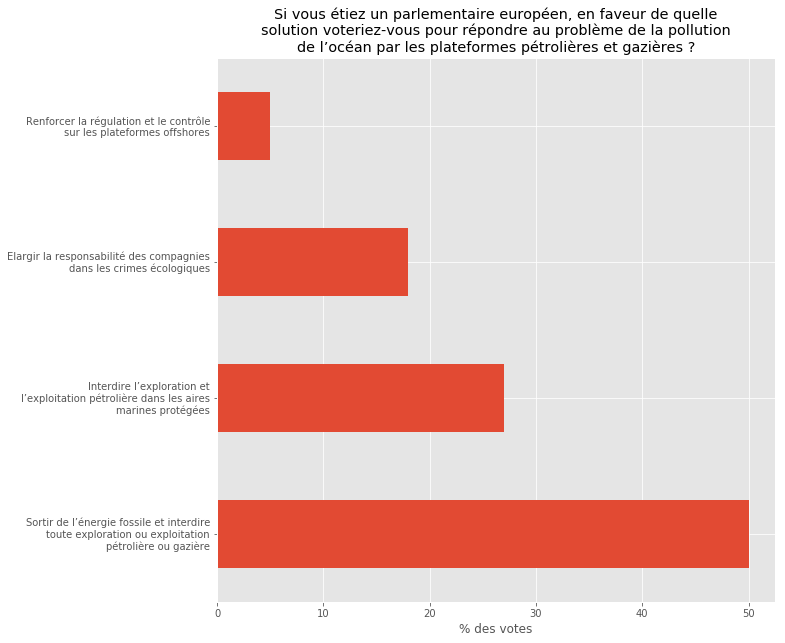

In [189]:
plot_moyenne_pct(q)

## Question 5

In [190]:
q = 5
moyenne_ponderee_pct(q)

% des votes
Transférer les investissements des\nénergies fossiles vers les énergies\nrenouvelables                                               72
Suspendre toutes les aides financières\neuropéennes (subventions,\ninvestissements etc.) au secteur des\nénergies fossiles           18
Instaurer une taxe sur les produits\nmanufacturés à base de pétrole                                                                   6
Stopper l’importation des énergies\nfossiles en UE                                                                                    4

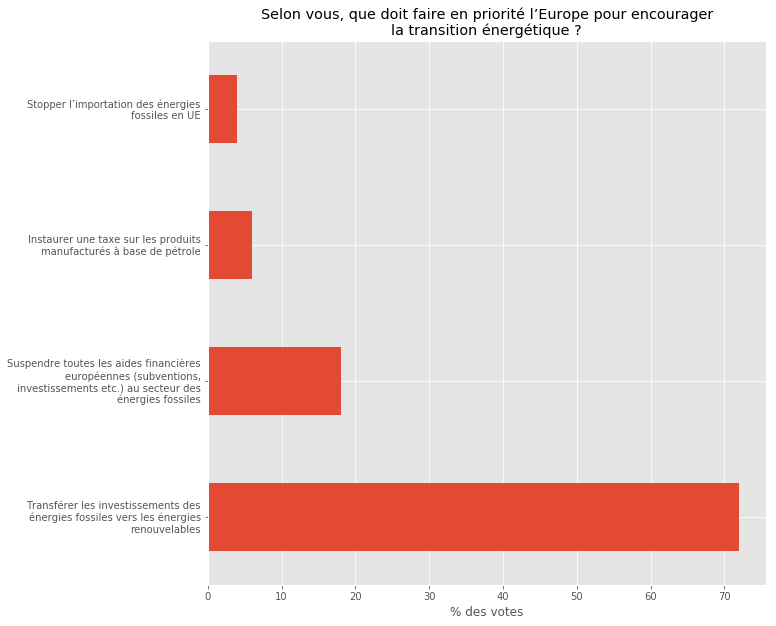

In [191]:
plot_moyenne_pct(q)

## Question 6

In [192]:
q = 6
moyenne_ponderee_pct(q)

% des votes
Promouvoir l’innovation et l’éco\nconception des navires (peintures,\nefficacité énergétique, matériaux…)           34
Intégrer dans la loi les bonnes\npratiques pour éviter les pertes de\nconteneurs                                    22
Assurer un démantèlement éthique des\nnavires                                                                       20
Renforcer la surveillance des pollutions\nmarines et des nuisances sonores                                          24

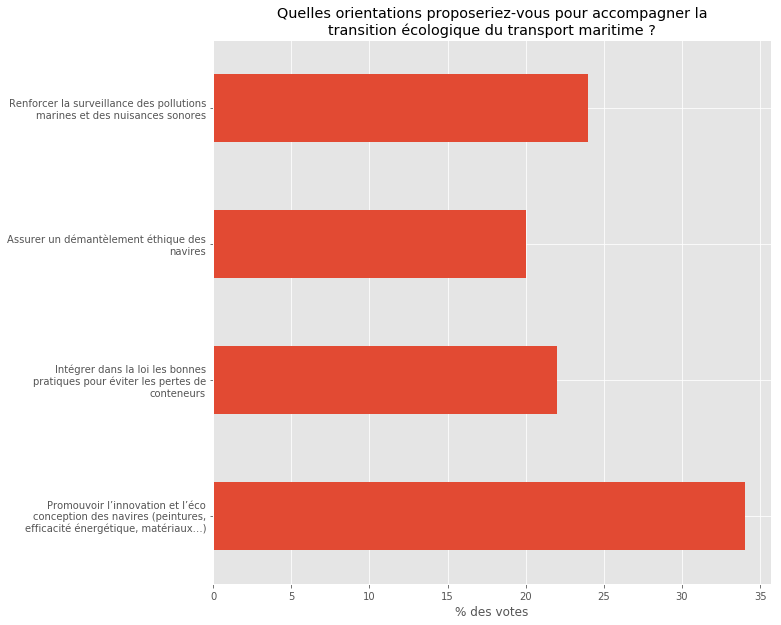

In [193]:
plot_moyenne_pct(q)

## Question 7

In [194]:
q = 7
moyenne_ponderee_pct(q)

% des votes
oui           98
non            2

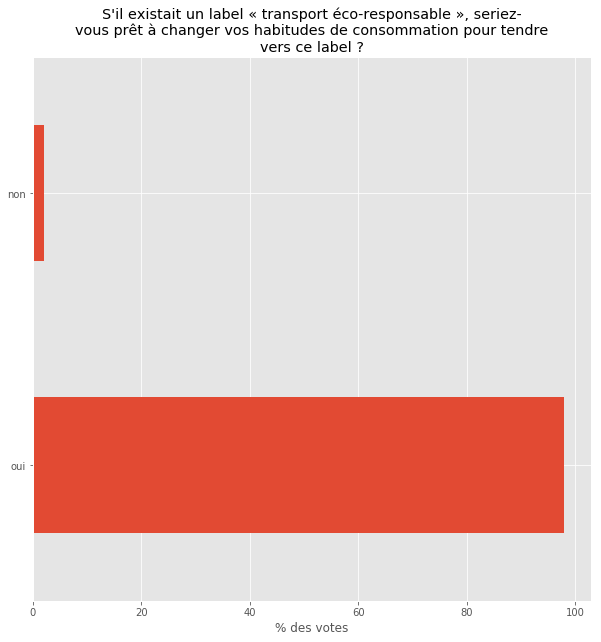

In [195]:
plot_moyenne_pct(q)

## Question 8

In [196]:
q = 8
moyenne_ponderee_pct(q)

% des votes
Etre priorisé car il encourage la\ntransition énergétique                                   58
Etre freiné car il produit des nuisances\nvisuelles et sonores impactant la faune           15
Etre freiné car l’océan ne doit pas\ndevenir un nouvel eldorado                             14
Etre priorisé car c’est une filière\nd’innovation et génératrice d’emplois                  13

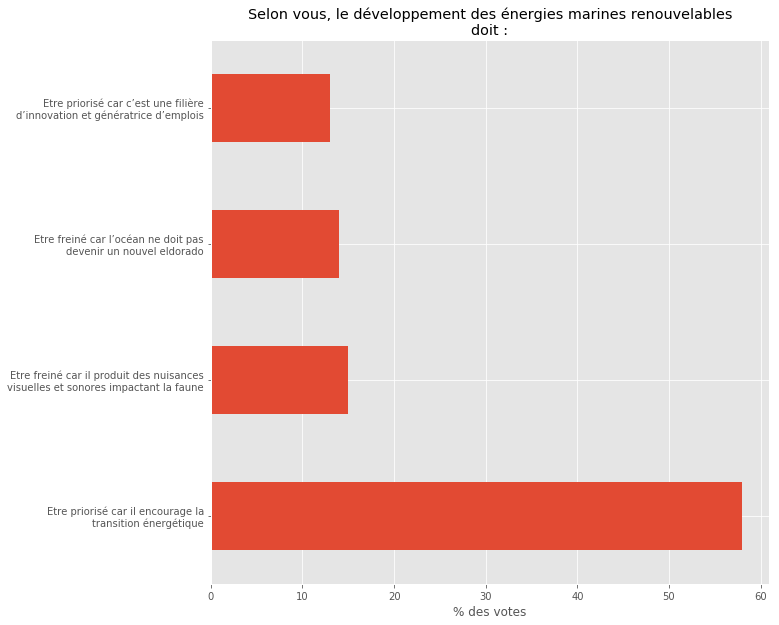

In [197]:
plot_moyenne_pct(q)

## Question 9

In [198]:
q = 9
moyenne_ponderee_pct(q)

% des votes
Adopter un comportement de consommation\nénergétique plus raisonné à l'échelle\nindividuelle           34
Développer la recherche et le\ndéveloppement pour booster la filière                                   33
Accroitre la connaissance des énergies\nmarines renouvelables auprès de tout le\nmonde                 19
Encourager la concertation et le\ndialogue territorial sur le sujet                                    14

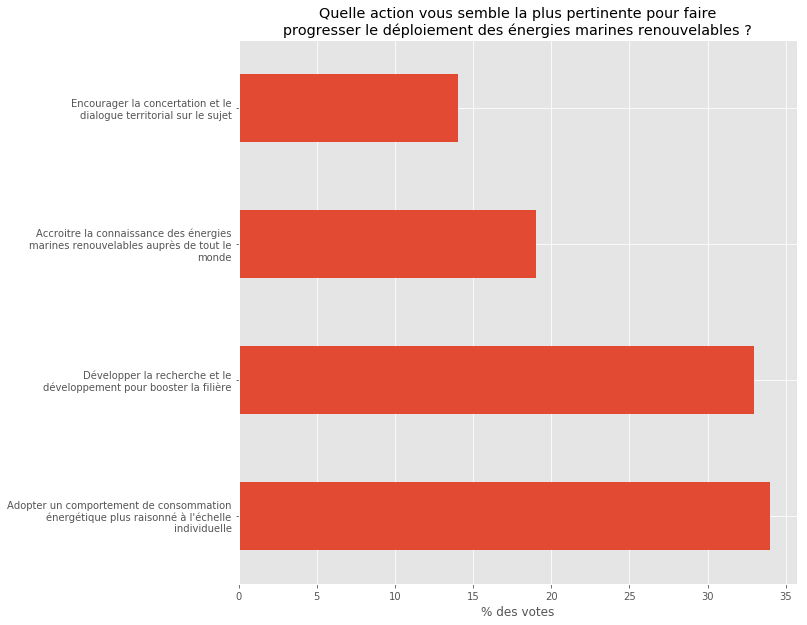

In [199]:
plot_moyenne_pct(q)

## Question 10

In [200]:
q = 10
moyenne_ponderee_pct(q)

% des votes
Vidéo                                                           56
Contenus pédagogique / Cours en ligne /\nInfographies           19
Articles de presse / Blog                                       11
Conférence débat                                                 8
Exposition / Art                                                 6

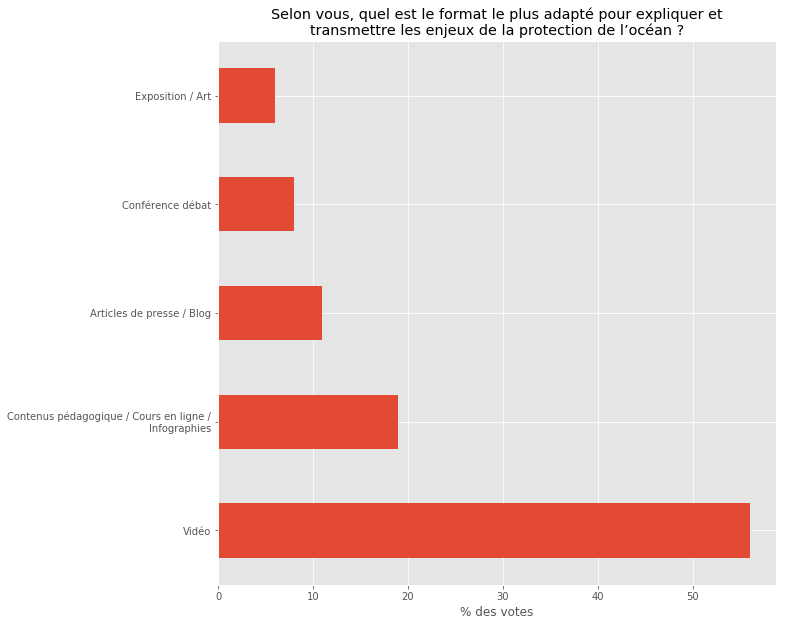

In [201]:
plot_moyenne_pct(q)

## Question 11

In [202]:
q = 11
moyenne_ponderee_pct(q)

% des votes
Réseaux sociaux / Site internet           57
TV                                        14
Événements                                12
Emailing / Newsletter                     12
Presse papier / Magasines                  5

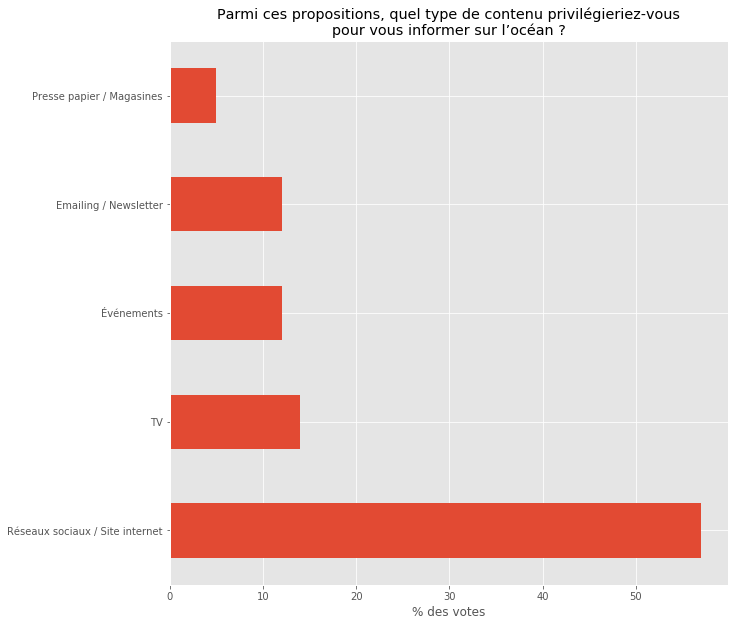

In [203]:
plot_moyenne_pct(q)

## Question 12

In [204]:
q = 12
moyenne_ponderee_pct(q)

% des votes
Plutôt bien informé           52
Plutôt mal informé            36
Très bien informé              9
Très mal informé               3

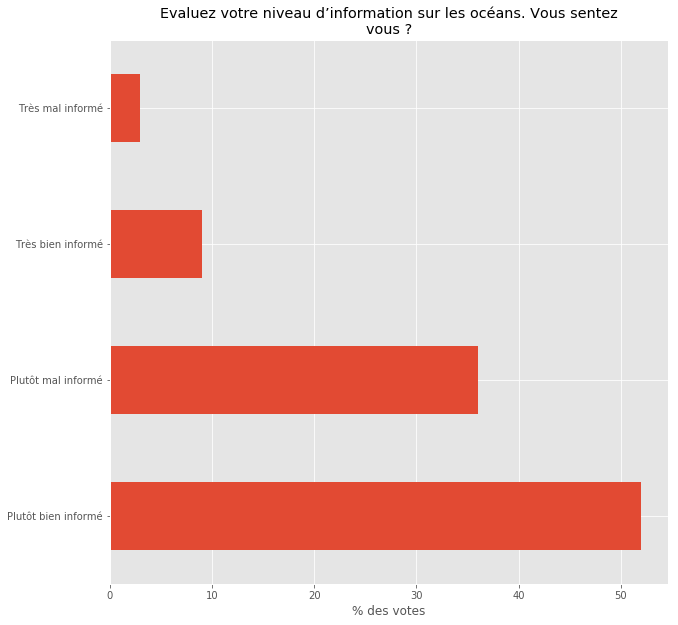

In [205]:
plot_moyenne_pct(q)

## Question 13

In [206]:
q = 13
moyenne_ponderee_pct(q)

% des votes
Montée des eaux                                                                              20
Phénomènes météo extrêmes                                                                    21
Comportements à adopter en cas de risque\n(submersion, inondations, écroulements…)           13
Conséquences sur la biodiversité                                                             26
Conséquences sur les activités\néconomiques (tourisme, pêche,\nimmobilier…)                  14
Informations relatives aux modalités de\nparticipation aux concertations                      6

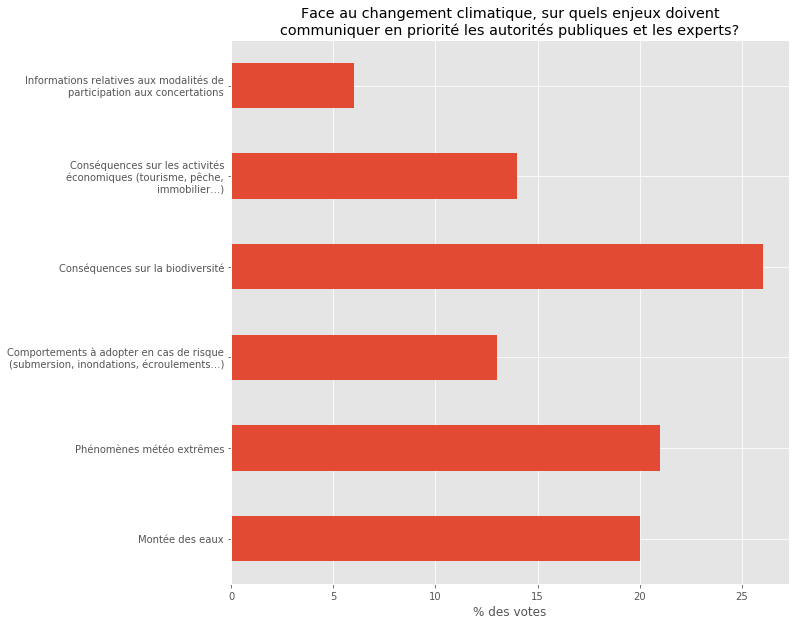

In [207]:
plot_moyenne_pct(q)

## Question 14

In [208]:
q = 14
moyenne_ponderee_pct(q)

% des votes
Par la création d’un label européen du\ntourisme durable (englobant un nombre\nlarge de secteurs et d’activités) en\nlittoral                                                      32
En conciliant les activités nautiques\nsportives et la conservation des\nécosystèmes dans les zones de protection\nNatura2000 en mer                                               30
En facilitant la conciliation des usages\net pratiques nautiques avec les autres\nusages d’exploitation économiques et\nscientifiques des espaces et ressources\nmarines           23
En créant et en promouvant une « route\ndu surf » dans le cadre du patrimoine\nculturel européen.                                                                                  15

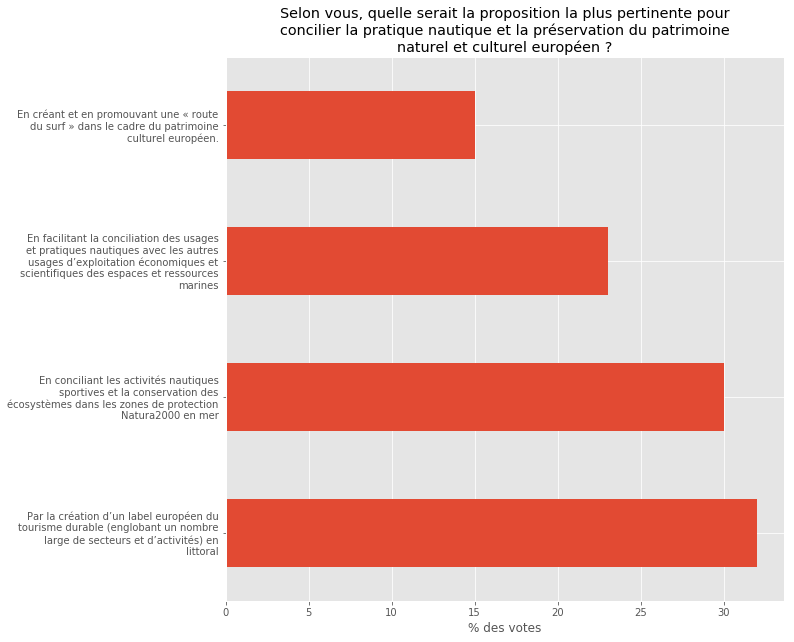

In [209]:
plot_moyenne_pct(q)

# Par profil

In [210]:
scope = "profil"

In [211]:
pd.DataFrame(reponses.groupby(scope).count()["cnt"])

cnt
profil                
citoyen(ne)       4234
expert(e)          303
professeur(e)      295
sportif nautique  2023

## Question 0

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


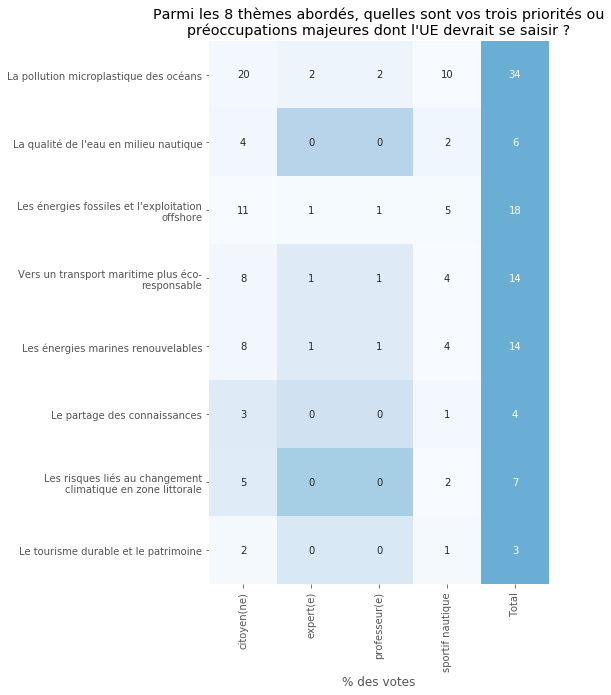

In [212]:
q = 0
plot_khi_2(q, scope)

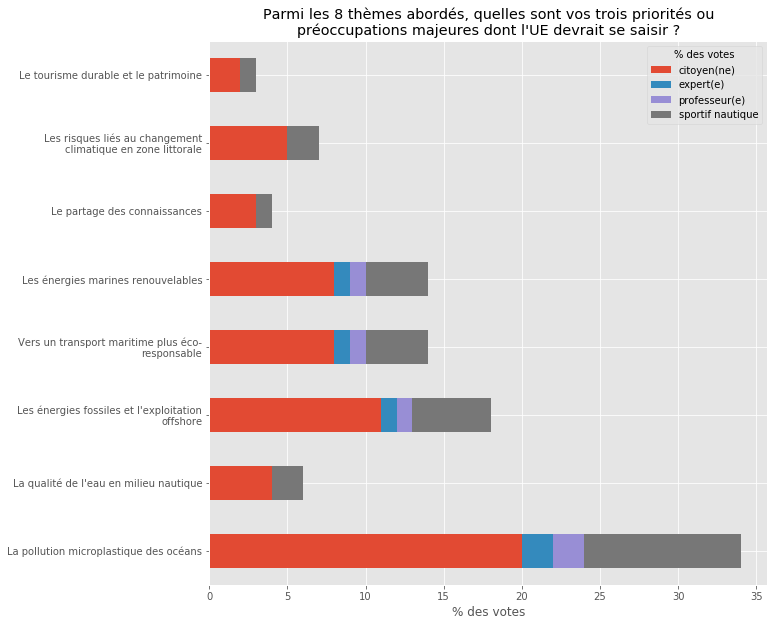

In [213]:
plot_moyenne_pct(q, scope)

## Question 1

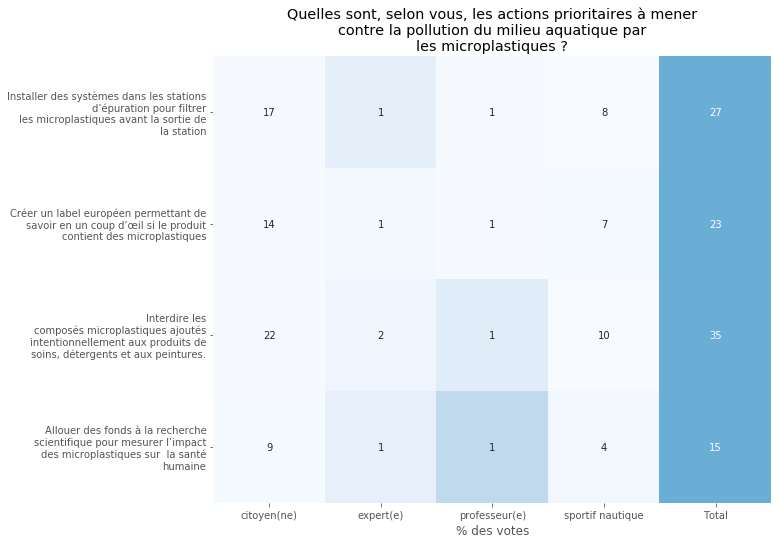

In [214]:
q = 1
plot_khi_2(q, scope)

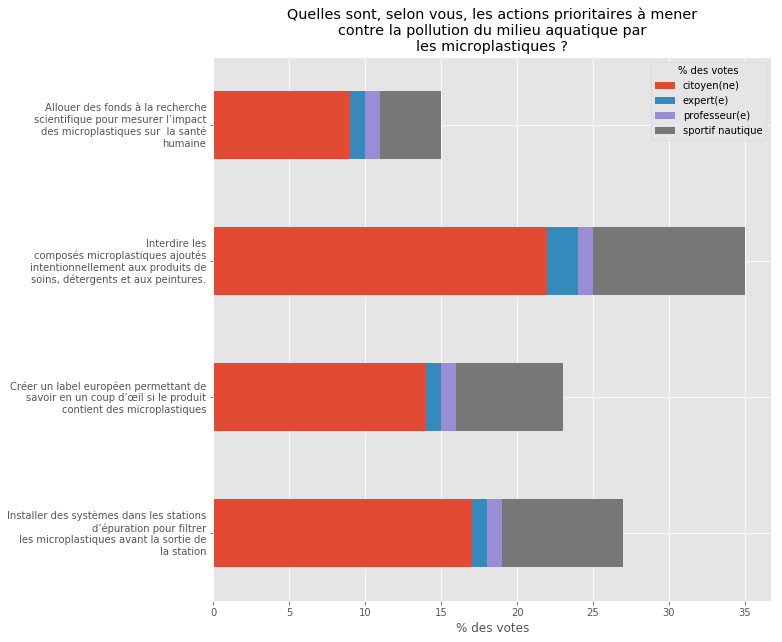

In [215]:
plot_moyenne_pct(q, scope)

## Question 2

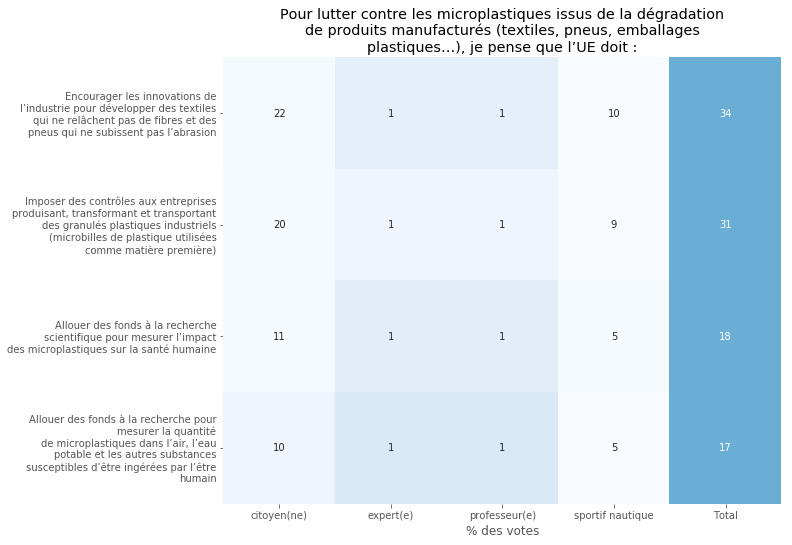

In [216]:
q = 2
plot_khi_2(q, scope)

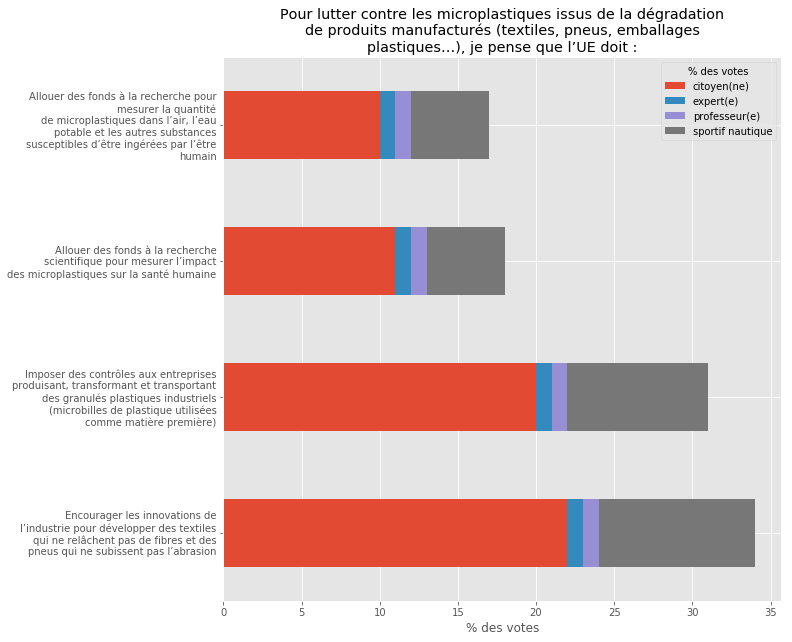

In [217]:
plot_moyenne_pct(q, scope)

## Question 3

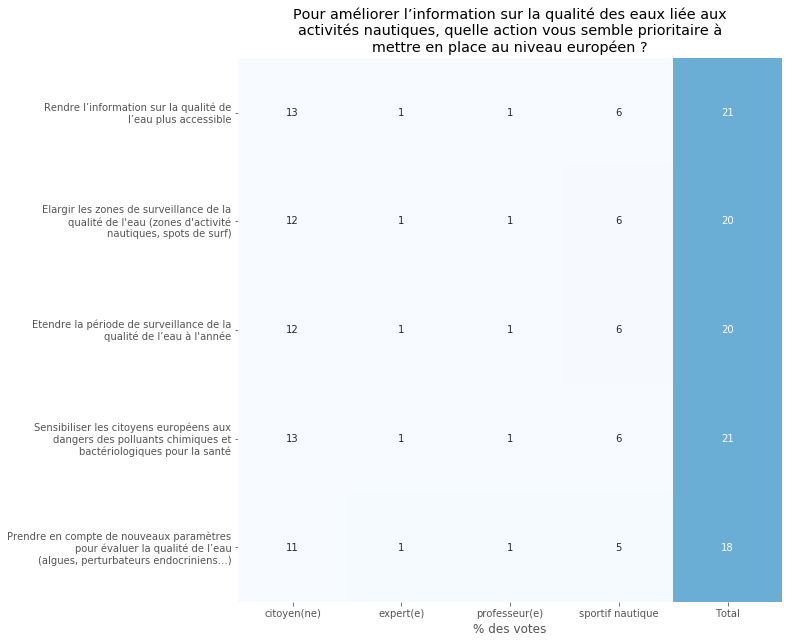

In [218]:
q = 3
plot_khi_2(q, scope)

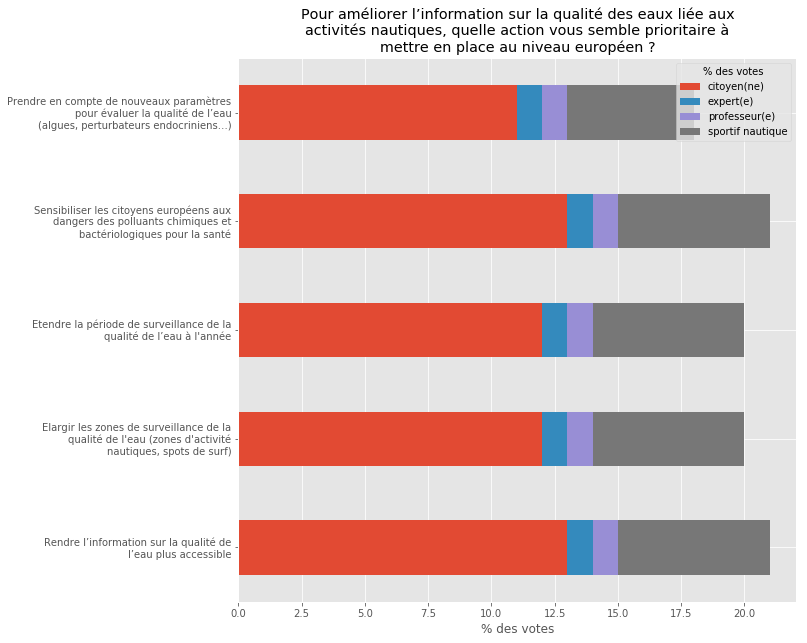

In [219]:
plot_moyenne_pct(q, scope)

## Question 4

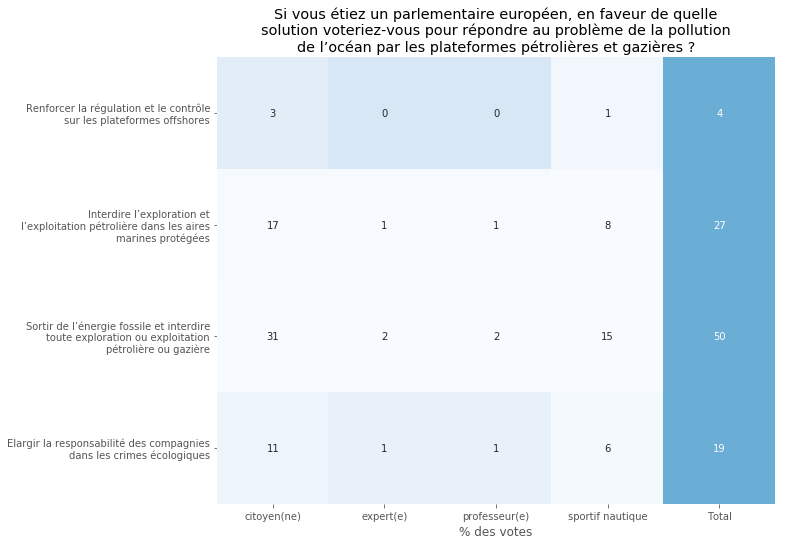

In [220]:
q = 4
plot_khi_2(q, scope)

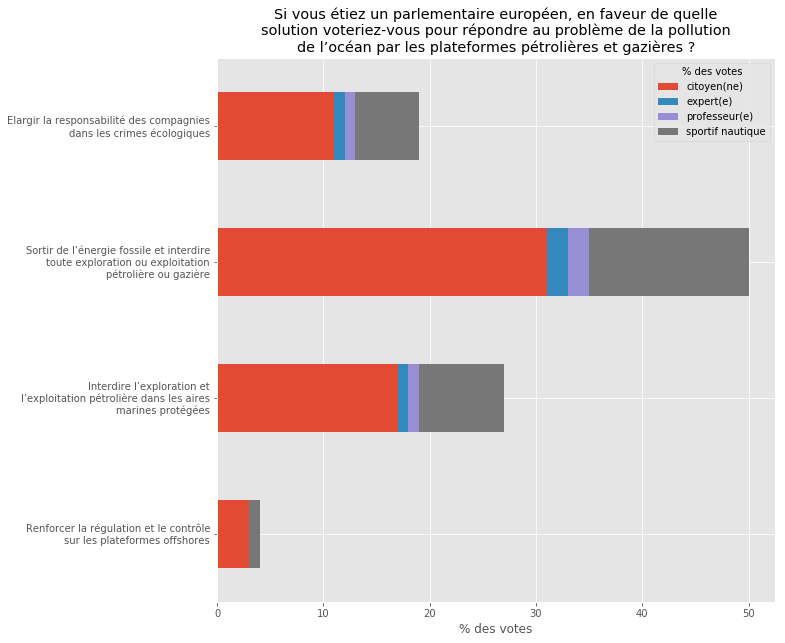

In [221]:
plot_moyenne_pct(q, scope)

## Question 5

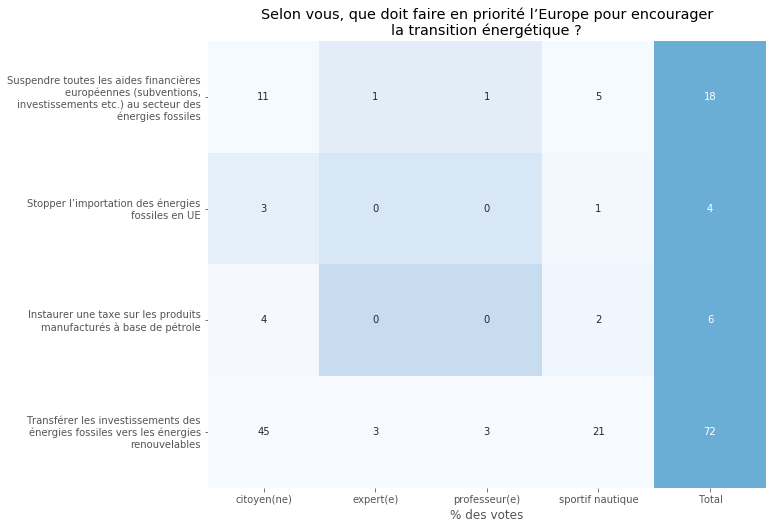

In [222]:
q = 5
plot_khi_2(q, scope)

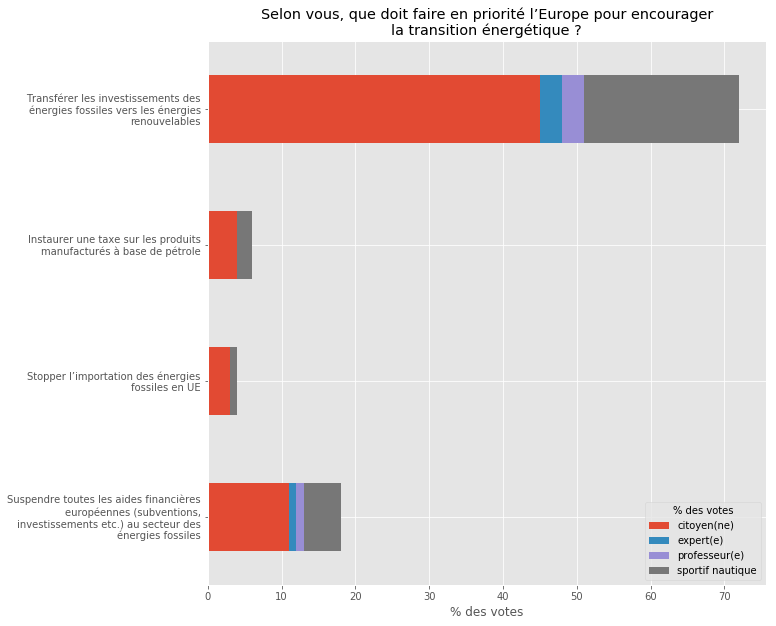

In [223]:
plot_moyenne_pct(q, scope)

## Question 6

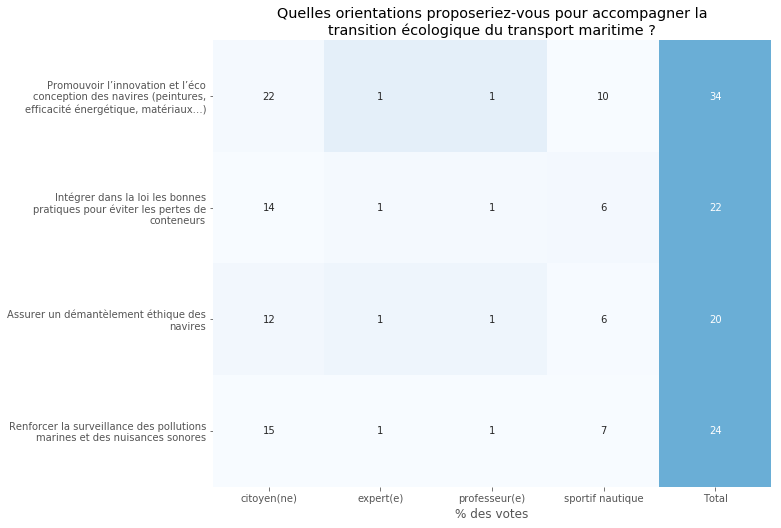

In [224]:
q = 6
plot_khi_2(q, scope)

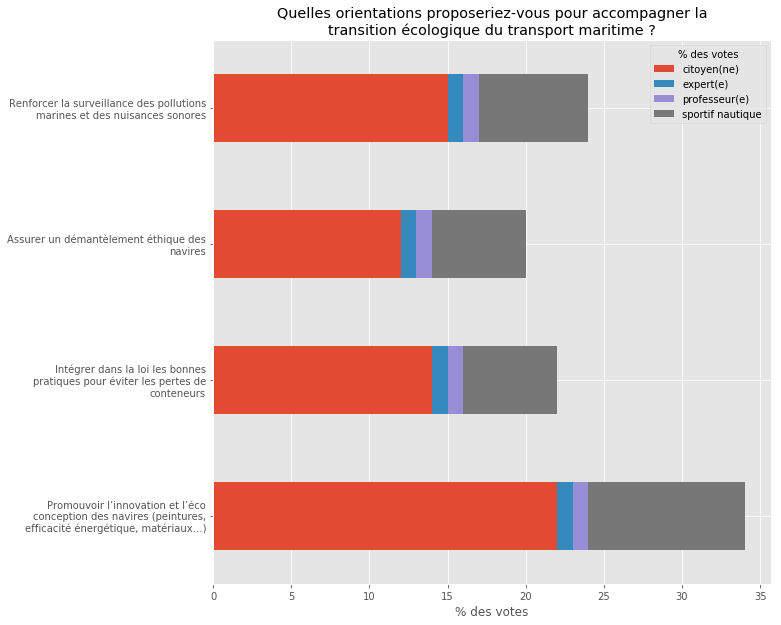

In [225]:
plot_moyenne_pct(q, scope)

## Question 7

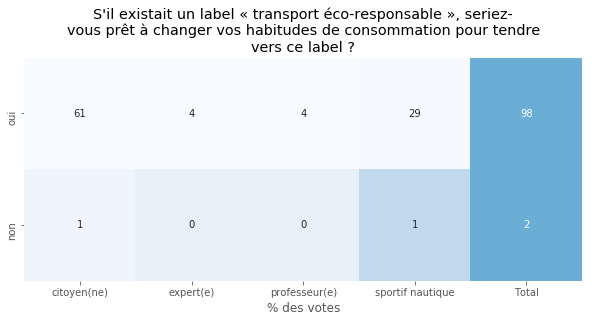

In [226]:
q = 7
plot_khi_2(q, scope)

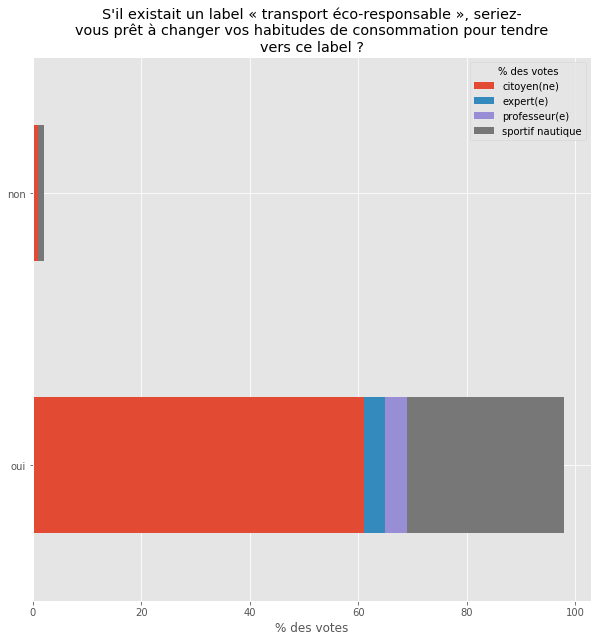

In [227]:
plot_moyenne_pct(q, scope)

## Question 8

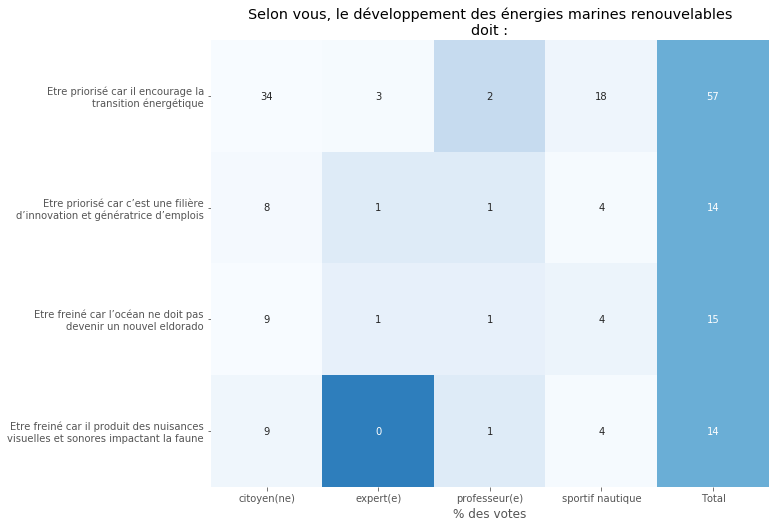

In [228]:
q = 8
plot_khi_2(q, scope)

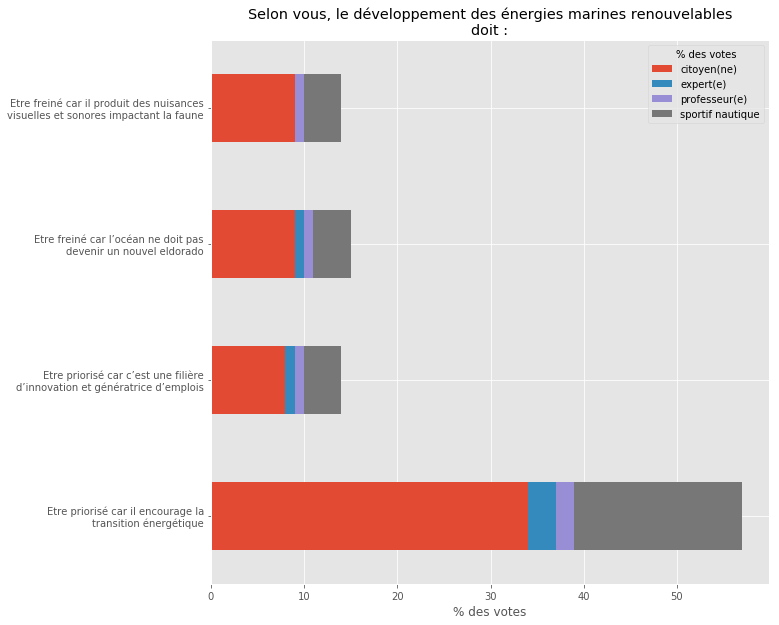

In [229]:
plot_moyenne_pct(q, scope)

## Question 9

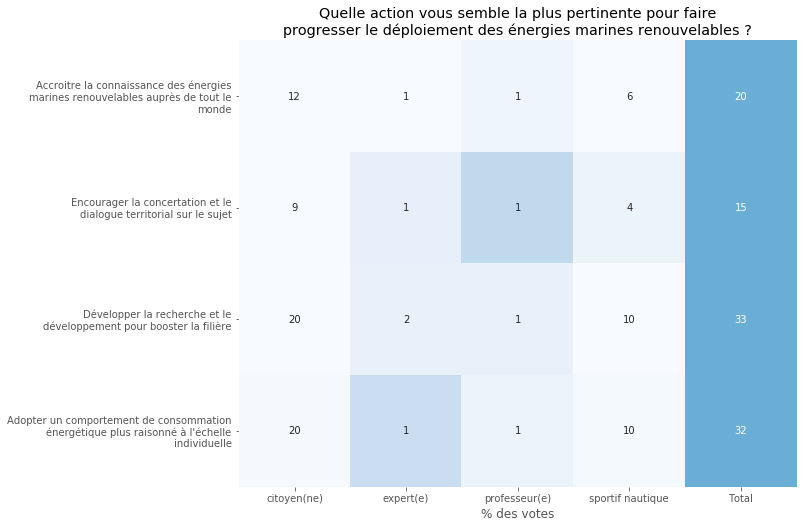

In [230]:
q = 9
plot_khi_2(q, scope)

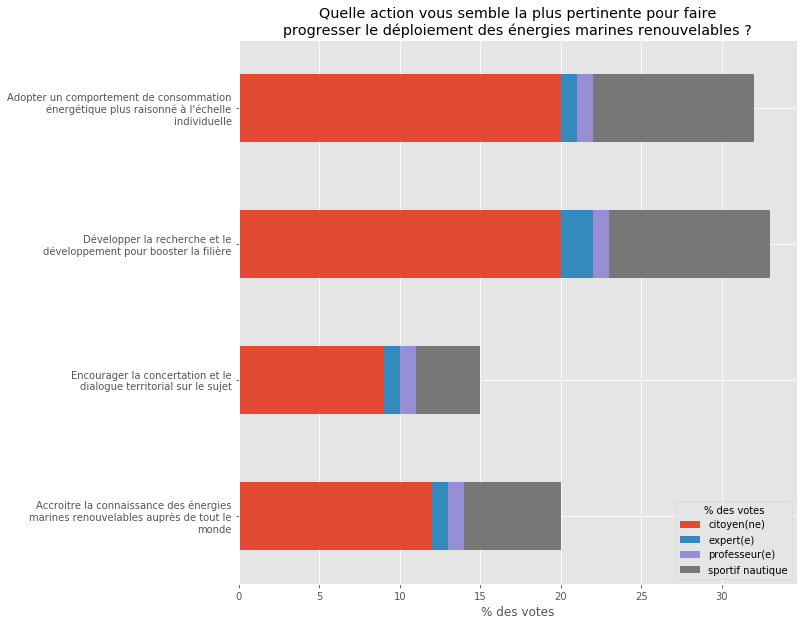

In [231]:
plot_moyenne_pct(q, scope)

## Question 10

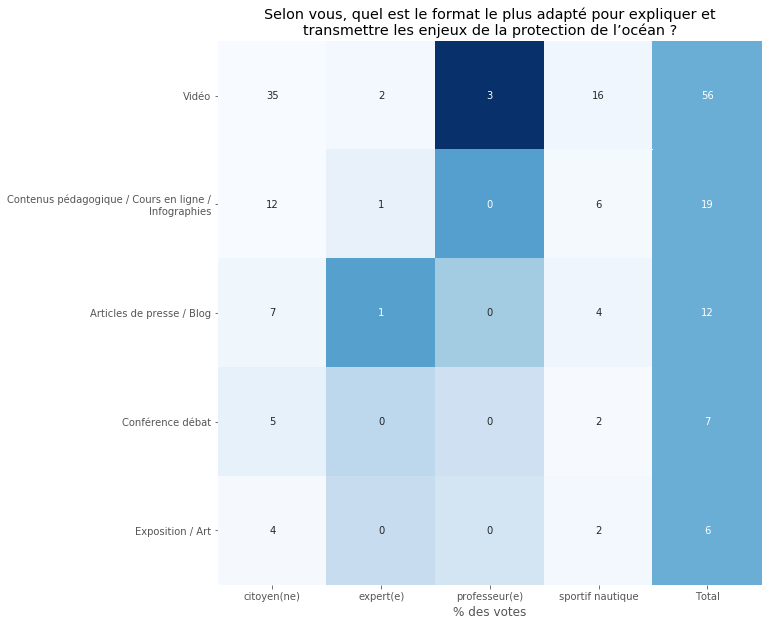

In [232]:
q = 10
plot_khi_2(q, scope)

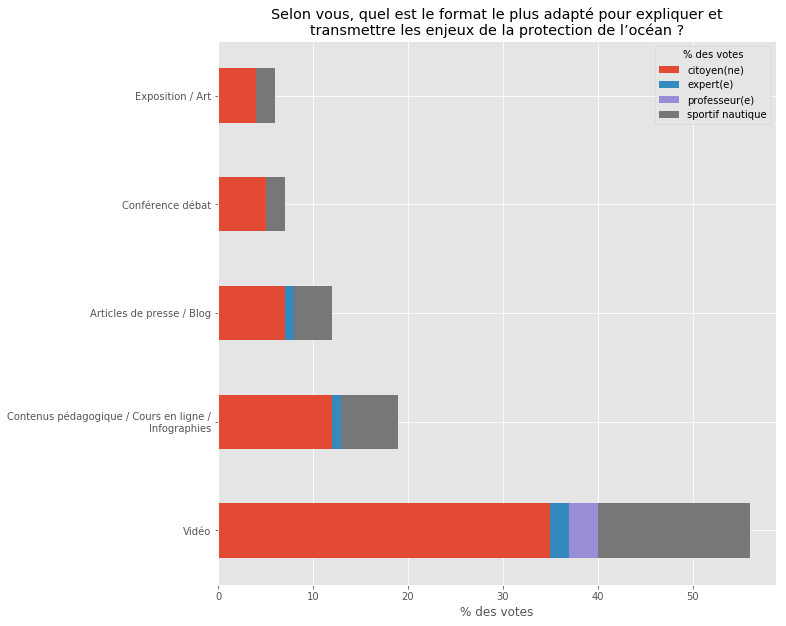

In [233]:
plot_moyenne_pct(q, scope)

## Question 11

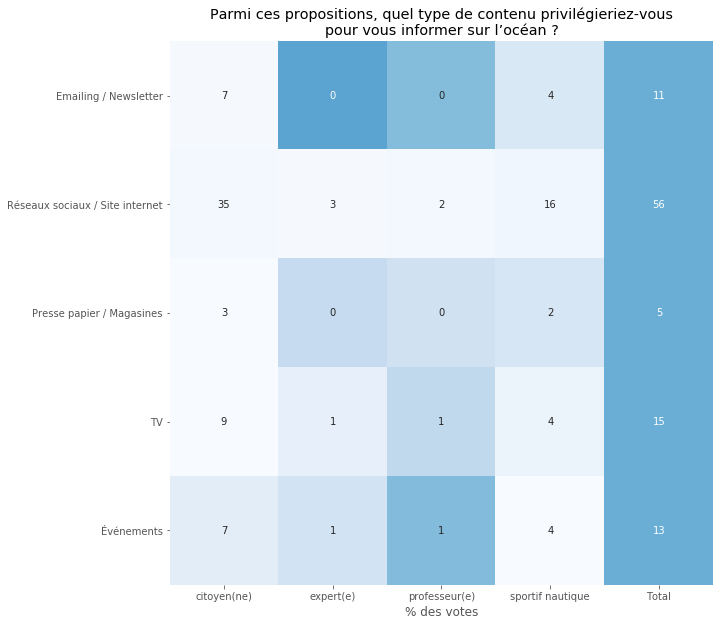

In [234]:
q = 11
plot_khi_2(q, scope)

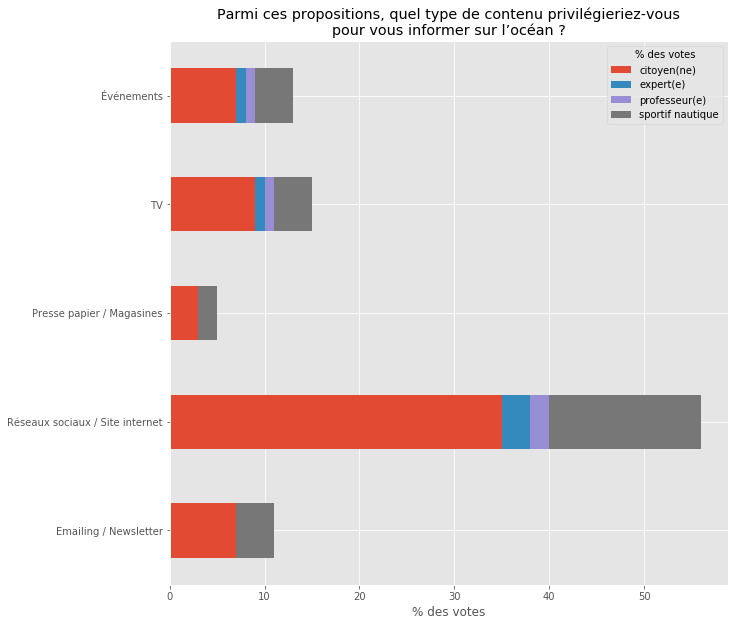

In [235]:
plot_moyenne_pct(q, scope)

## Question 12

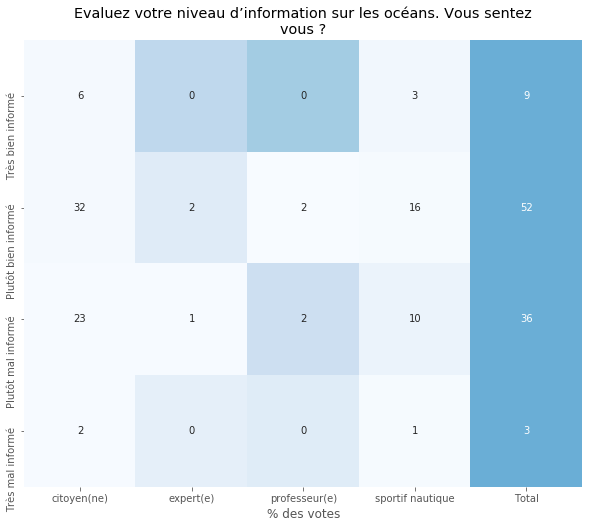

In [236]:
q = 12
plot_khi_2(q, scope)

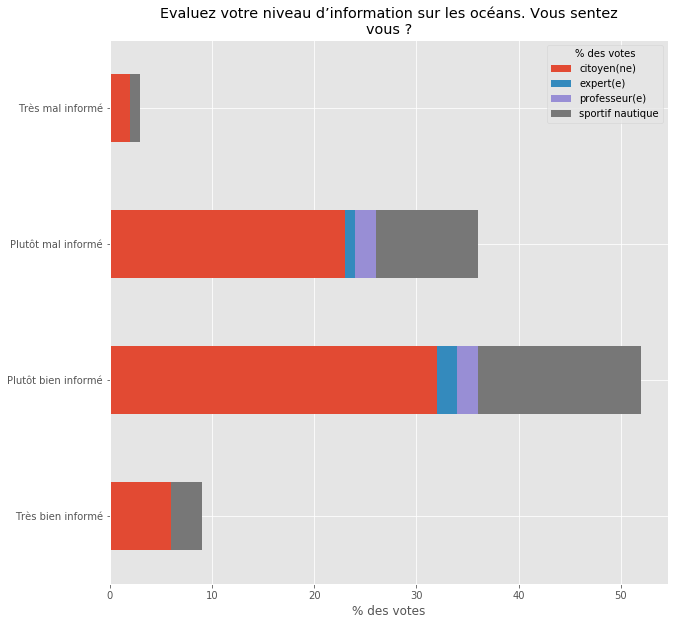

In [237]:
plot_moyenne_pct(q, scope)

## Question 13

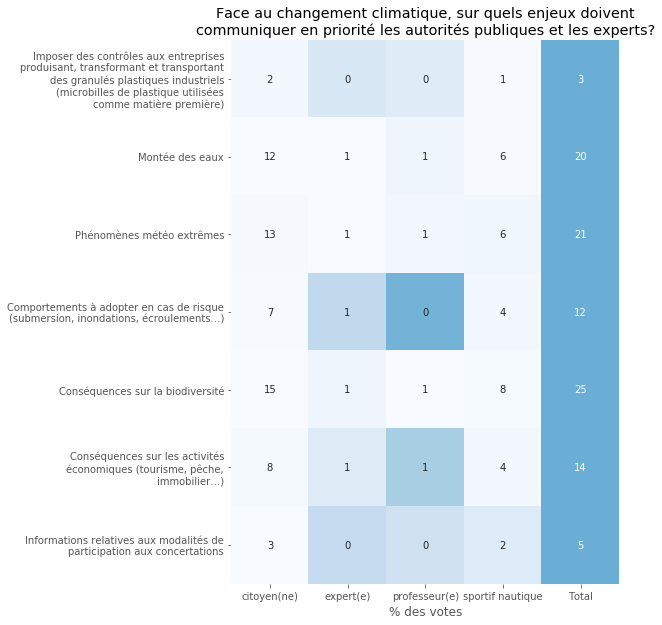

In [238]:
q = 13
plot_khi_2(q, scope)

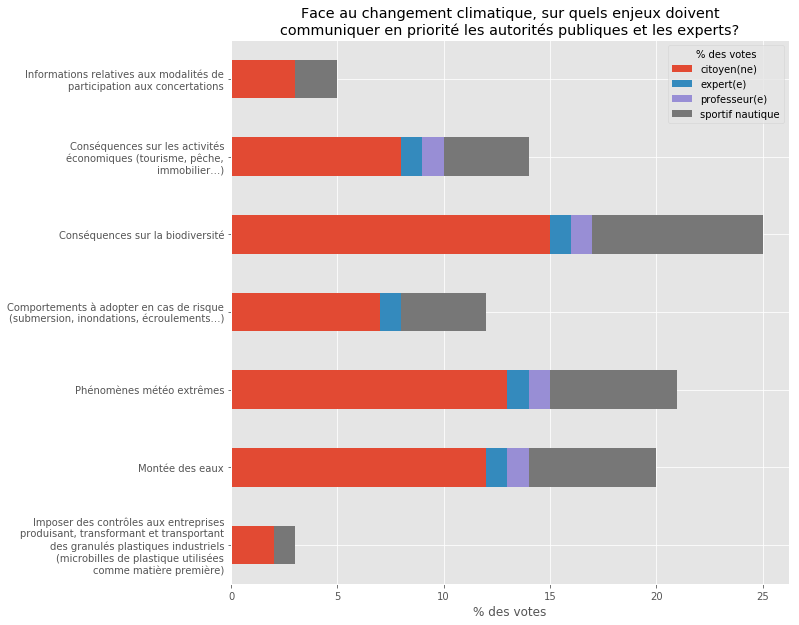

In [239]:
plot_moyenne_pct(q, scope)

## Question 14

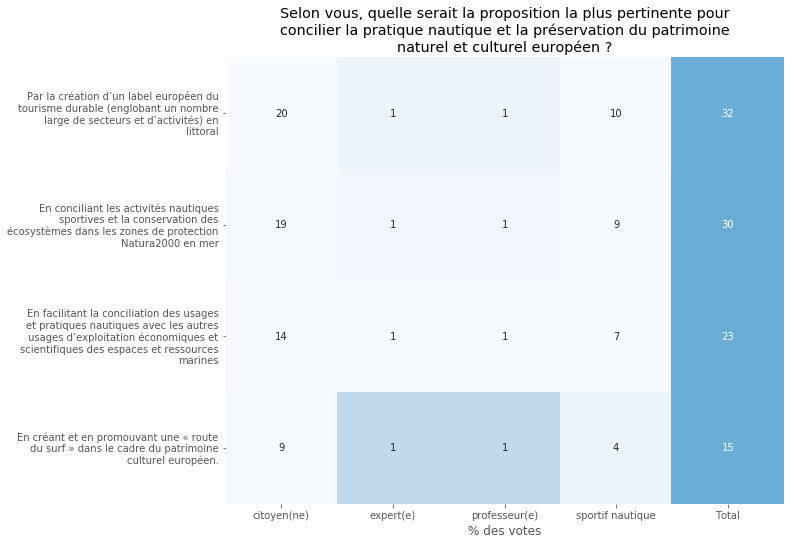

In [240]:
q = 14
plot_khi_2(q, scope)

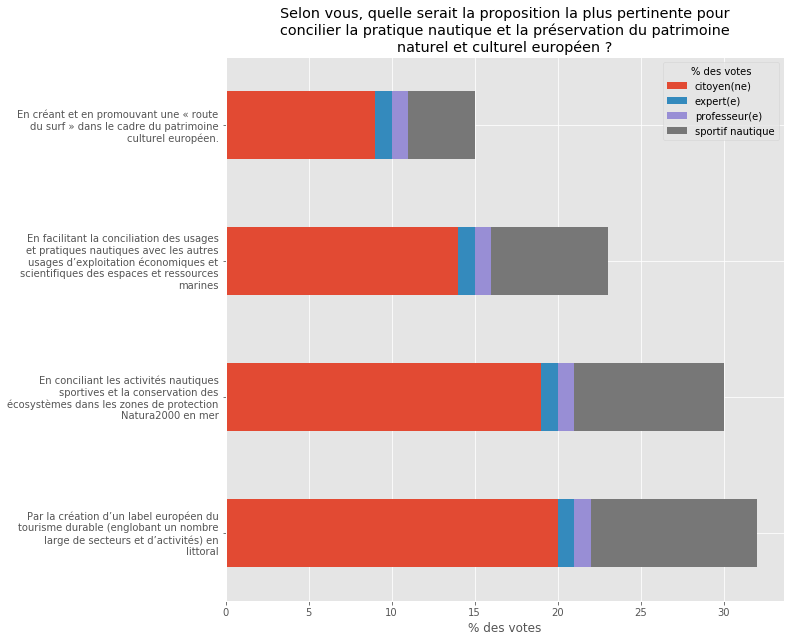

In [241]:
plot_moyenne_pct(q, scope)

# Par tranche d'âge

In [242]:
scope = "age"

In [243]:
pd.DataFrame(reponses.groupby(scope).count()["cnt"])

cnt
age         
0_17      61
18_24   1078
25_34   2076
35_45   1533
45_59   1461
59_100   633

## Question 0

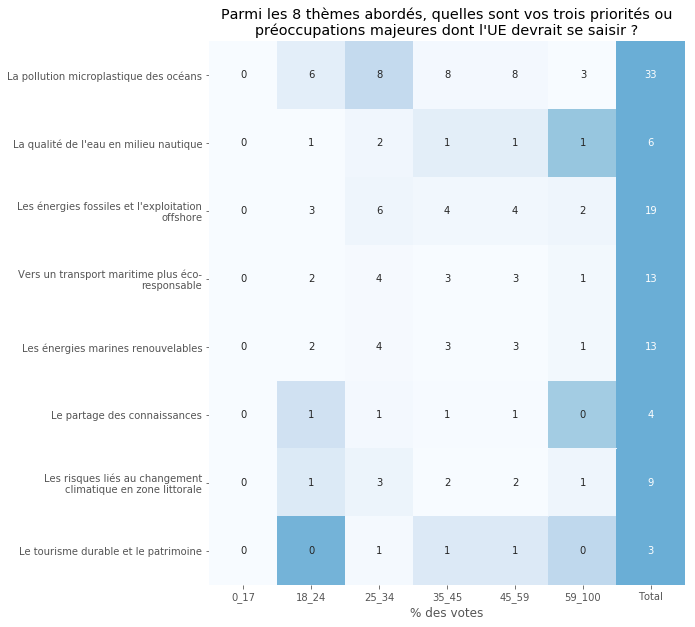

In [244]:
q = 0
plot_khi_2(q, scope)

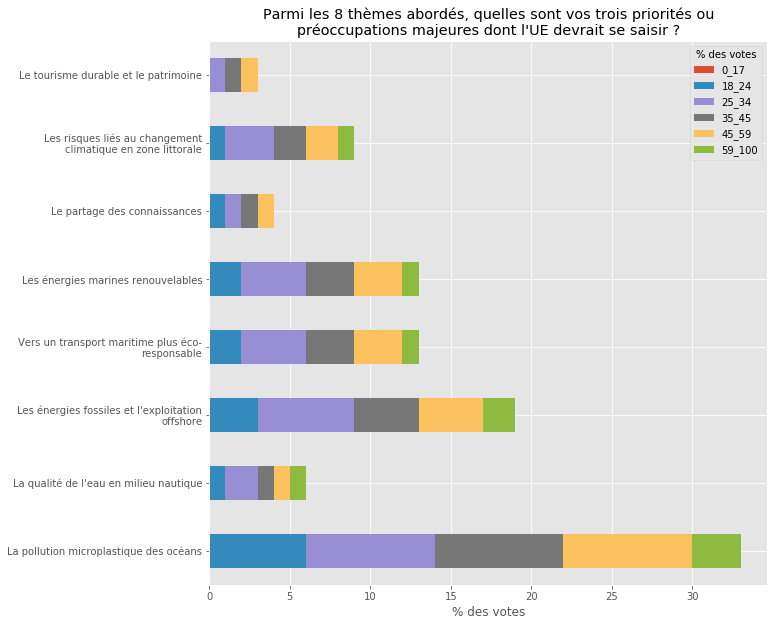

In [245]:
plot_moyenne_pct(q, scope)

## Question 1

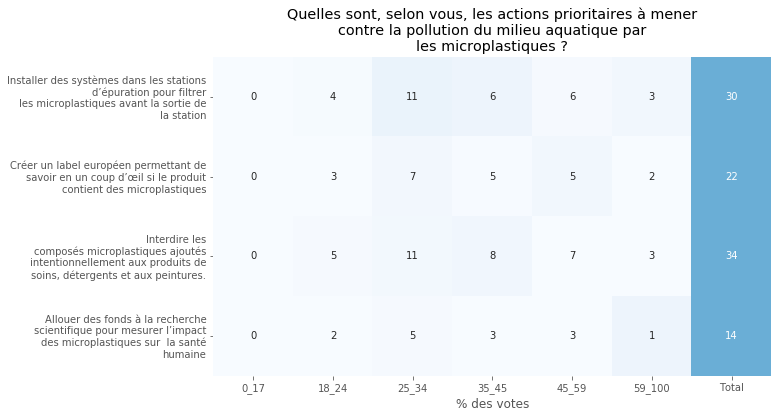

In [246]:
q = 1
plot_khi_2(q, scope)

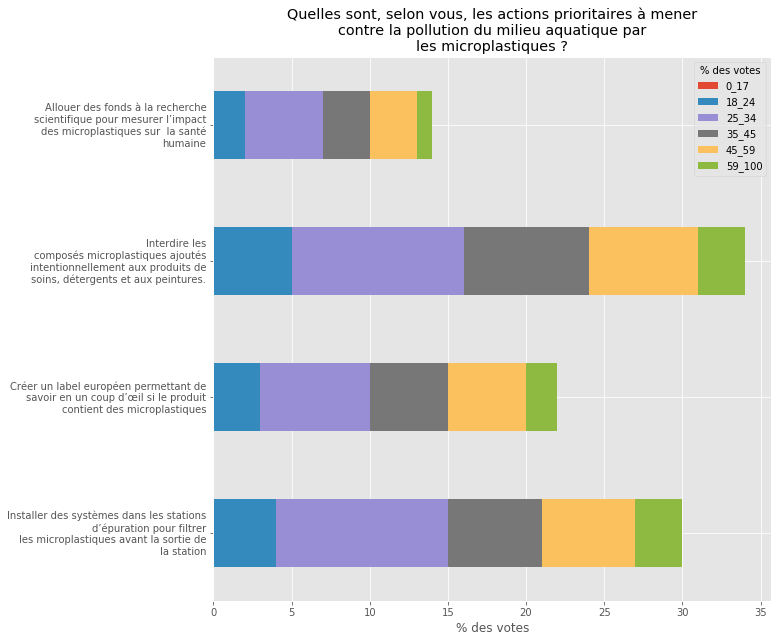

In [247]:
plot_moyenne_pct(q, scope)

## Question 2

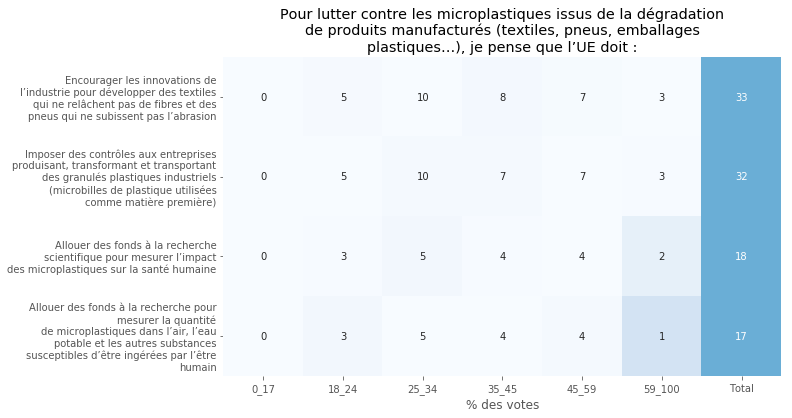

In [248]:
q = 2
plot_khi_2(q, scope)

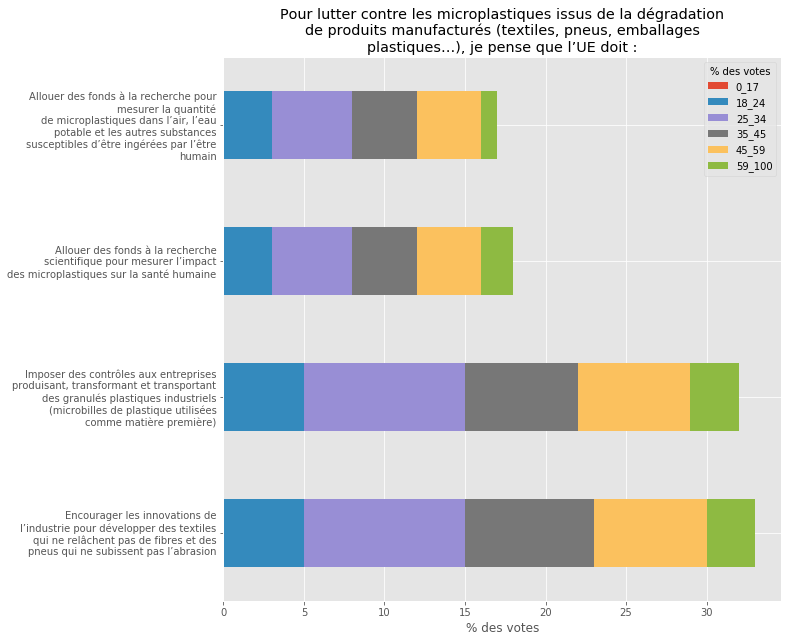

In [249]:
plot_moyenne_pct(q, scope)

## Question 3

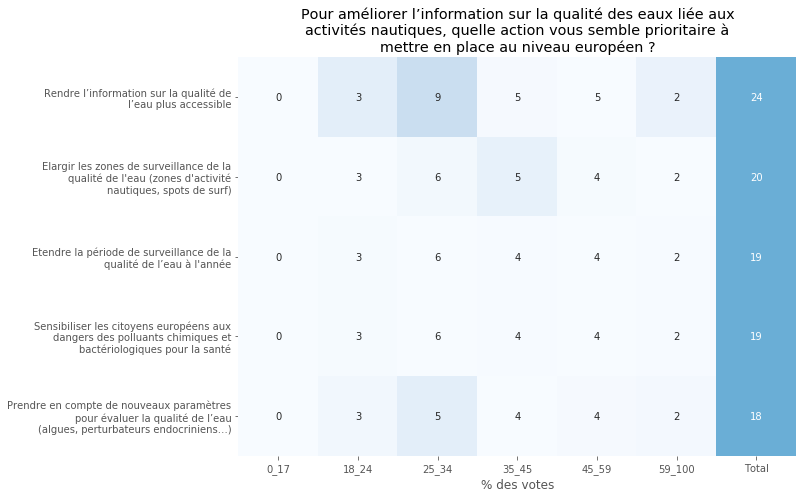

In [250]:
q = 3
plot_khi_2(q, scope)

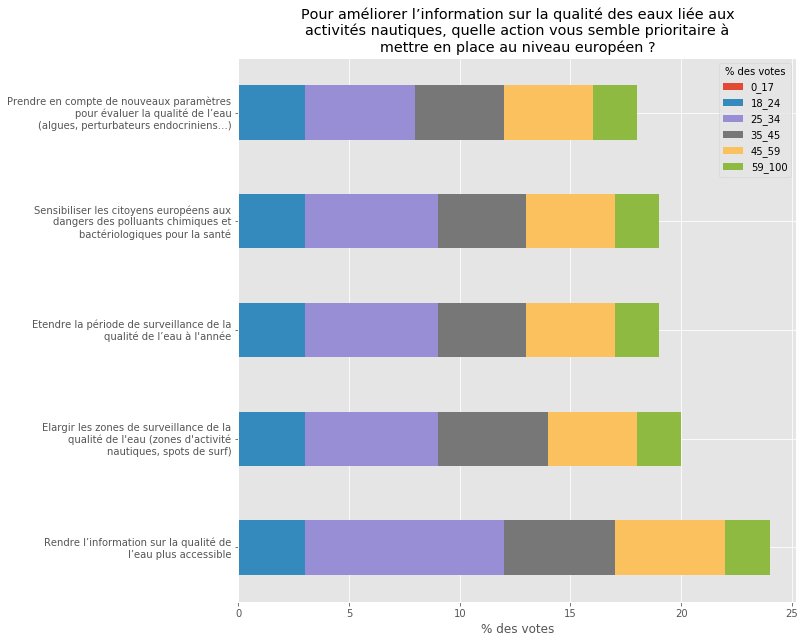

In [251]:
plot_moyenne_pct(q, scope)

## Question 4

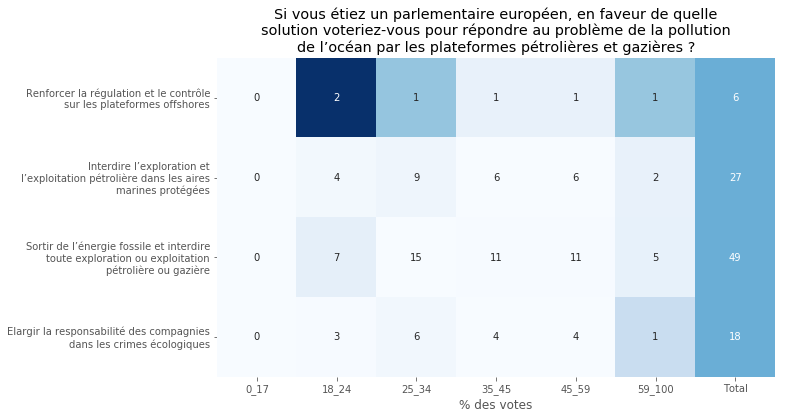

In [252]:
q = 4
plot_khi_2(q, scope)

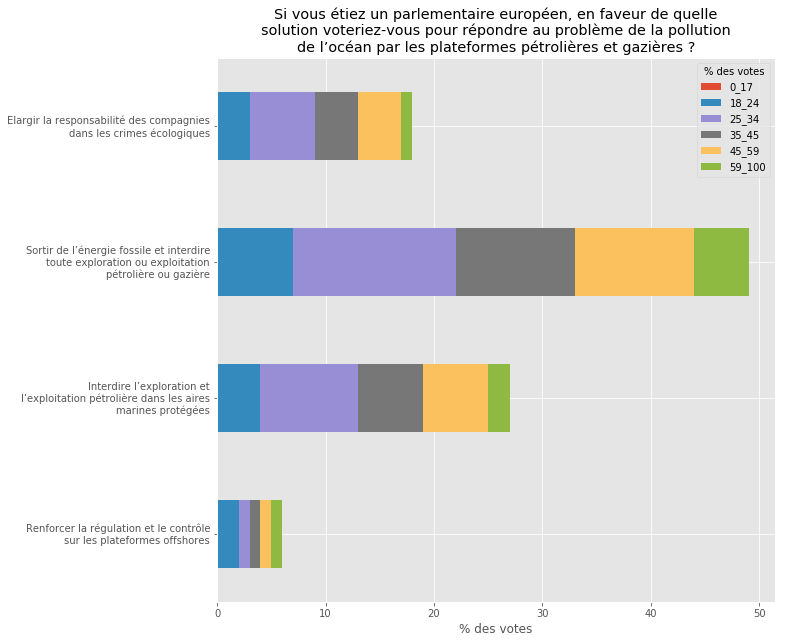

In [253]:
plot_moyenne_pct(q, scope)

## Question 5

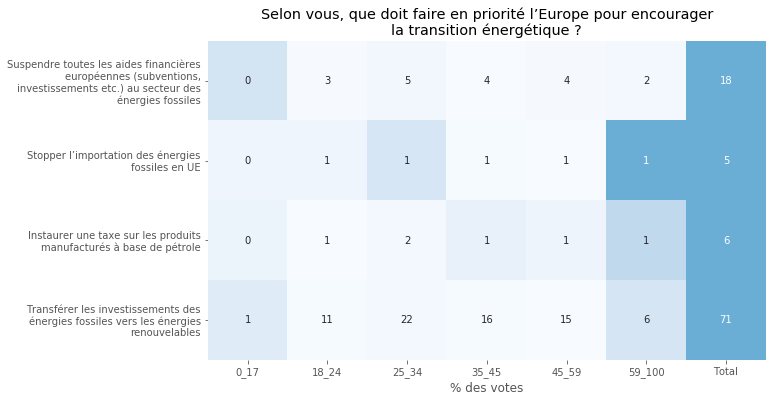

In [254]:
q = 5
plot_khi_2(q, scope)

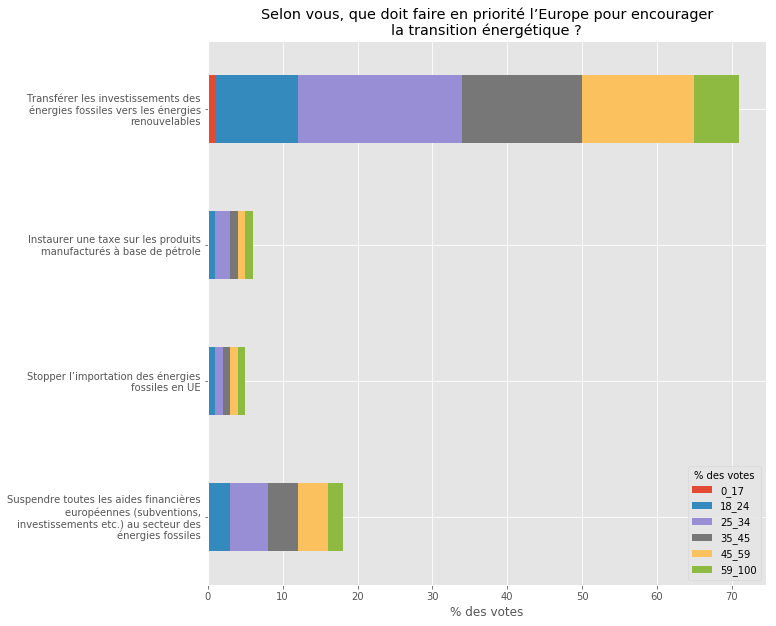

In [255]:
plot_moyenne_pct(q, scope)

## Question 6

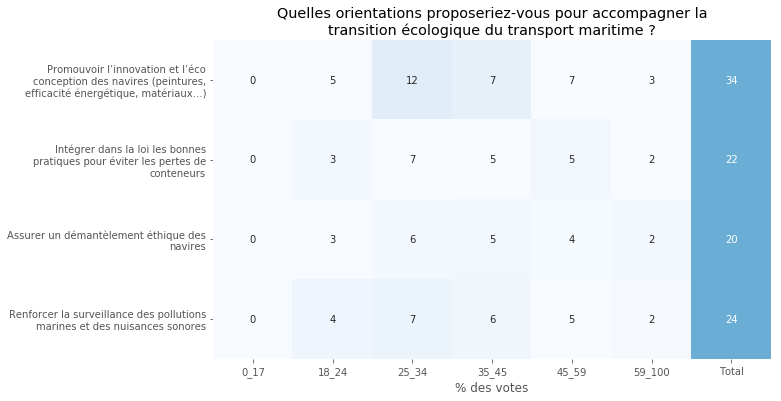

In [256]:
q = 6
plot_khi_2(q, scope)

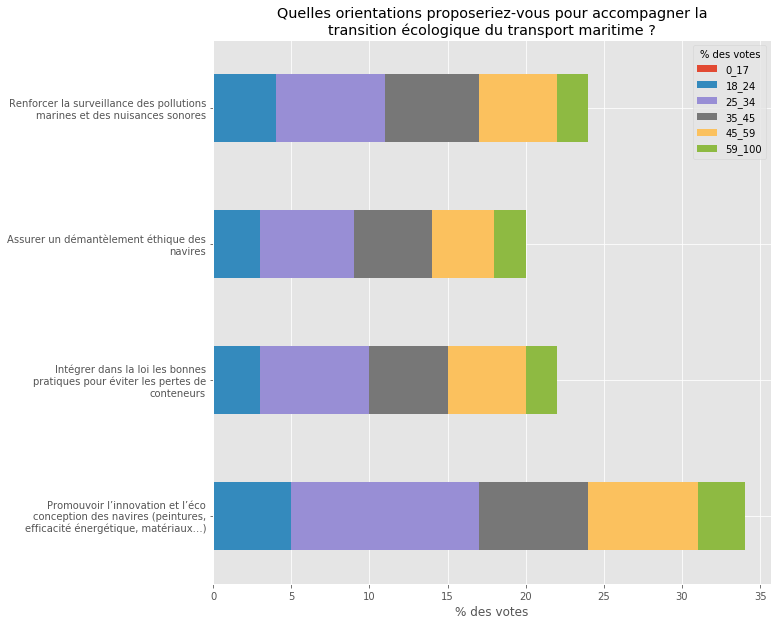

In [257]:
plot_moyenne_pct(q, scope)

## Question 7

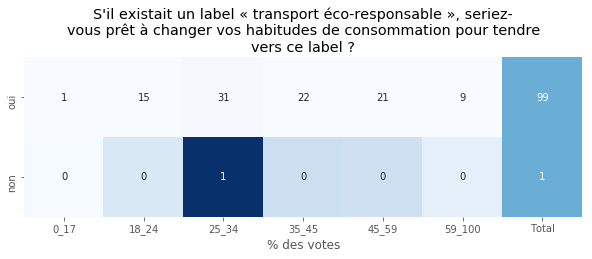

In [258]:
q = 7
plot_khi_2(q, scope)

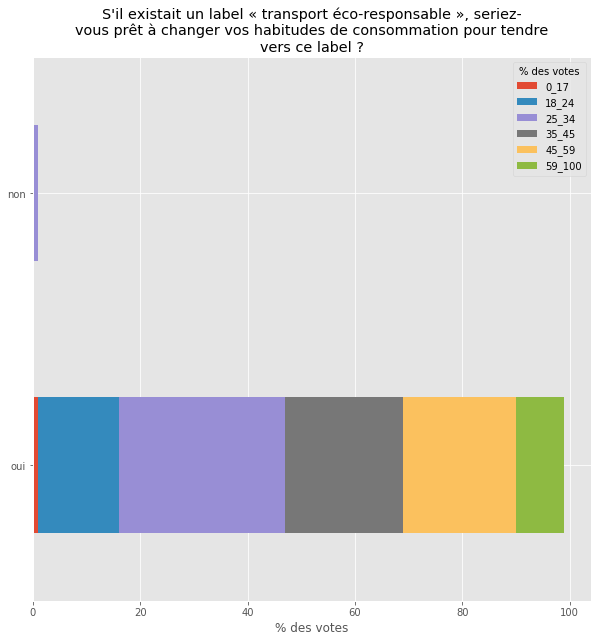

In [259]:
plot_moyenne_pct(q, scope)

## Question 8

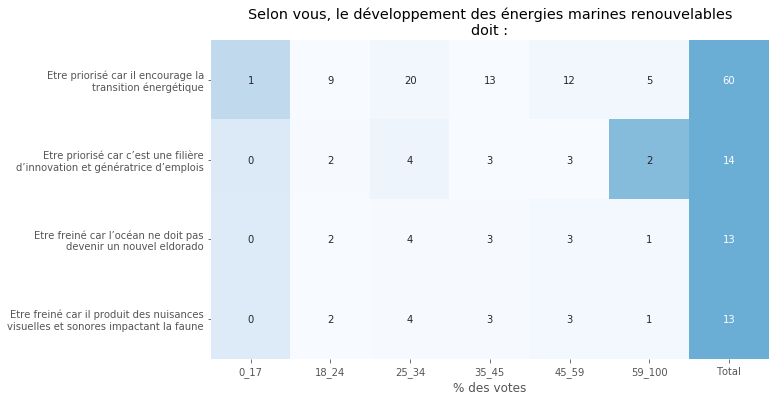

In [260]:
q = 8
plot_khi_2(q, scope)

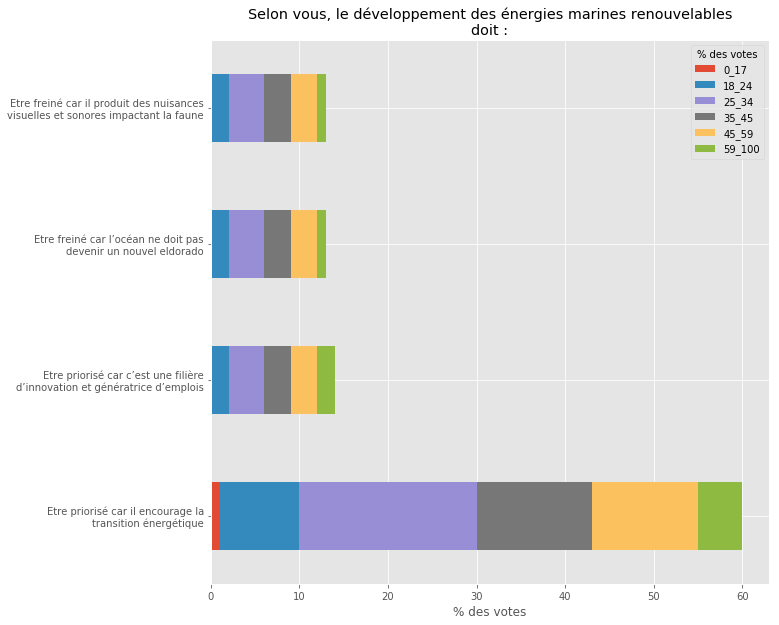

In [261]:
plot_moyenne_pct(q, scope)

## Question 9

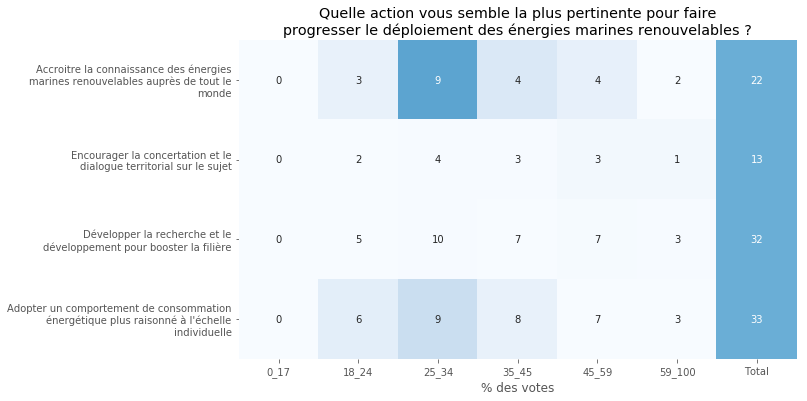

In [262]:
q = 9
plot_khi_2(q, scope)

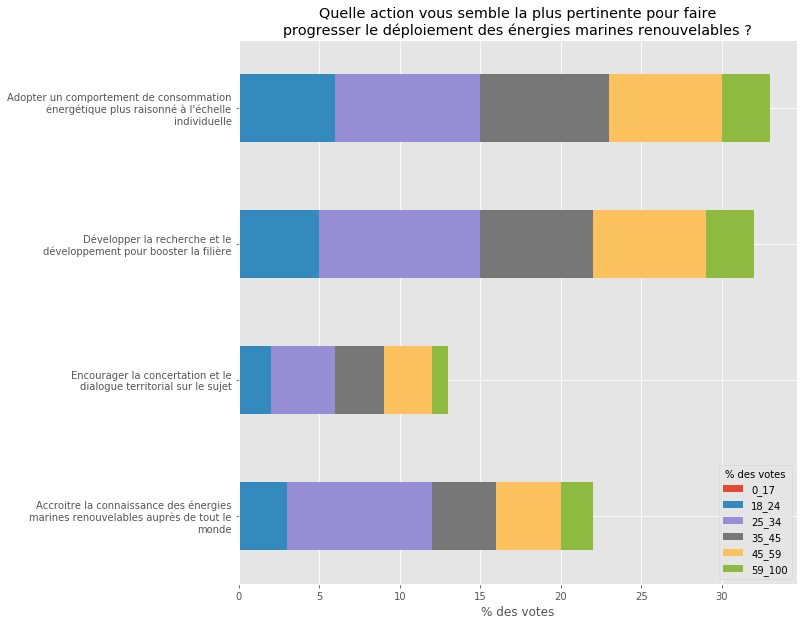

In [263]:
plot_moyenne_pct(q, scope)

## Question 10

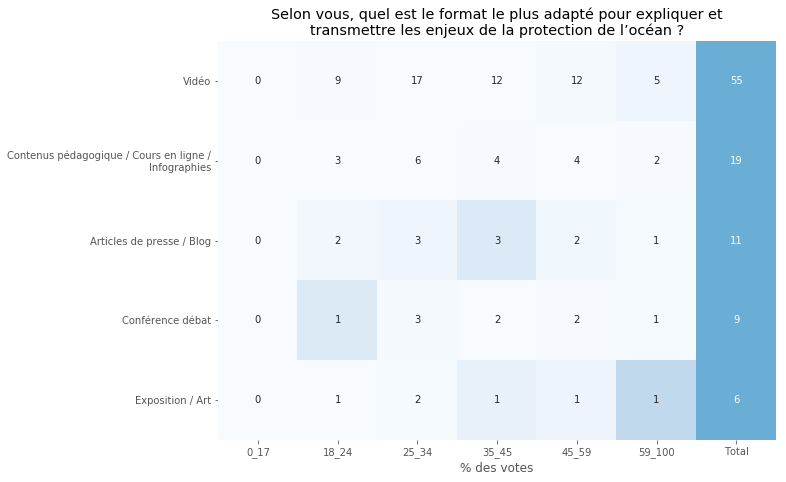

In [264]:
q = 10
plot_khi_2(q, scope)

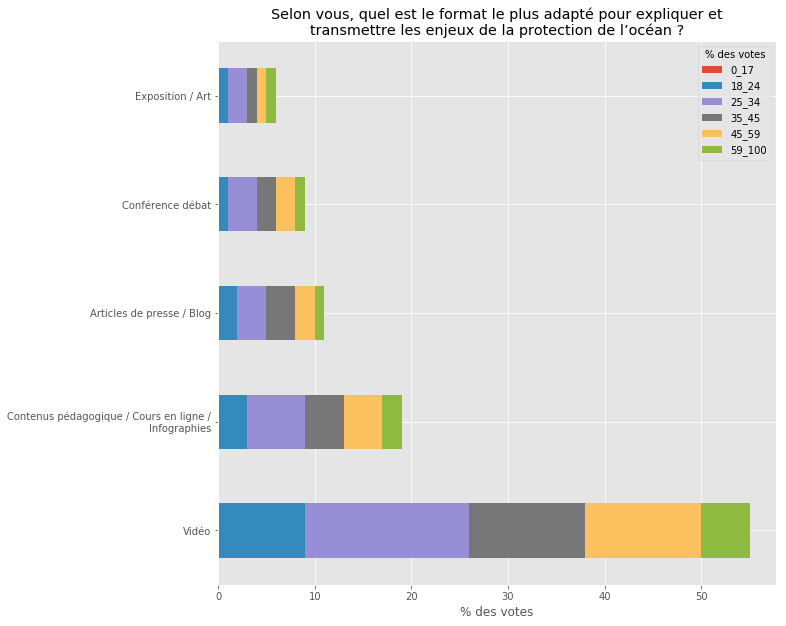

In [265]:
plot_moyenne_pct(q, scope)

## Question 11

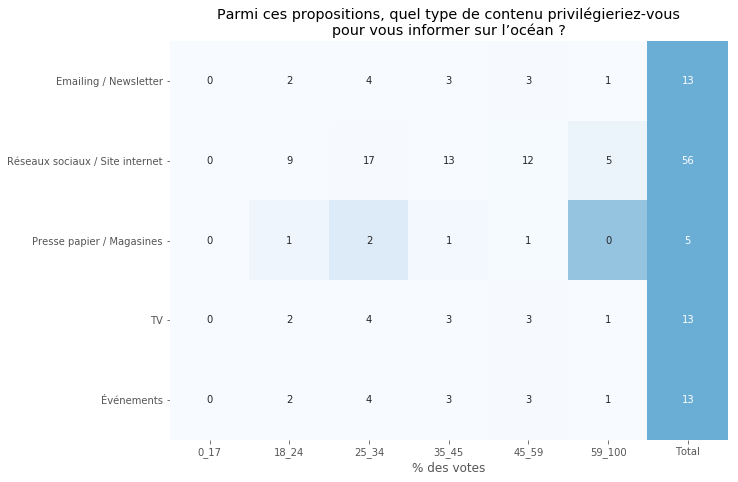

In [266]:
q = 11
plot_khi_2(q, scope)

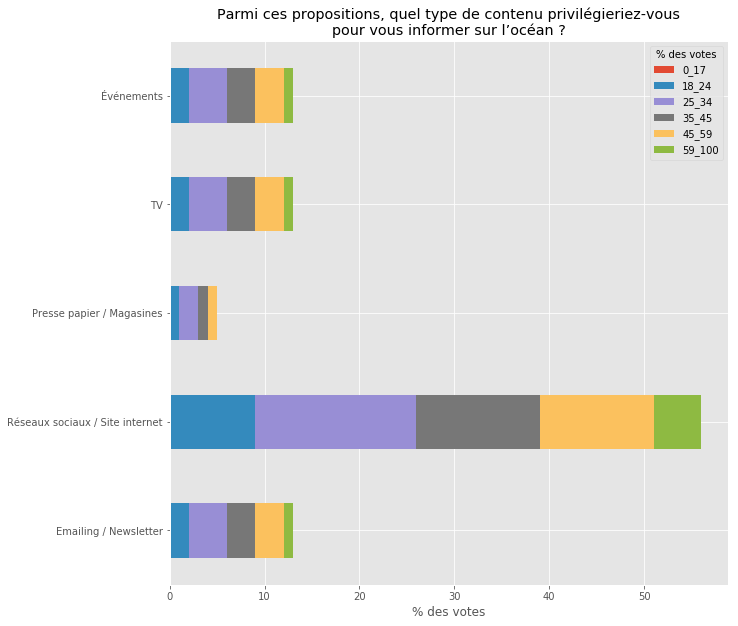

In [267]:
plot_moyenne_pct(q, scope)

## Question 12

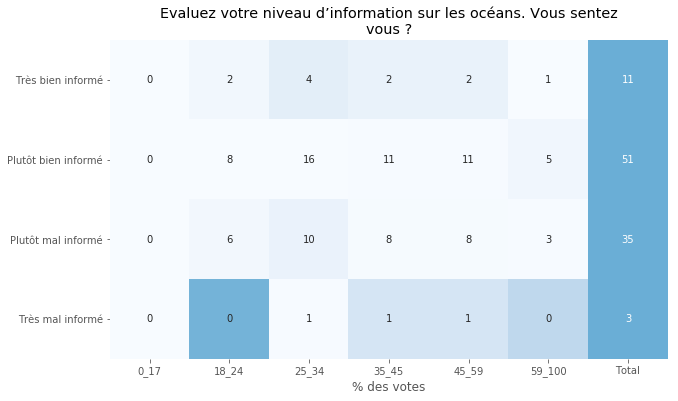

In [268]:
q = 12
plot_khi_2(q, scope)

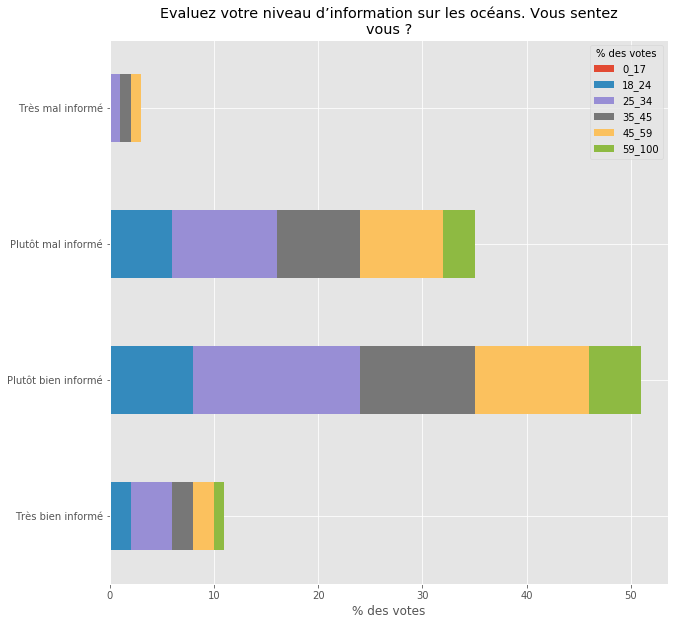

In [269]:
plot_moyenne_pct(q, scope)

## Question 13

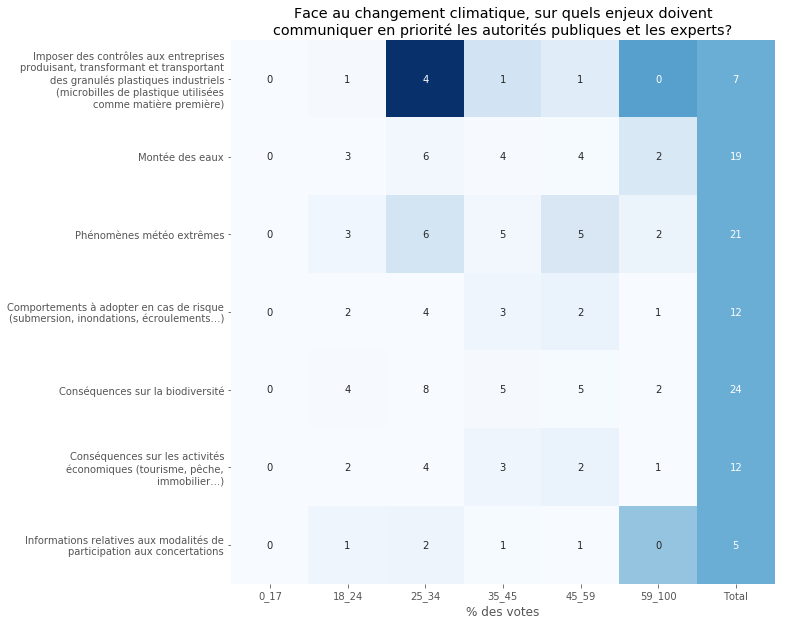

In [270]:
q = 13
plot_khi_2(q, scope)

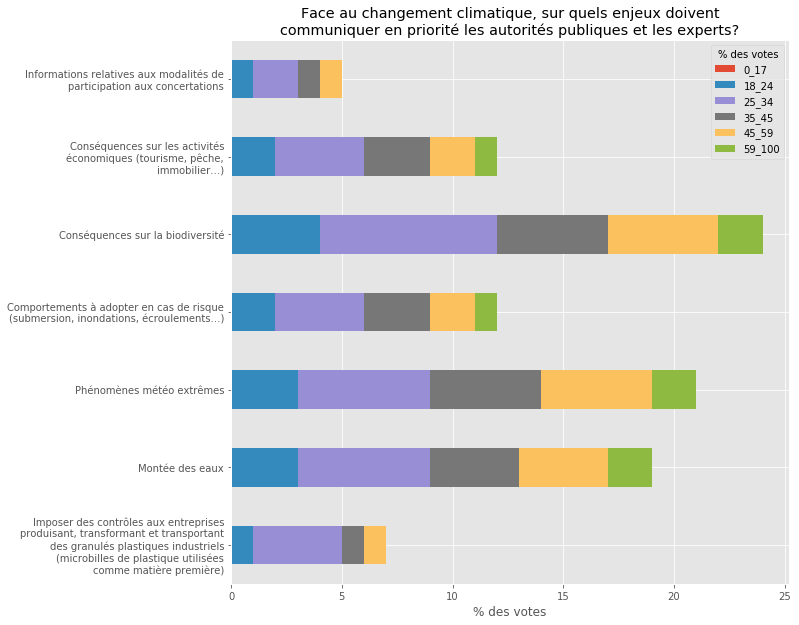

In [271]:
plot_moyenne_pct(q, scope)

## Question 14

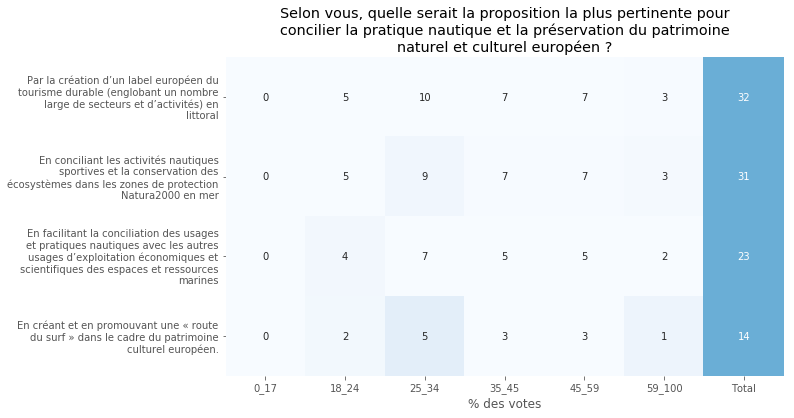

In [272]:
q = 14
plot_khi_2(q, scope)

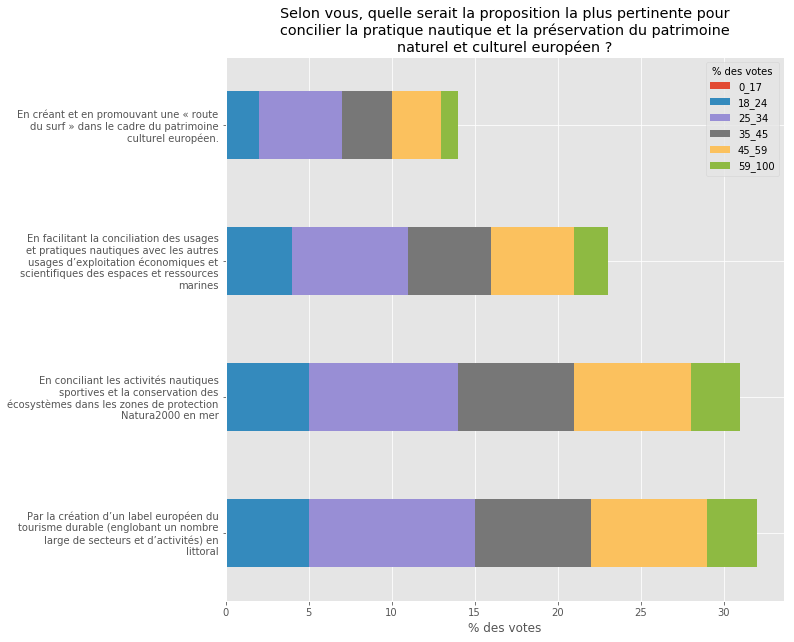

In [273]:
plot_moyenne_pct(q, scope)

# Par genre

In [274]:
scope = "genre"

In [275]:
pd.DataFrame(reponses.groupby(scope).count()["cnt"])

cnt
genre      
autre    55
femme  4333
homme  2489

## Question 0

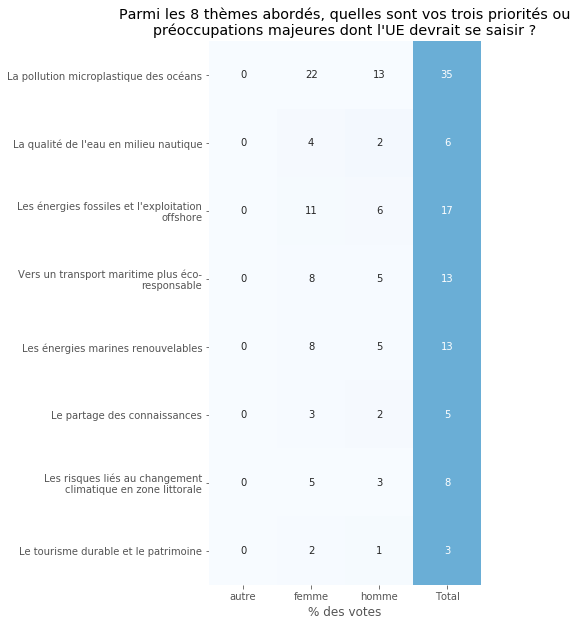

In [276]:
q = 0
plot_khi_2(q, scope)

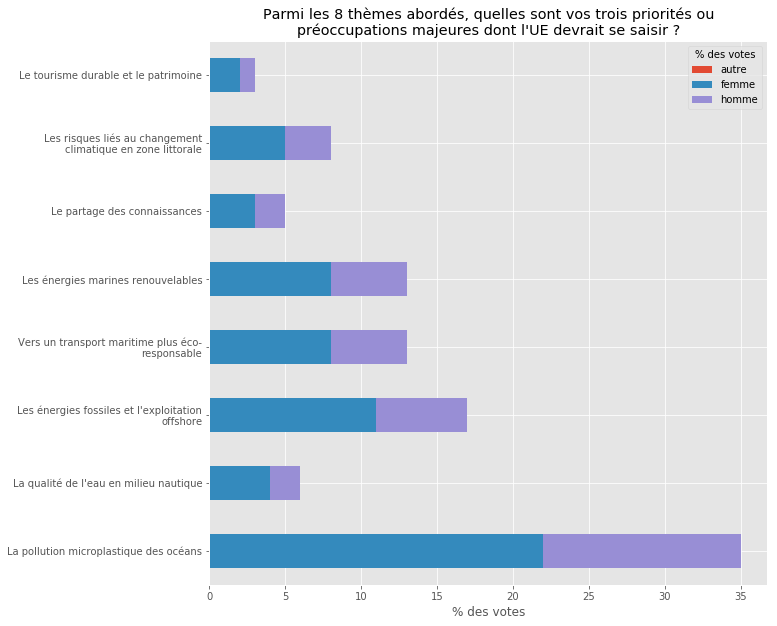

In [277]:
plot_moyenne_pct(q, scope)

## Question 1

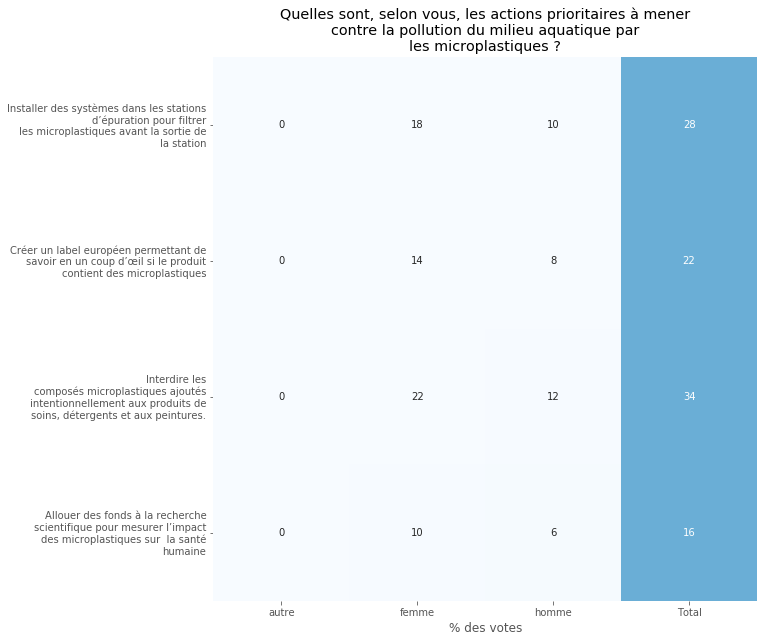

In [278]:
q = 1
plot_khi_2(q, scope)

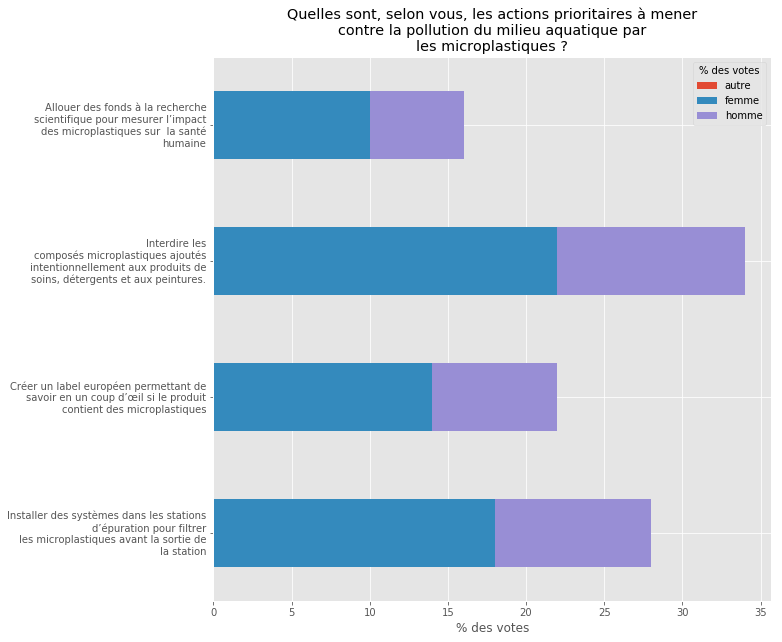

In [279]:
plot_moyenne_pct(q, scope)

## Question 2

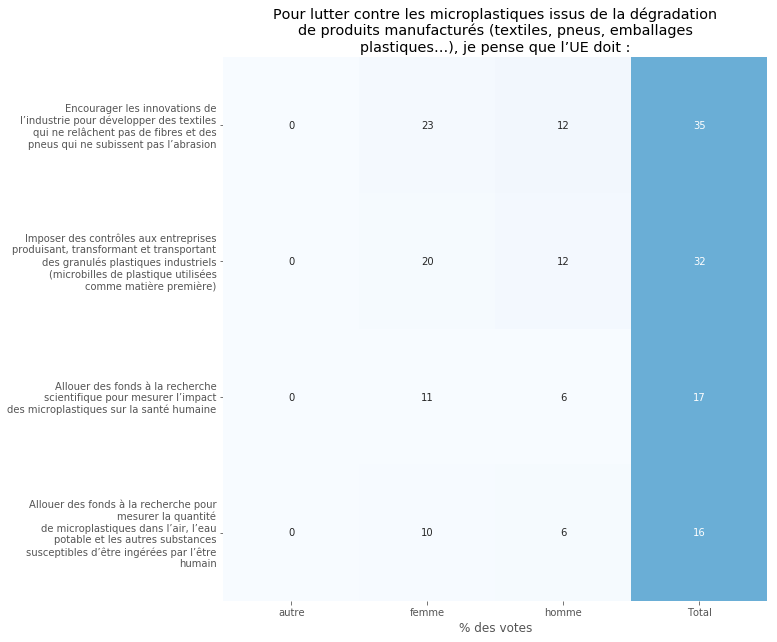

In [280]:
q = 2
plot_khi_2(q, scope)

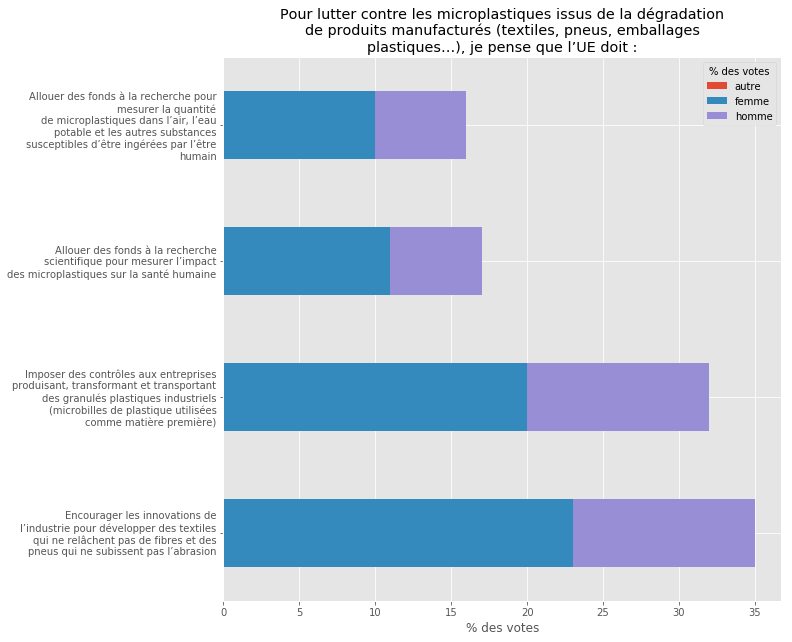

In [281]:
plot_moyenne_pct(q, scope)

## Question 3

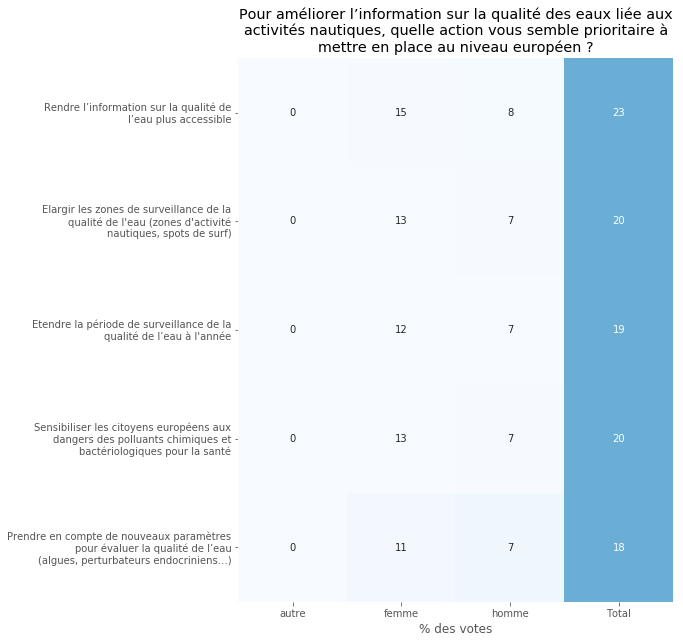

In [282]:
q = 3
plot_khi_2(q, scope)

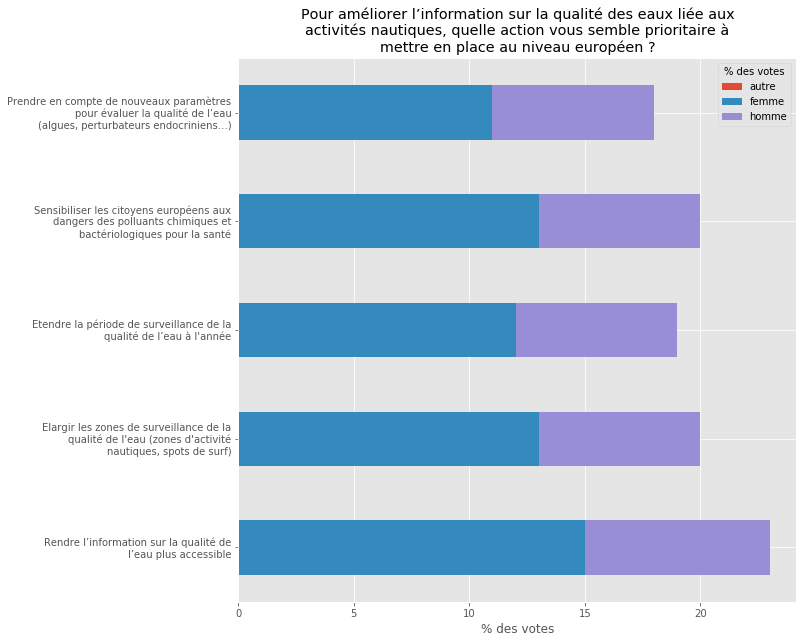

In [283]:
plot_moyenne_pct(q, scope)

## Question 4

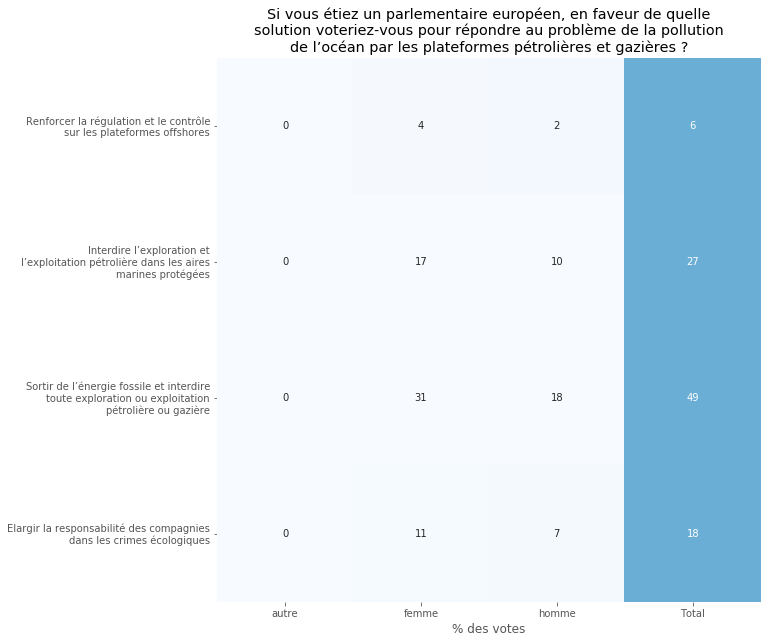

In [284]:
q = 4
plot_khi_2(q, scope)

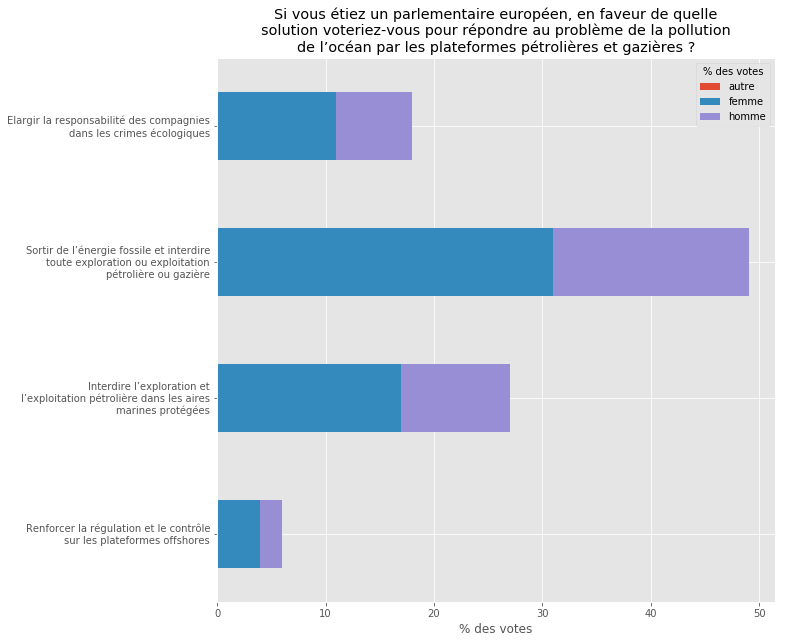

In [285]:
plot_moyenne_pct(q, scope)

## Question 5

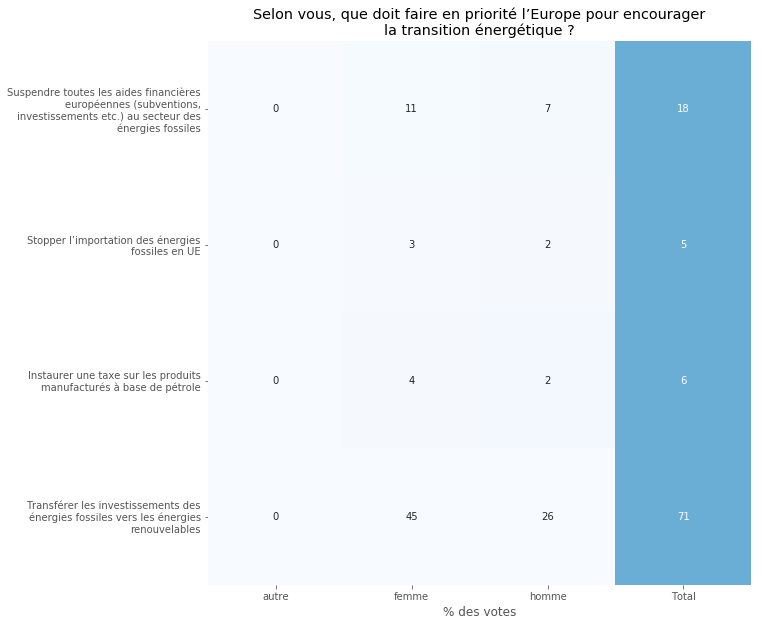

In [286]:
q = 5
plot_khi_2(q, scope)

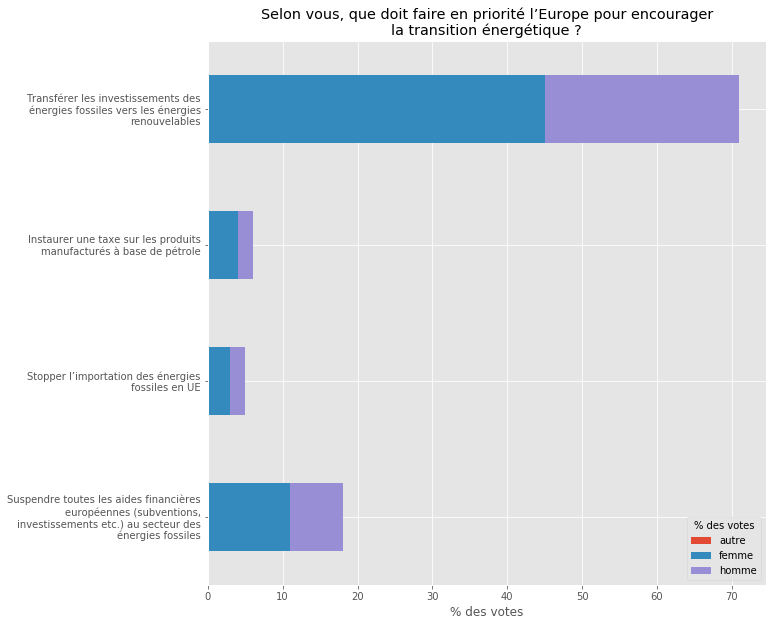

In [287]:
plot_moyenne_pct(q, scope)

## Question 6

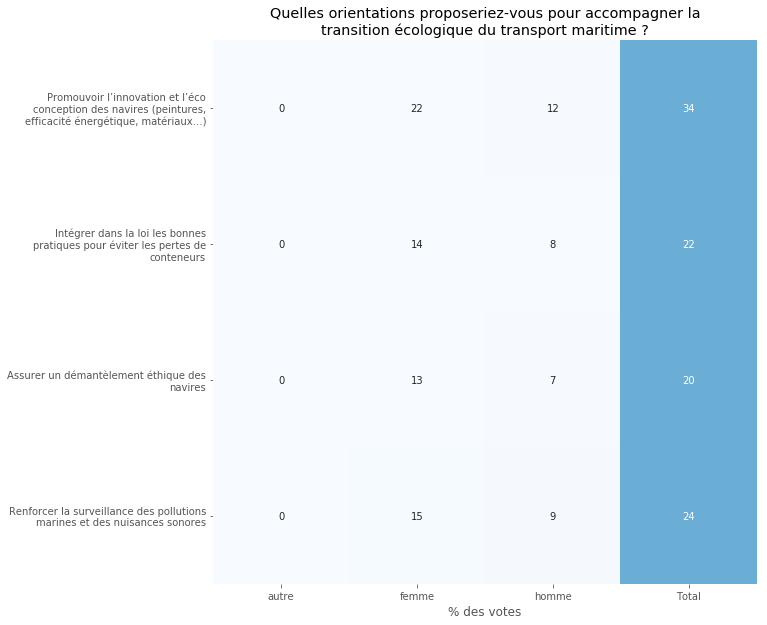

In [288]:
q = 6
plot_khi_2(q, scope)

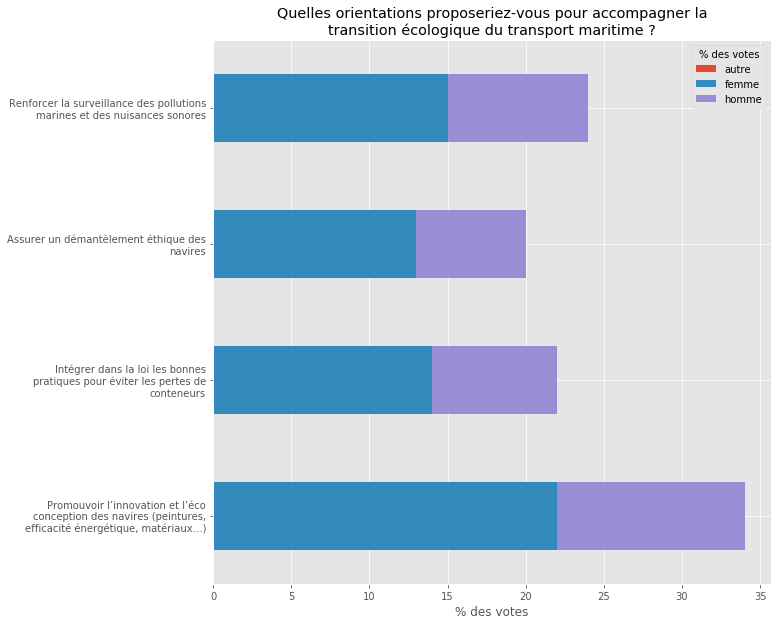

In [289]:
plot_moyenne_pct(q, scope)

## Question 7

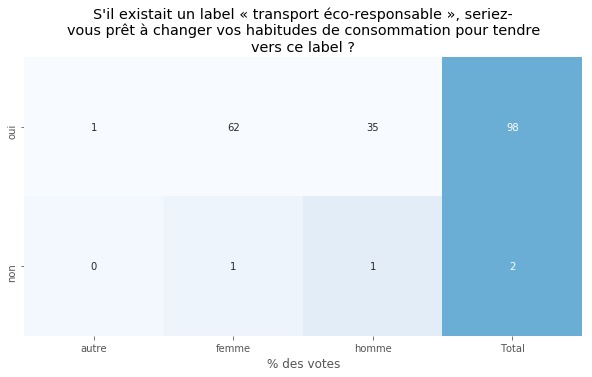

In [290]:
q = 7
plot_khi_2(q, scope)

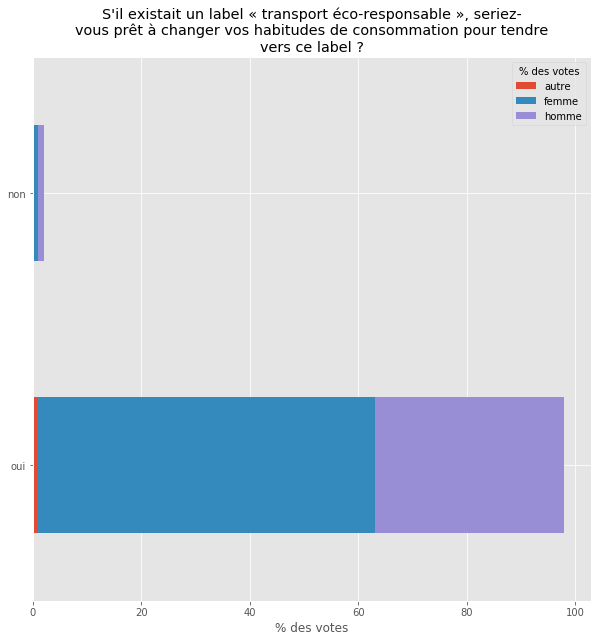

In [291]:
plot_moyenne_pct(q, scope)

## Question 8

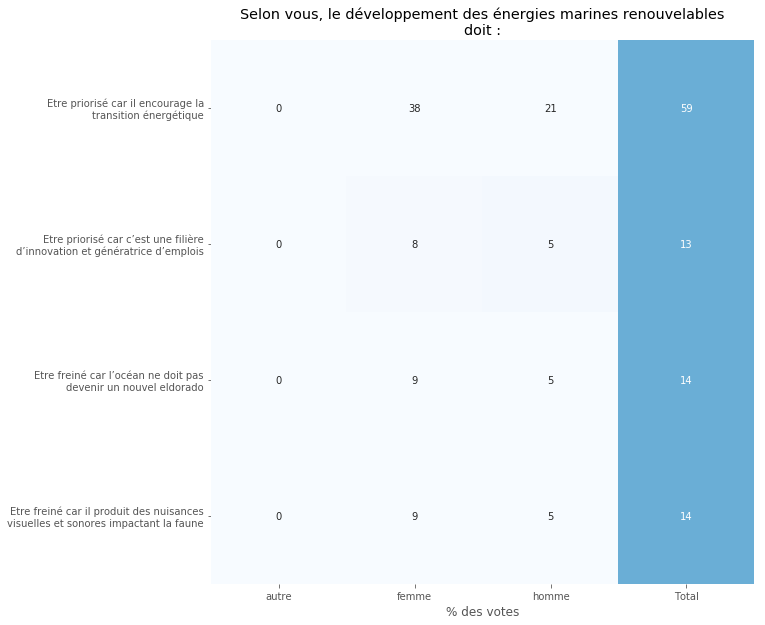

In [292]:
q = 8
plot_khi_2(q, scope)

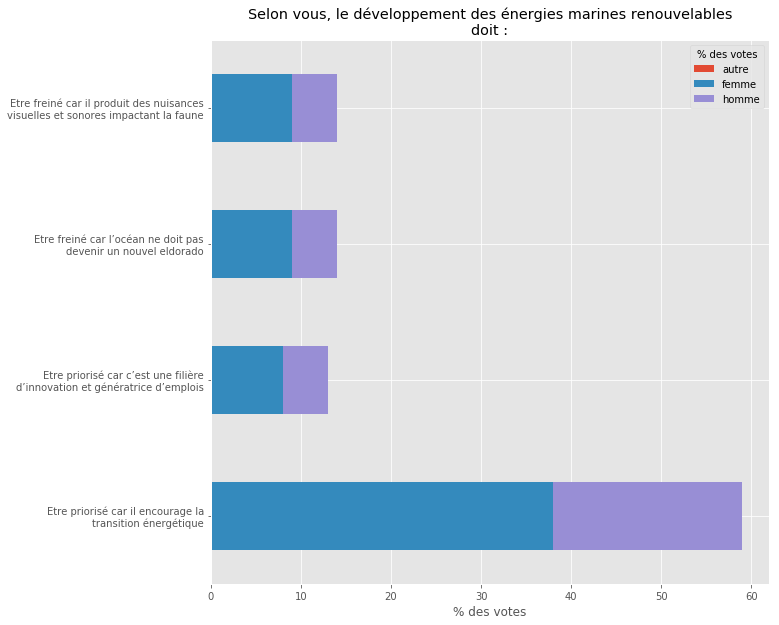

In [293]:
plot_moyenne_pct(q, scope)

## Question 9

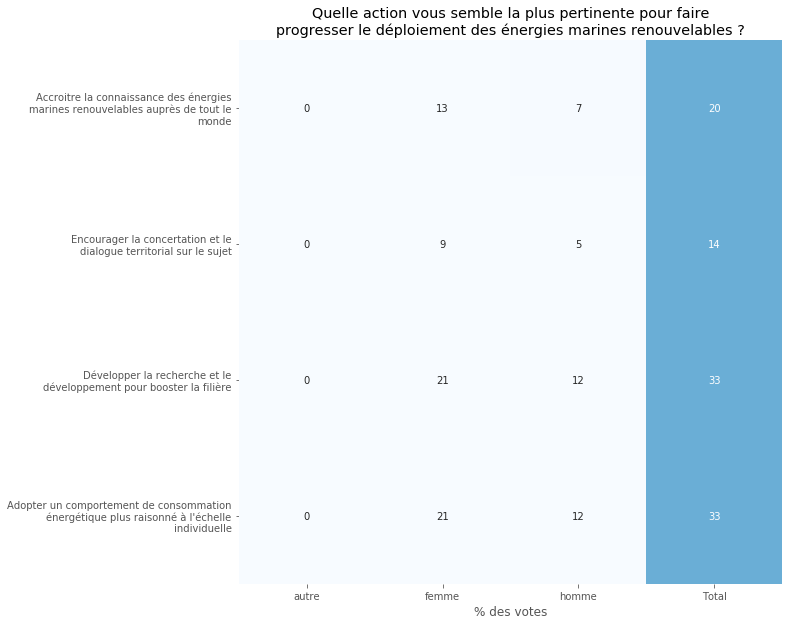

In [294]:
q = 9
plot_khi_2(q, scope)

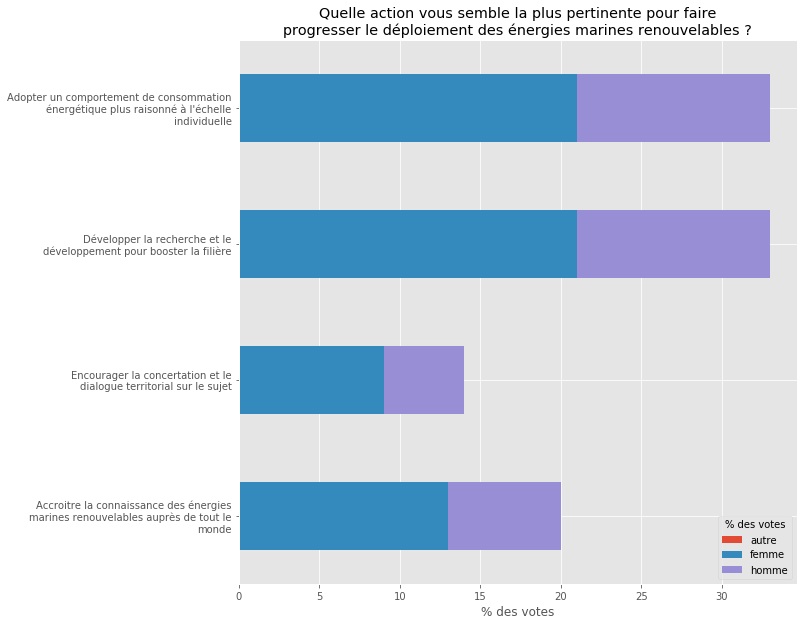

In [295]:
plot_moyenne_pct(q, scope)

## Question 10

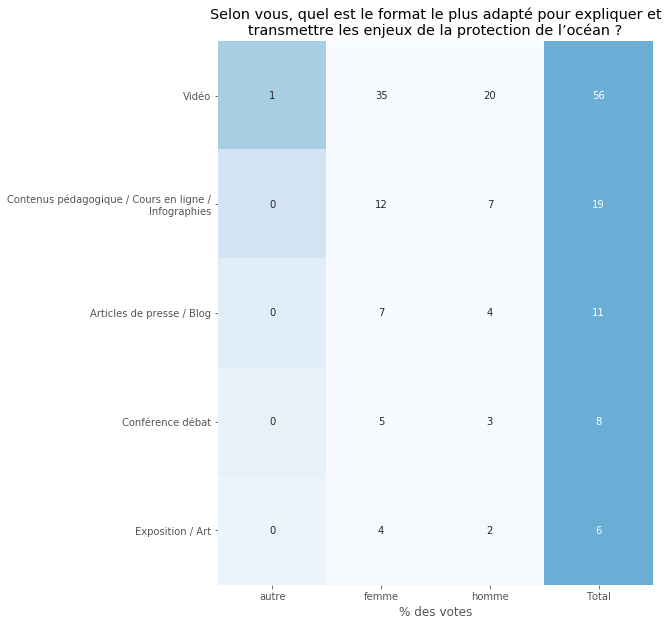

In [296]:
q = 10
plot_khi_2(q, scope)

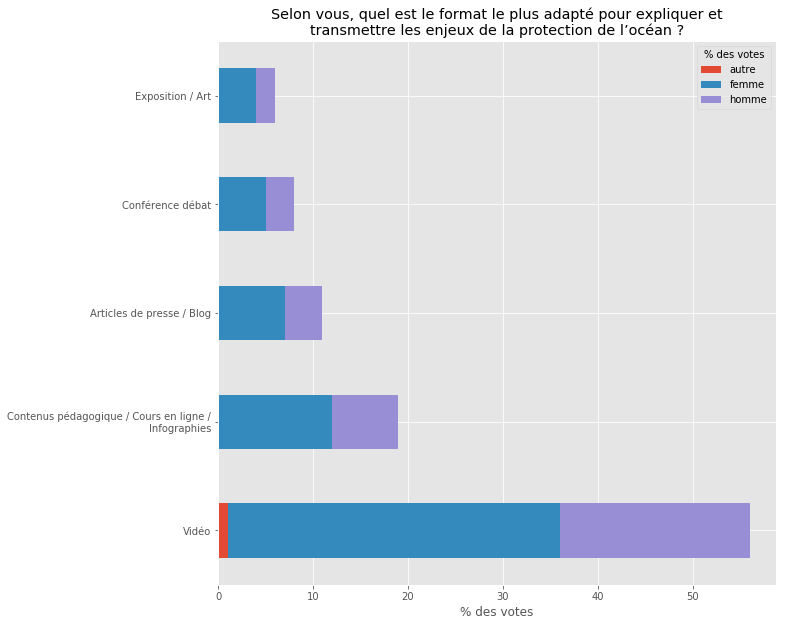

In [297]:
plot_moyenne_pct(q, scope)

## Question 11

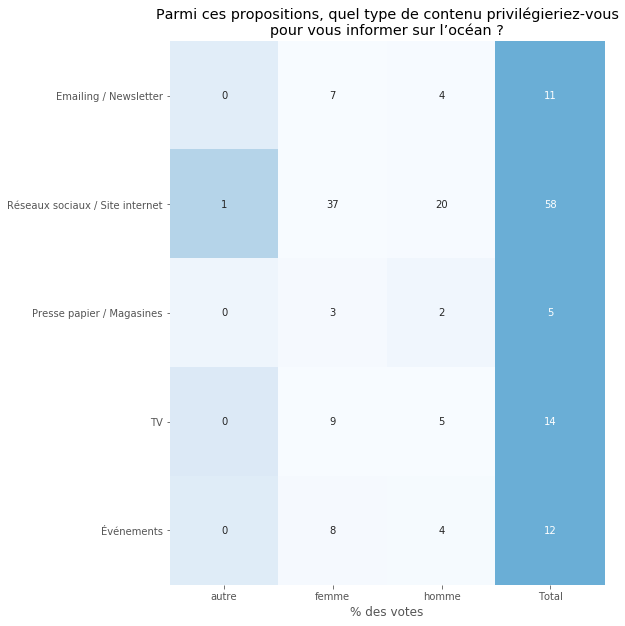

In [298]:
q = 11
plot_khi_2(q, scope)

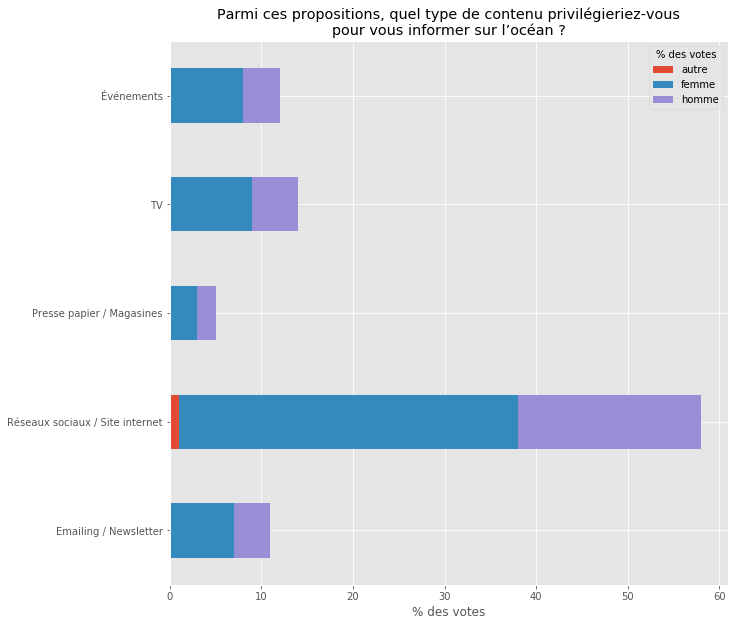

In [299]:
plot_moyenne_pct(q, scope)

## Question 12

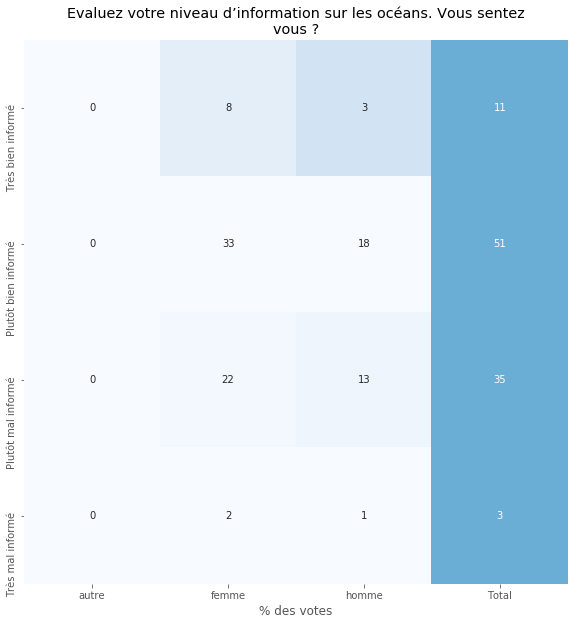

In [300]:
q = 12
plot_khi_2(q, scope)

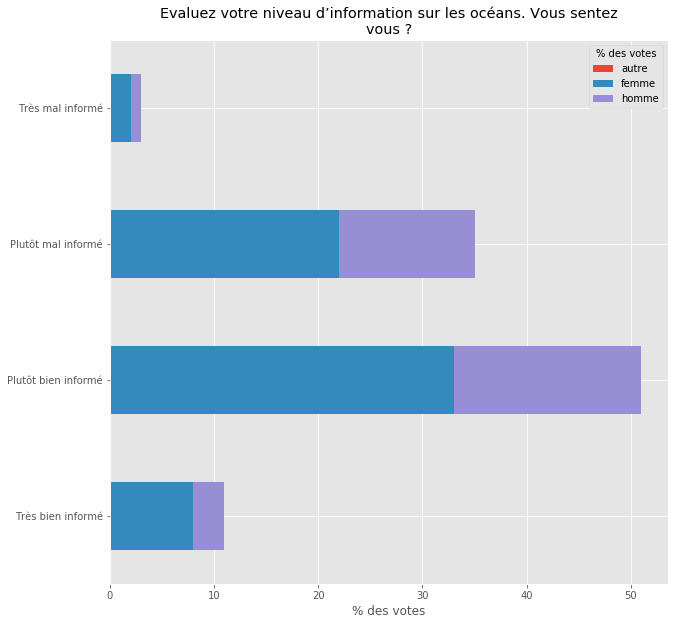

In [301]:
plot_moyenne_pct(q, scope)

## Question 13

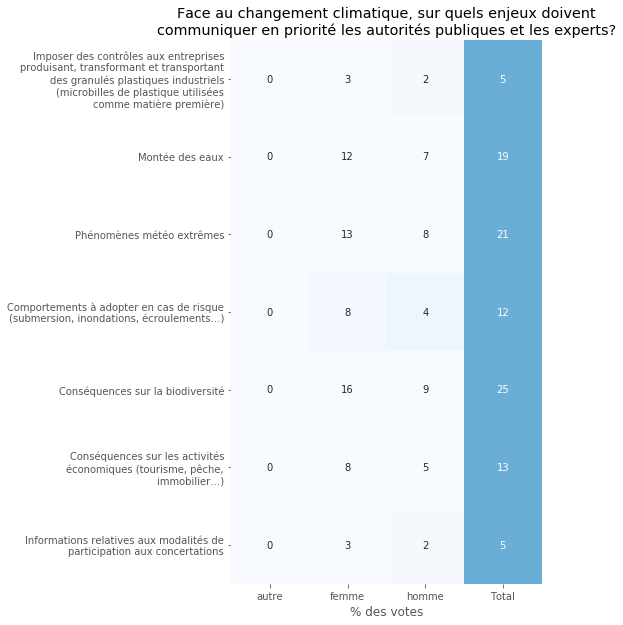

In [302]:
q = 13
plot_khi_2(q, scope)

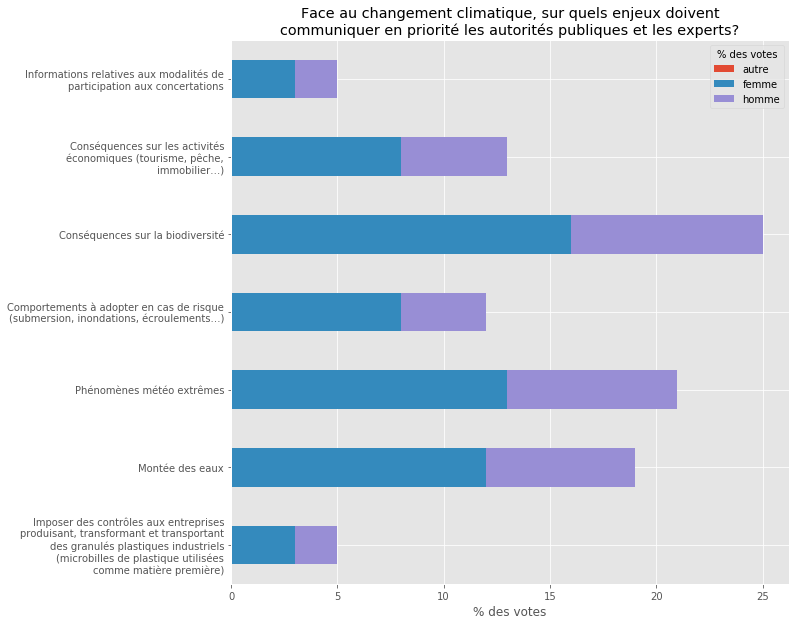

In [303]:
plot_moyenne_pct(q, scope)

## Question 14

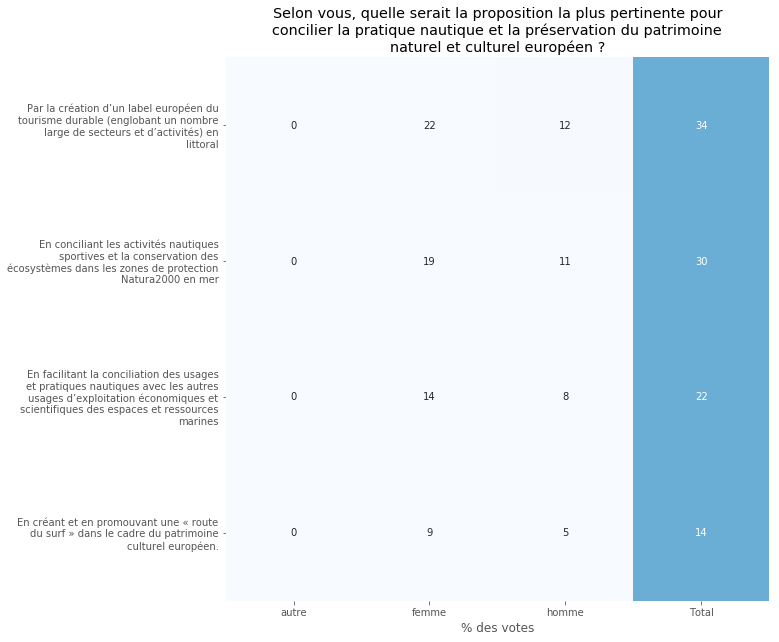

In [304]:
q = 14
plot_khi_2(q, scope)

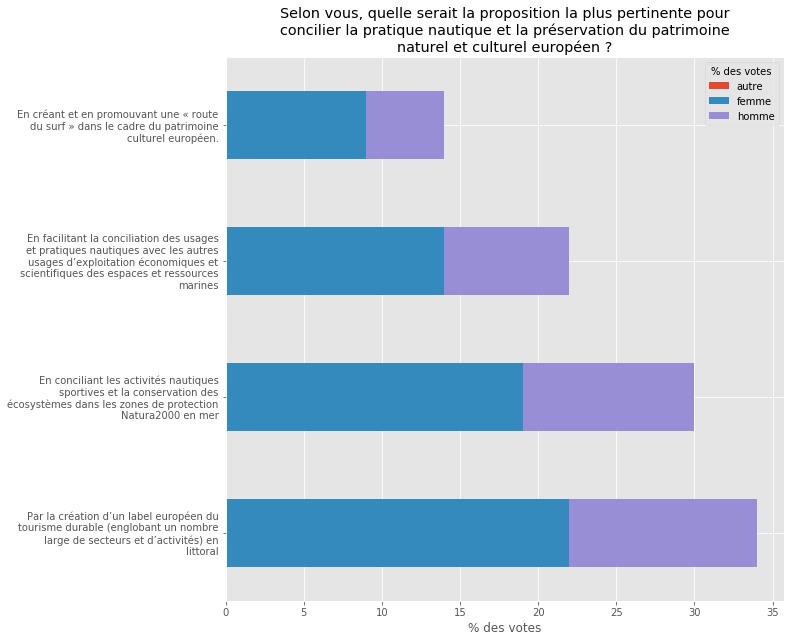

In [305]:
plot_moyenne_pct(q, scope)

# Par profession

In [306]:
scope = "profession"

In [307]:
pd.DataFrame(reponses.groupby(scope).count()["cnt"])

cnt
profession          
cadre            104
cadre moyen      467
cadre senior     436
employé(e)       413
fermier(e)       896
indépendant(e)  4557

## Question 0

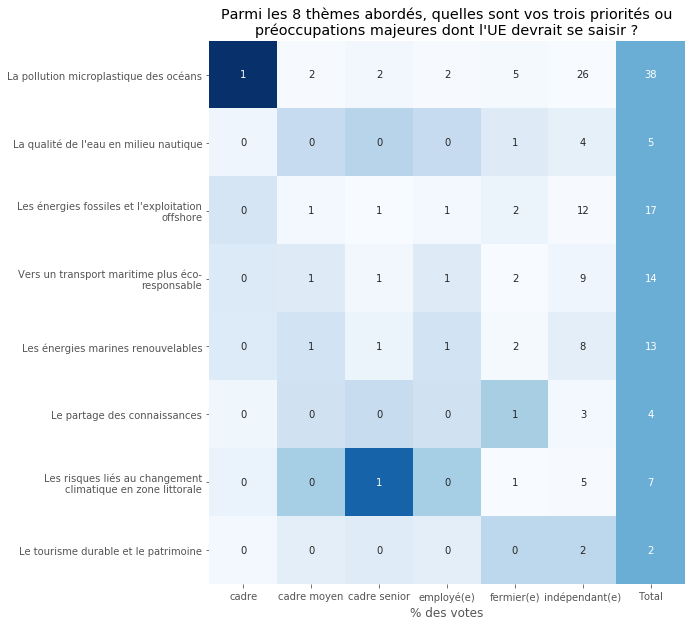

In [308]:
q = 0
plot_khi_2(q, scope)

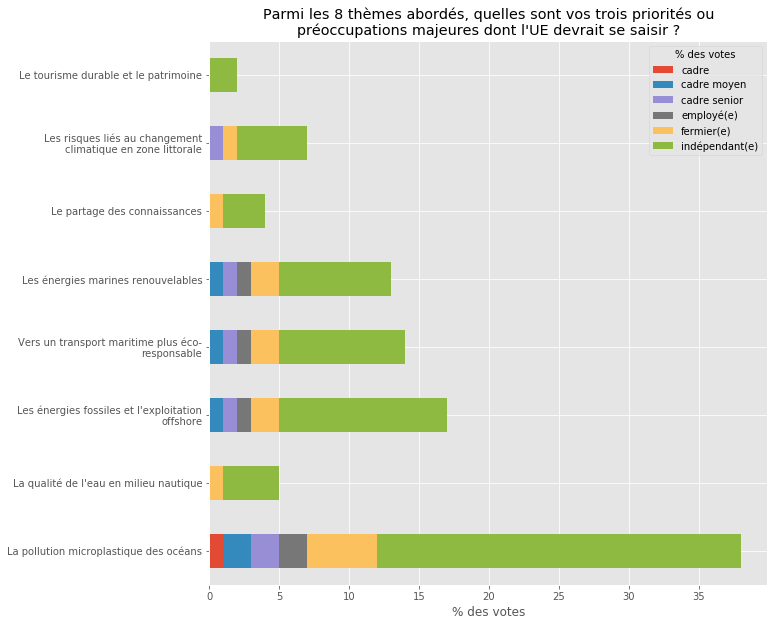

In [309]:
plot_moyenne_pct(q, scope)

## Question 1

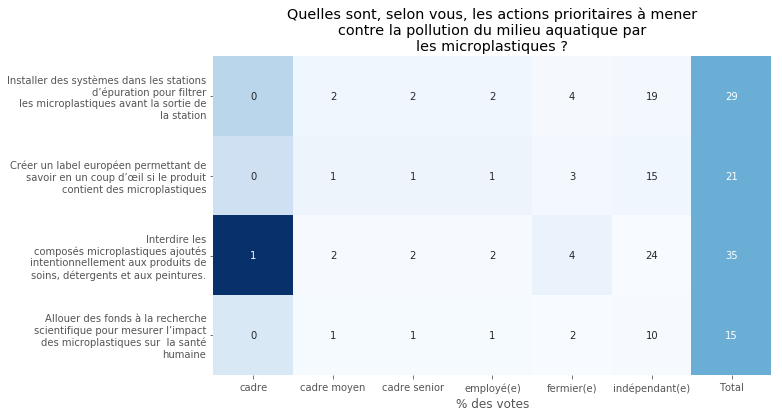

In [310]:
q = 1
plot_khi_2(q, scope)

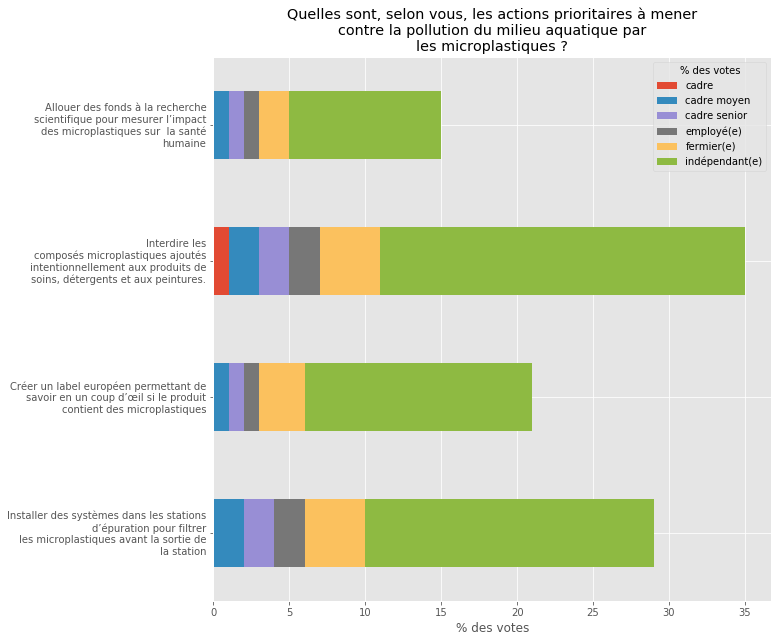

In [311]:
plot_moyenne_pct(q, scope)

## Question 2

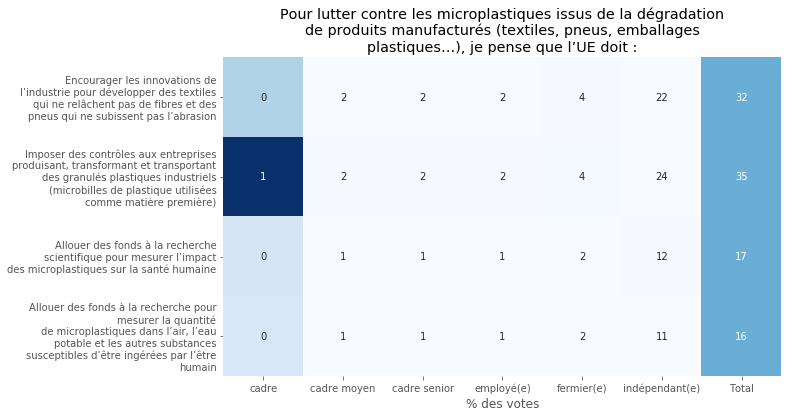

In [312]:
q = 2
plot_khi_2(q, scope)

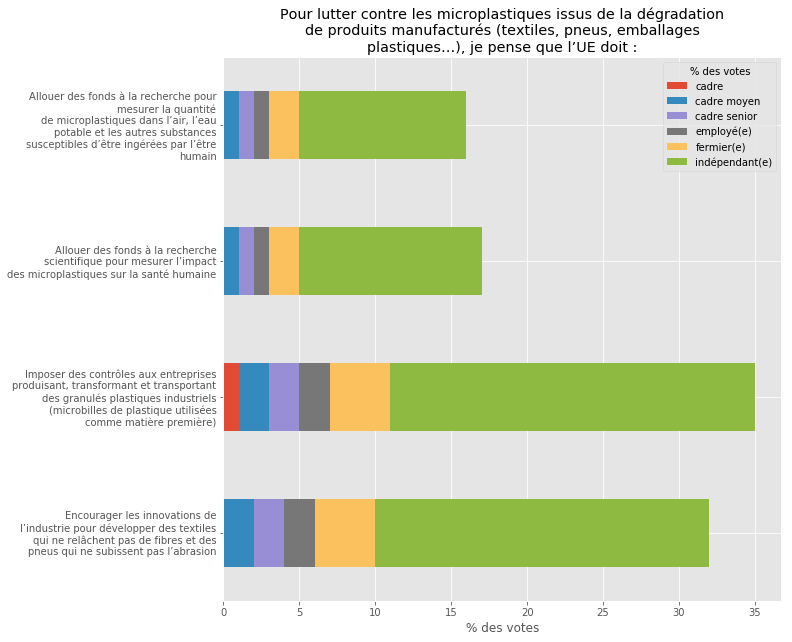

In [313]:
plot_moyenne_pct(q, scope)

## Question 3

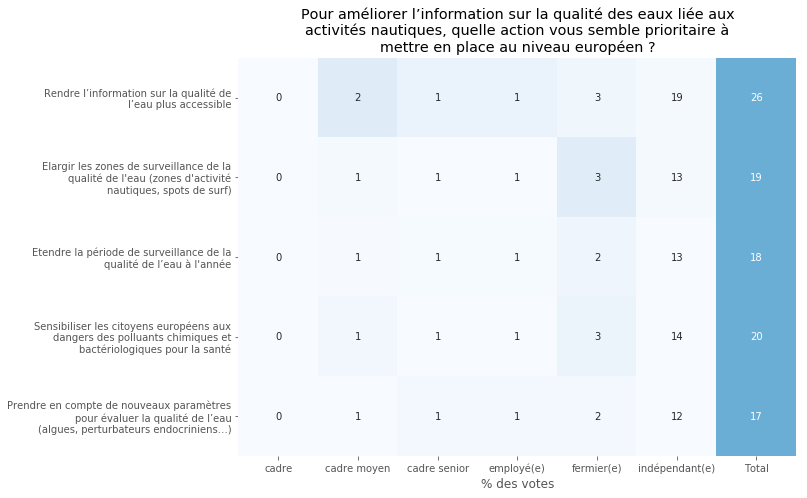

In [314]:
q = 3
plot_khi_2(q, scope)

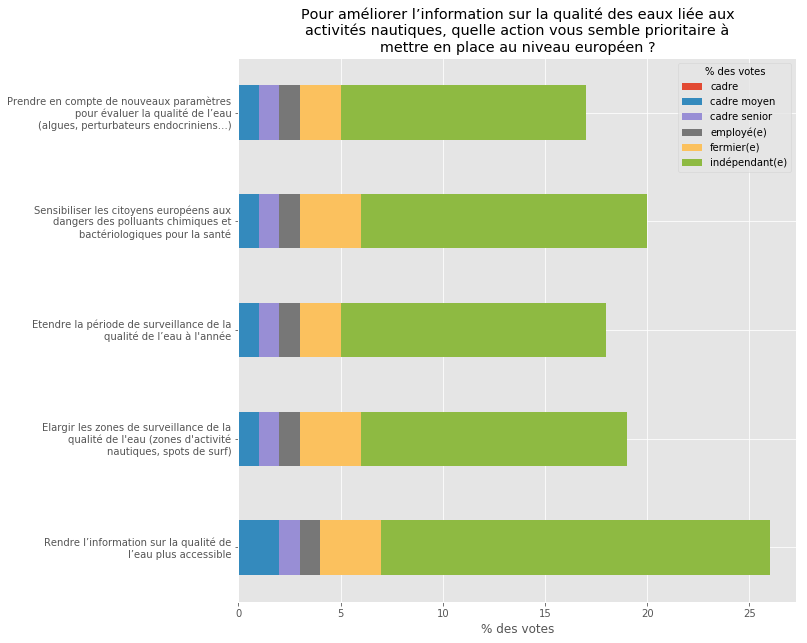

In [315]:
plot_moyenne_pct(q, scope)

## Question 4

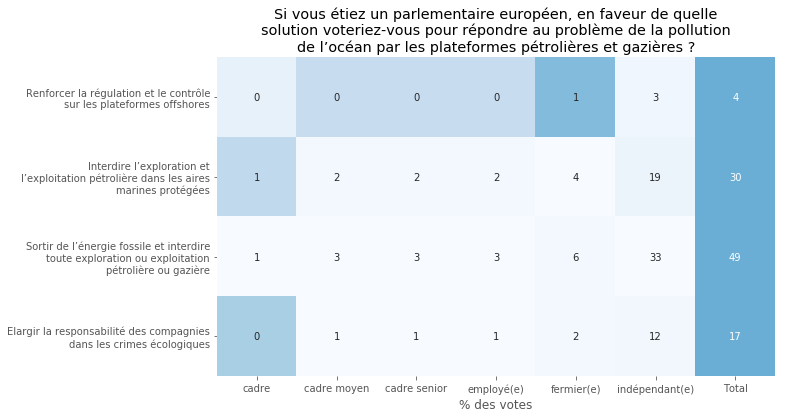

In [316]:
q = 4
plot_khi_2(q, scope)

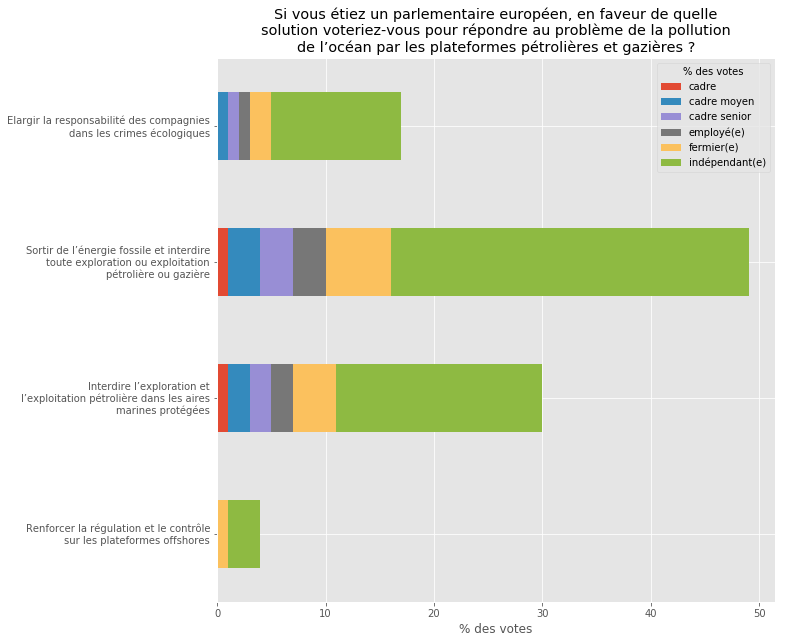

In [317]:
plot_moyenne_pct(q, scope)

## Question 5

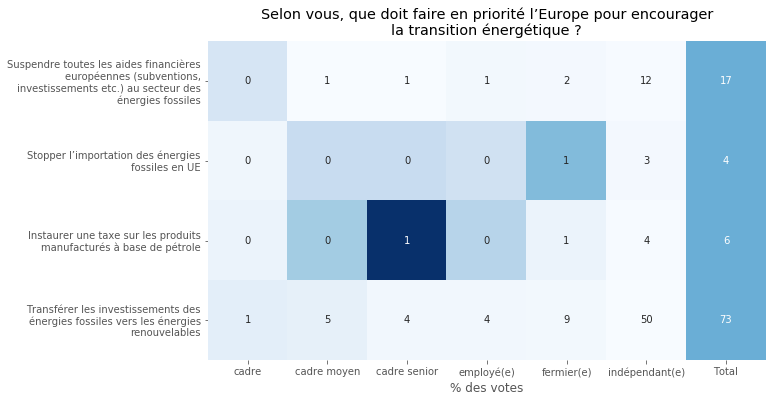

In [318]:
q = 5
plot_khi_2(q, scope)

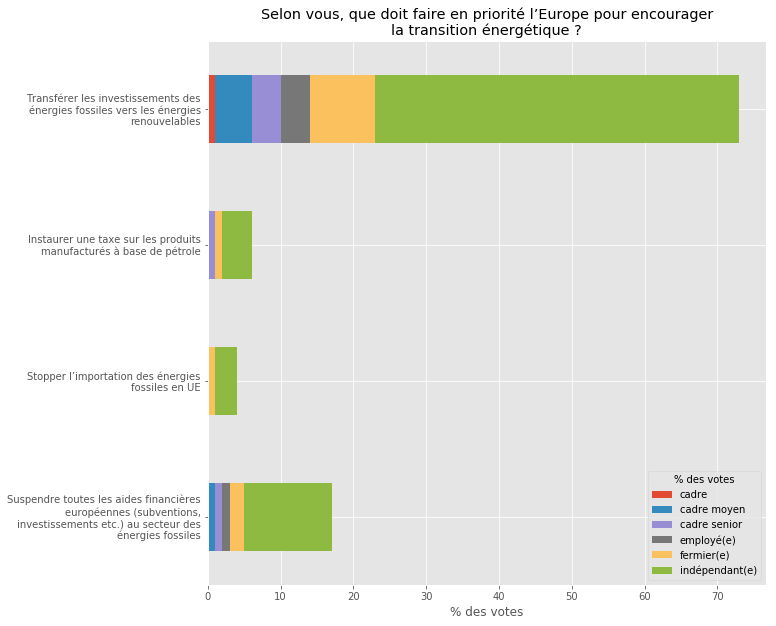

In [319]:
plot_moyenne_pct(q, scope)

## Question 6

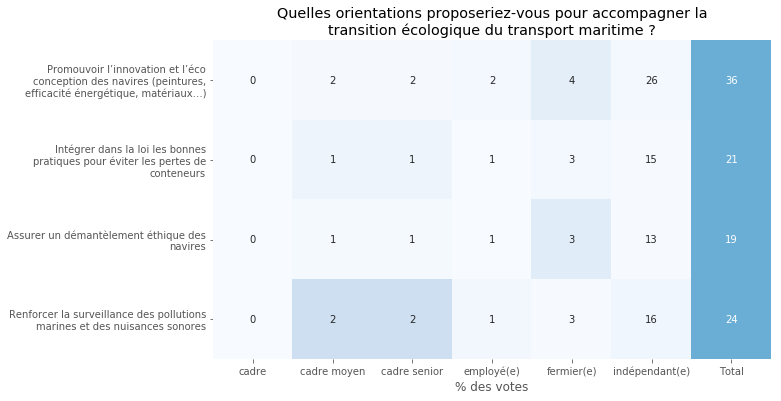

In [320]:
q = 6
plot_khi_2(q, scope)

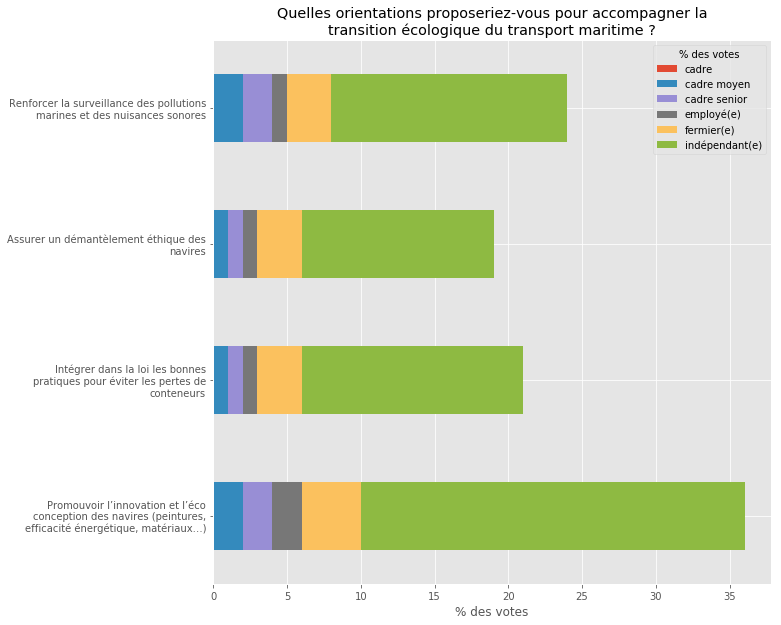

In [321]:
plot_moyenne_pct(q, scope)

## Question 7

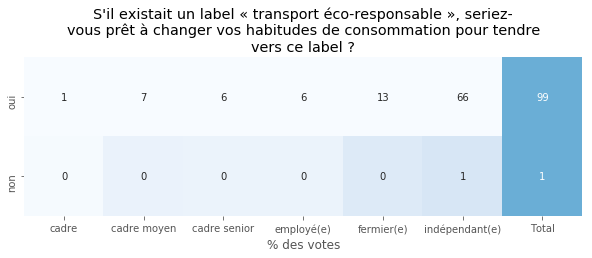

In [322]:
q = 7
plot_khi_2(q, scope)

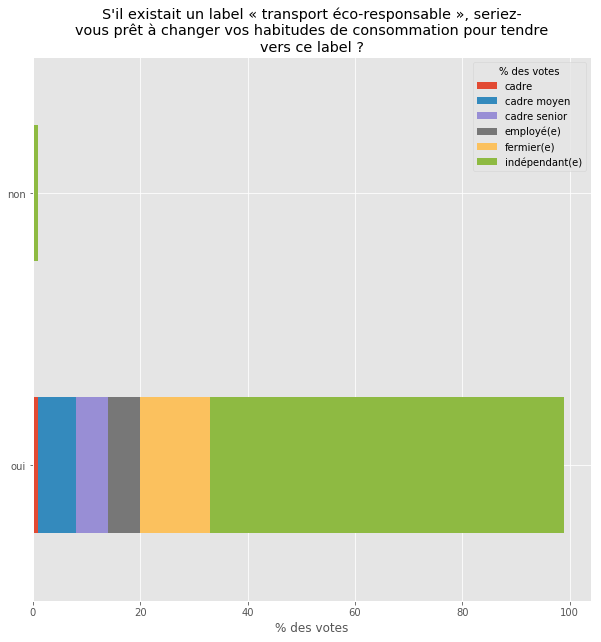

In [323]:
plot_moyenne_pct(q, scope)

## Question 8

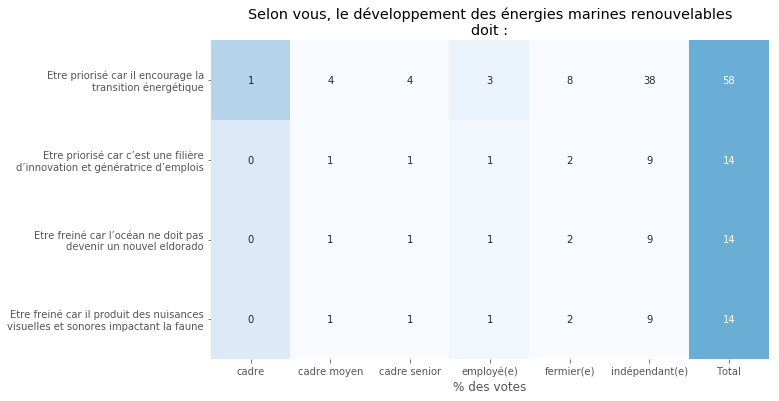

In [324]:
q = 8
plot_khi_2(q, scope)

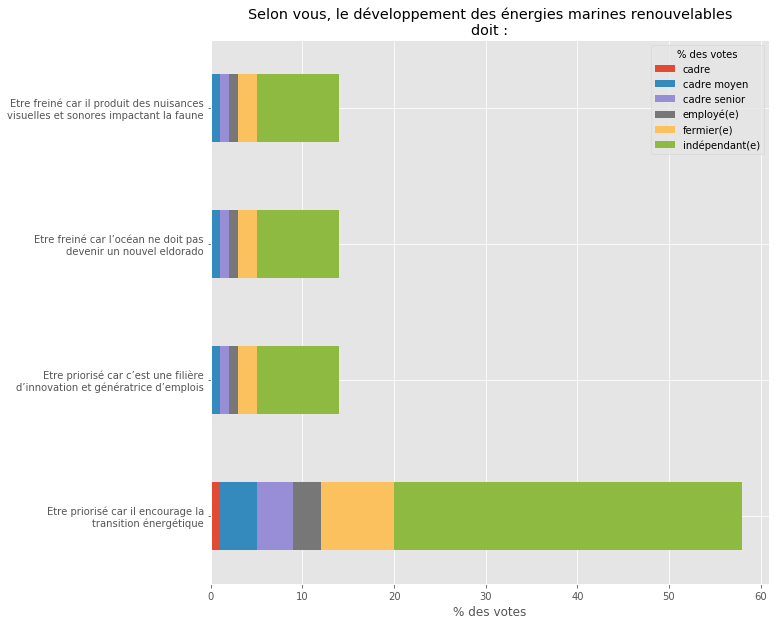

In [325]:
plot_moyenne_pct(q, scope)

## Question 9

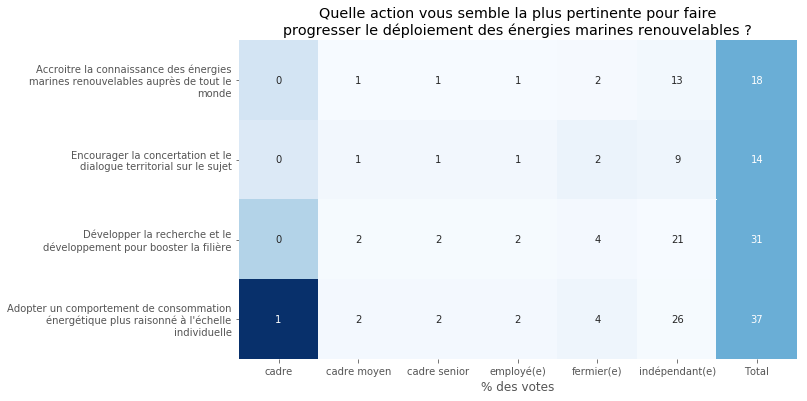

In [326]:
q = 9
plot_khi_2(q, scope)

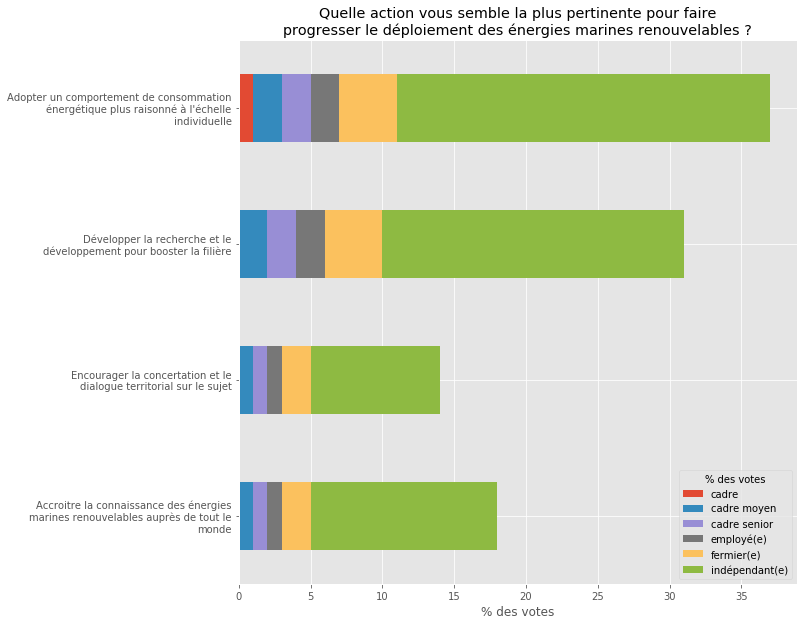

In [327]:
plot_moyenne_pct(q, scope)

## Question 10

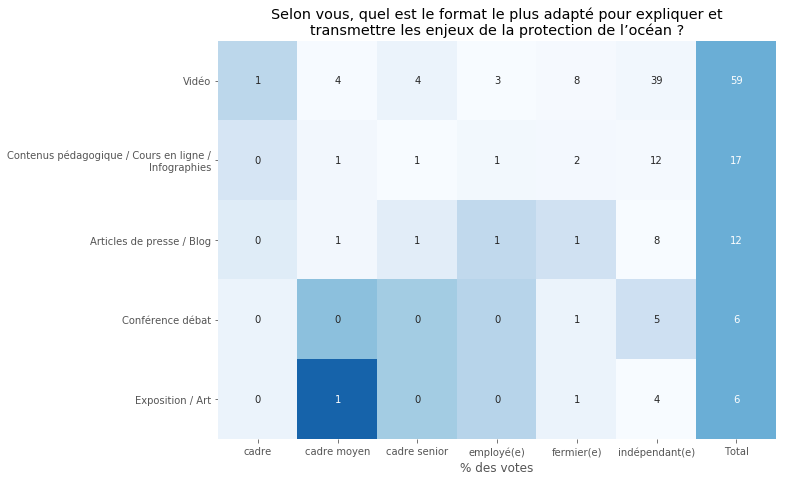

In [328]:
q = 10
plot_khi_2(q, scope)

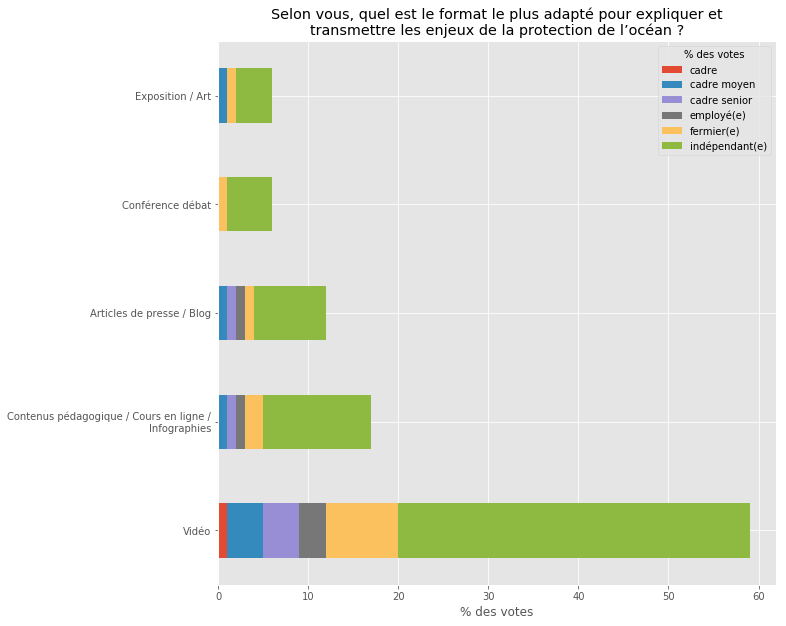

In [329]:
plot_moyenne_pct(q, scope)

## Question 11

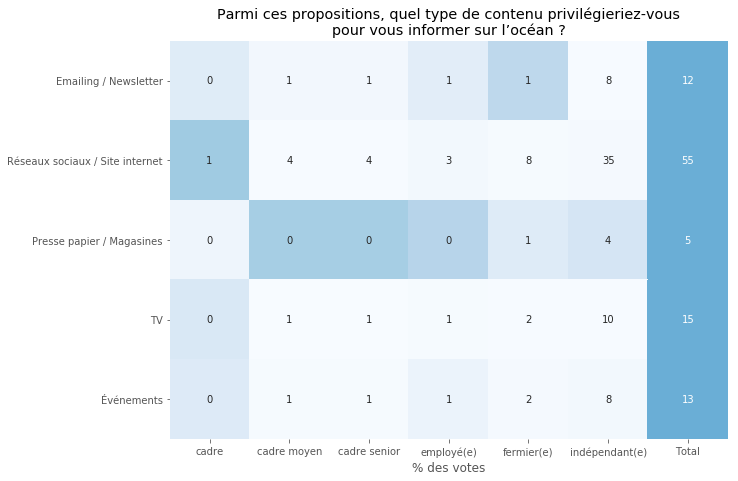

In [330]:
q = 11
plot_khi_2(q, scope)

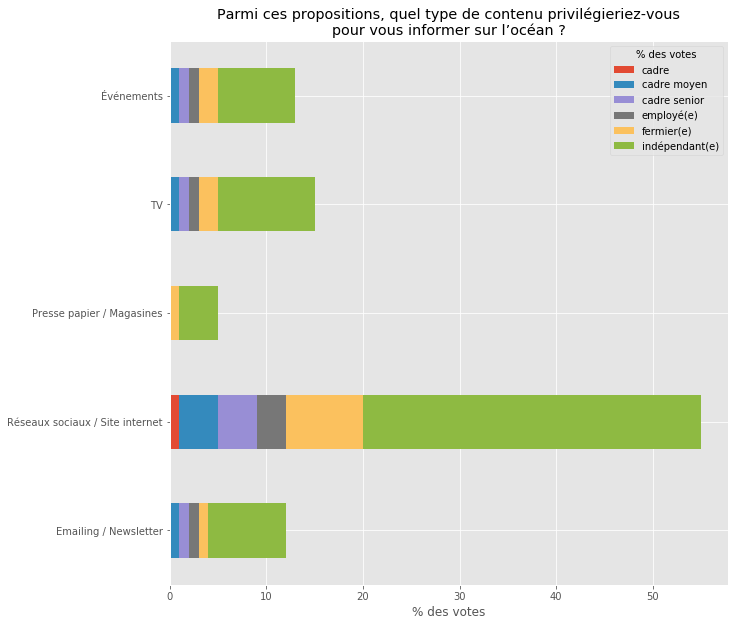

In [331]:
plot_moyenne_pct(q, scope)

## Question 12

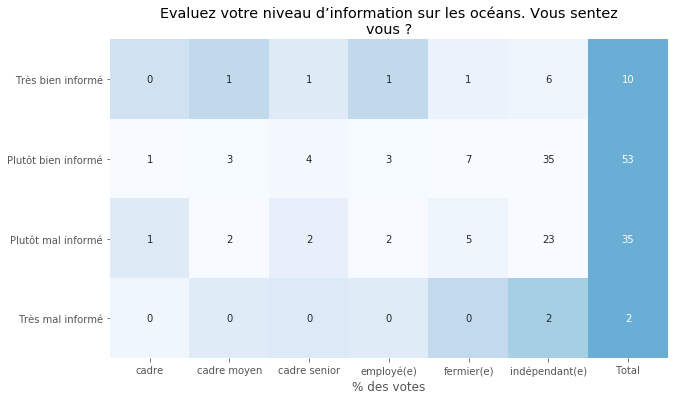

In [332]:
q = 12
plot_khi_2(q, scope)

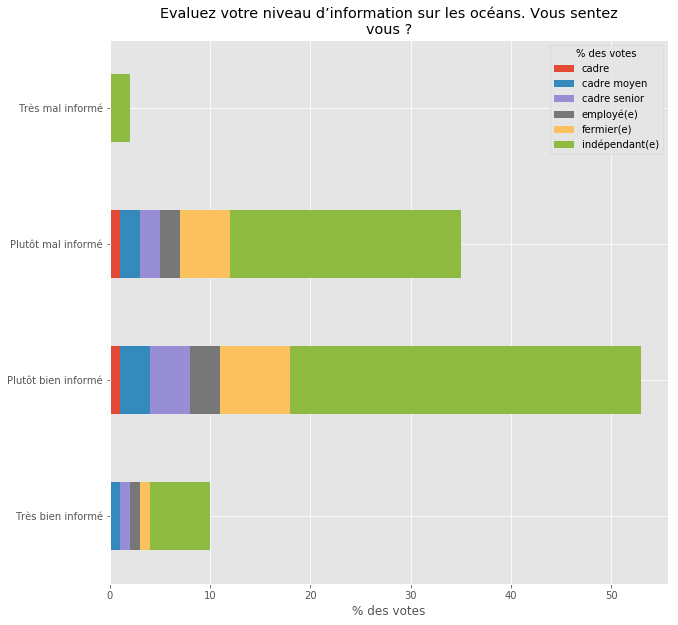

In [333]:
plot_moyenne_pct(q, scope)

## Question 13

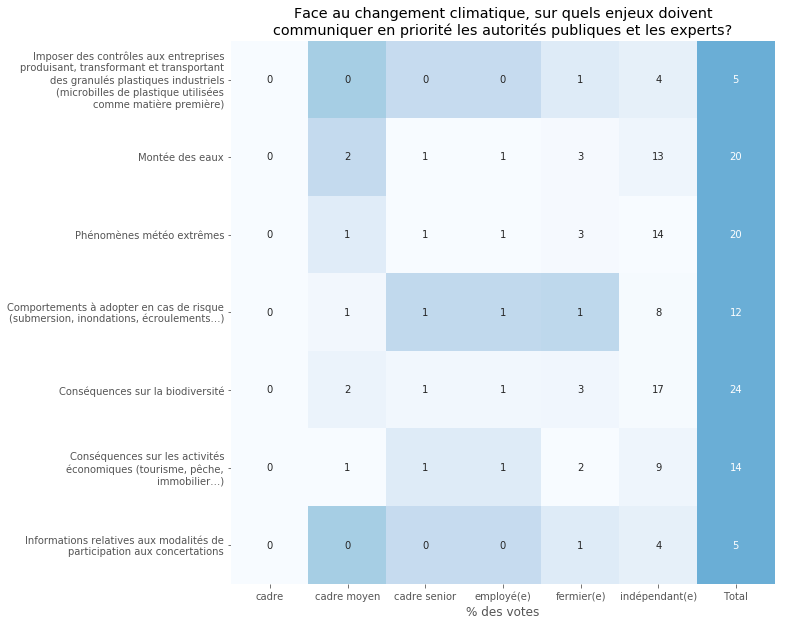

In [334]:
q = 13
plot_khi_2(q, scope)

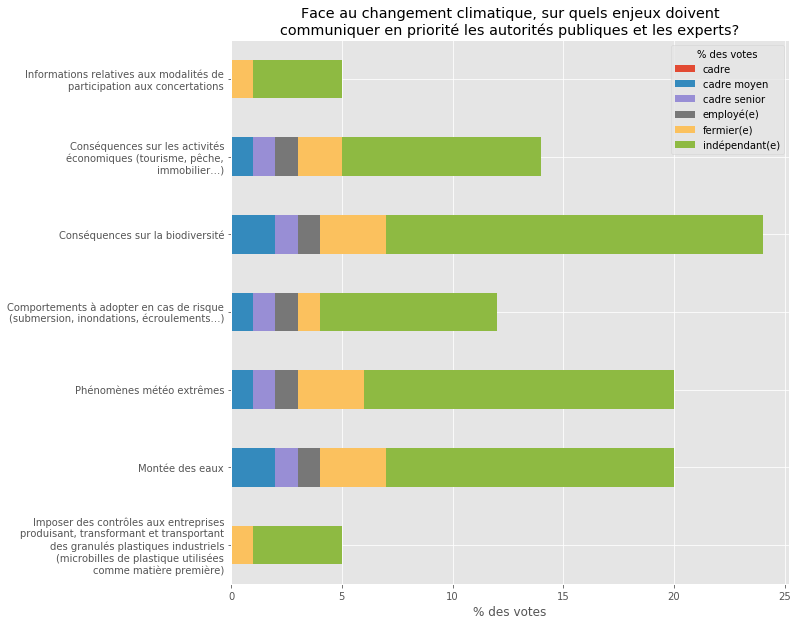

In [335]:
plot_moyenne_pct(q, scope)

## Question 14

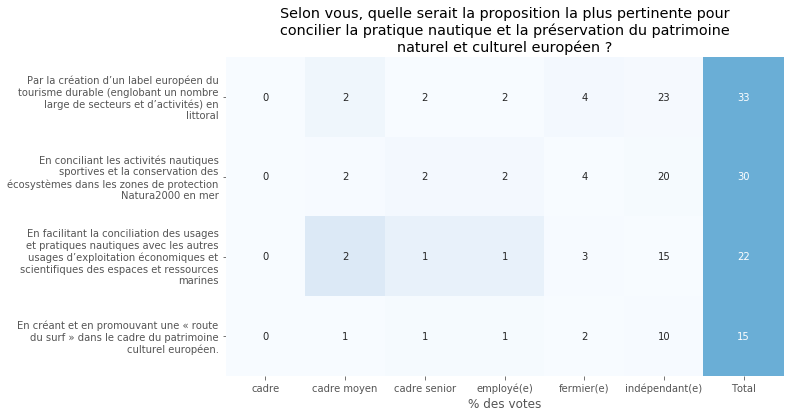

In [336]:
q = 14
plot_khi_2(q, scope)

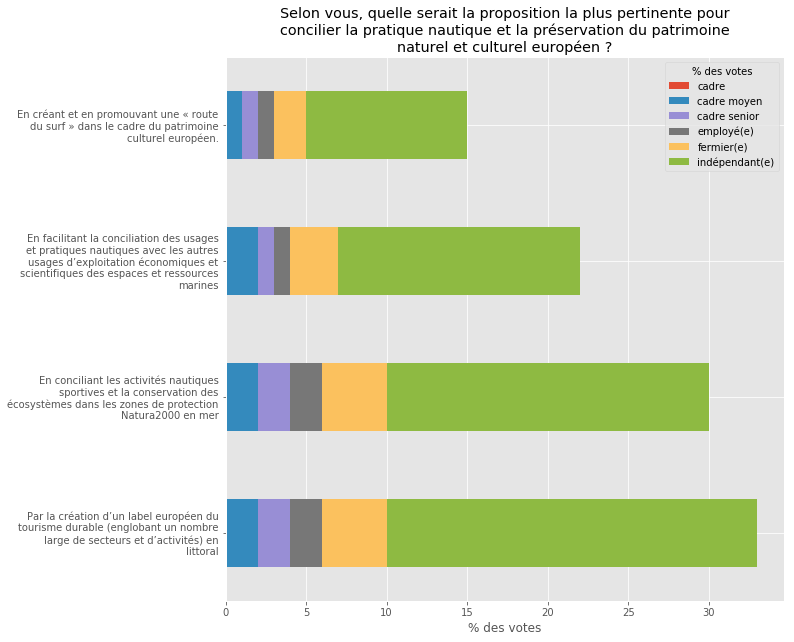

In [337]:
plot_moyenne_pct(q, scope)

# Par implication

In [338]:
scope = "implication"

In [339]:
pd.DataFrame(reponses.groupby(scope).count()["cnt"])

cnt
implication                    
assez intéressé(e)         1238
pas du tout intéressé(e)      3
pas vraiment intéressé(e)    86
très intéressé(e)          5550

## Question 0

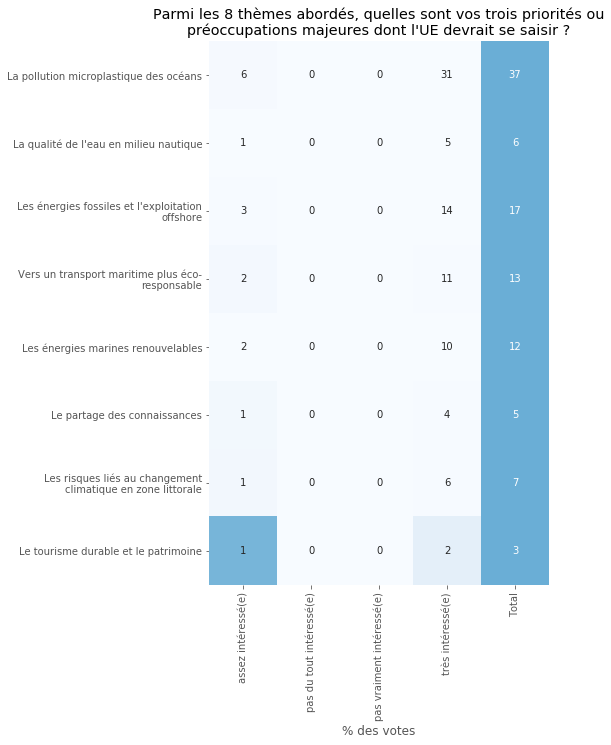

In [340]:
q = 0
plot_khi_2(q, scope)

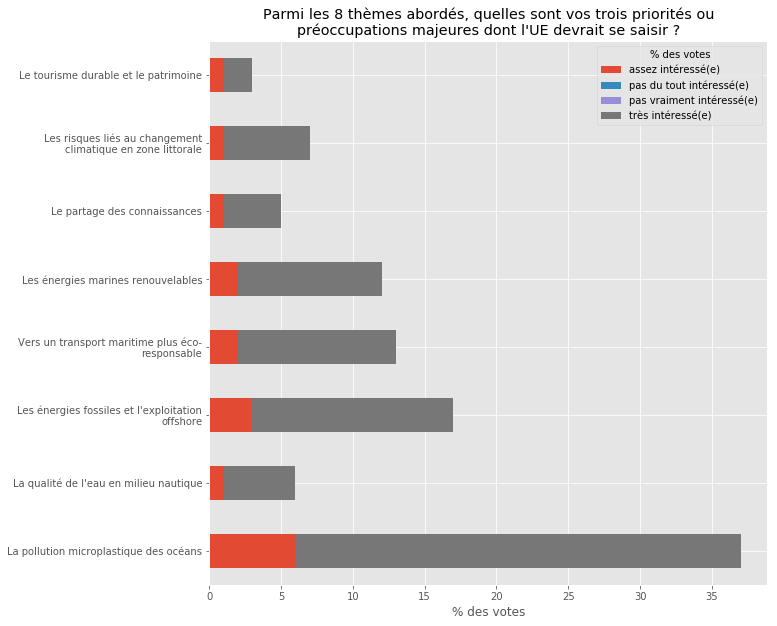

In [341]:
plot_moyenne_pct(q, scope)

## Question 1

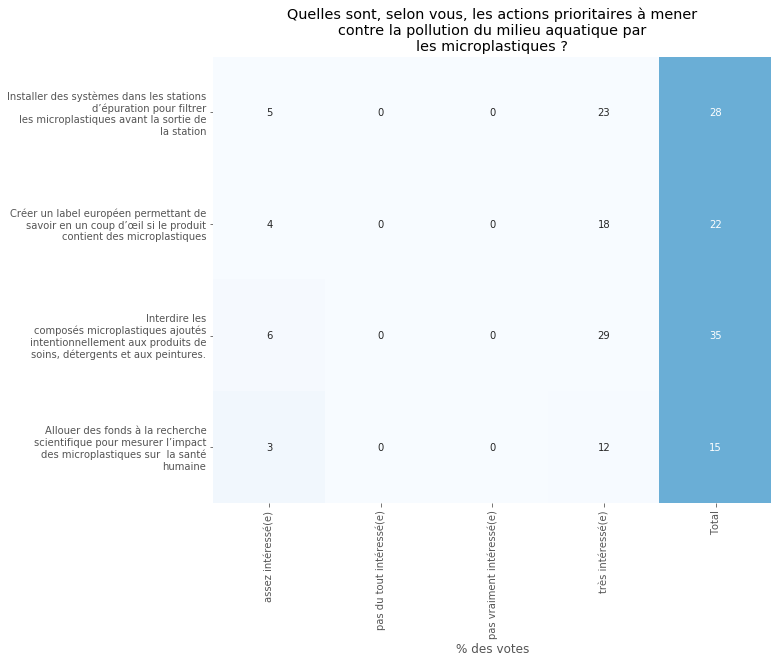

In [342]:
q = 1
plot_khi_2(q, scope)

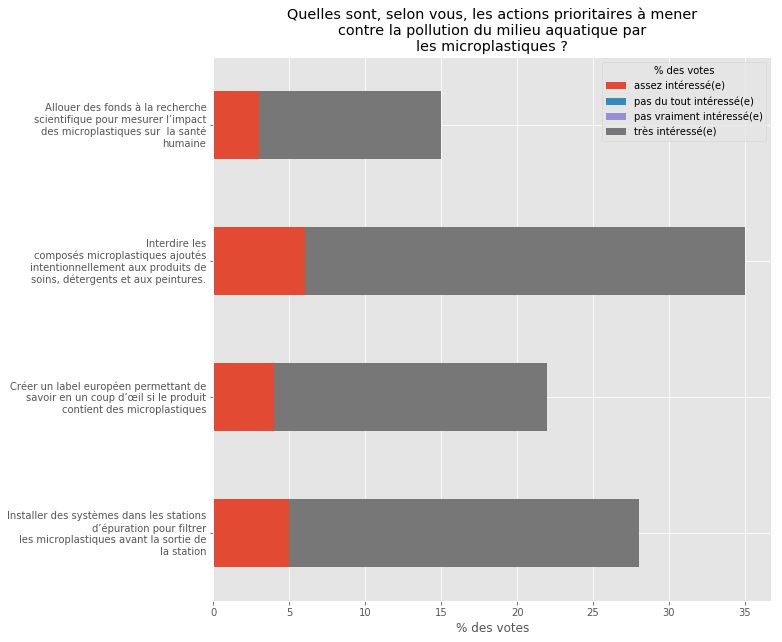

In [343]:
plot_moyenne_pct(q, scope)

## Question 2

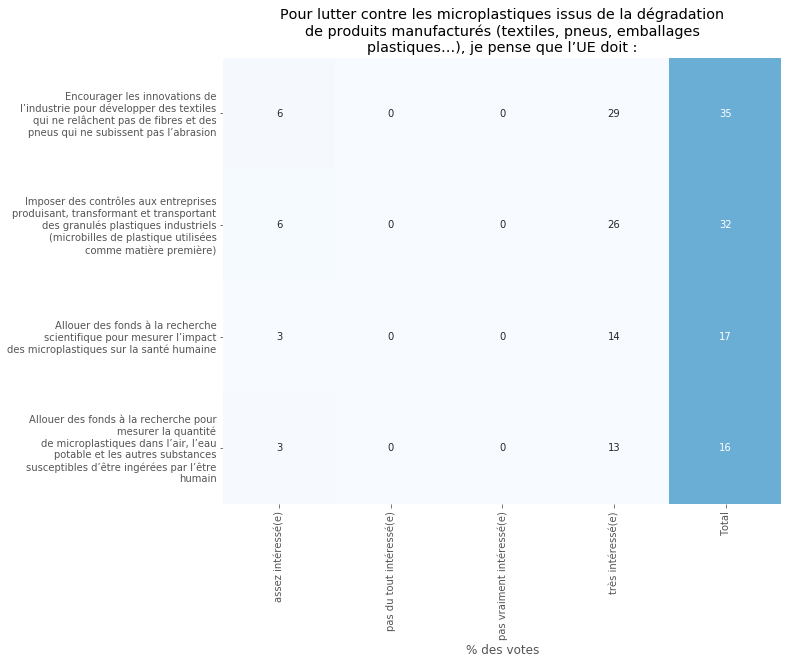

In [344]:
q = 2
plot_khi_2(q, scope)

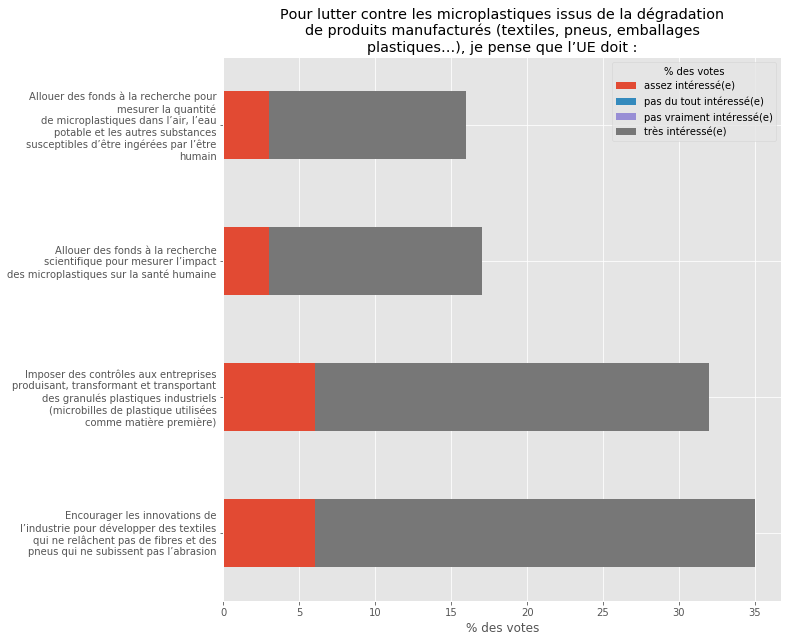

In [345]:
plot_moyenne_pct(q, scope)

## Question 3

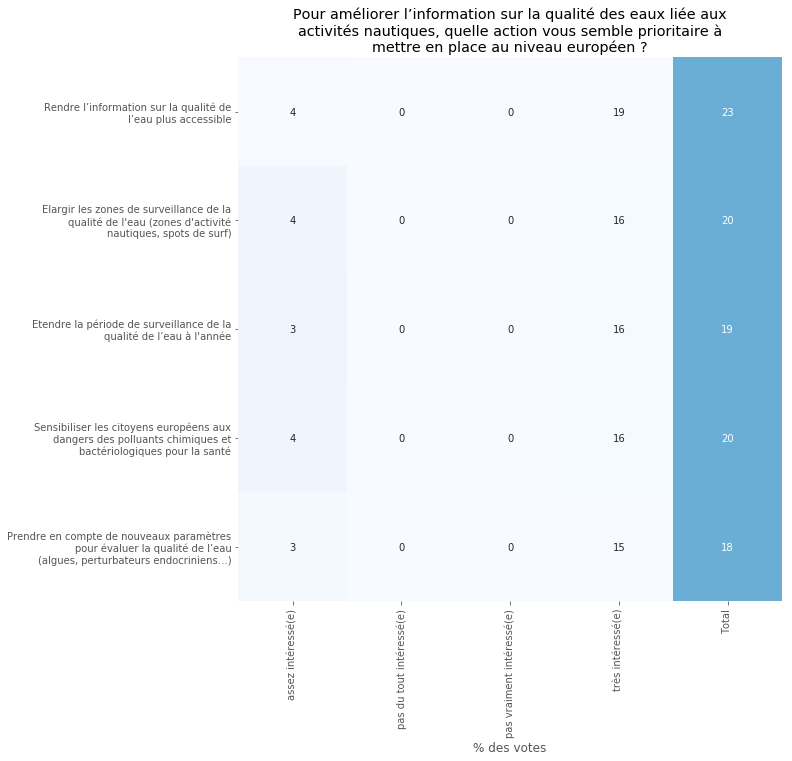

In [346]:
q = 3
plot_khi_2(q, scope)

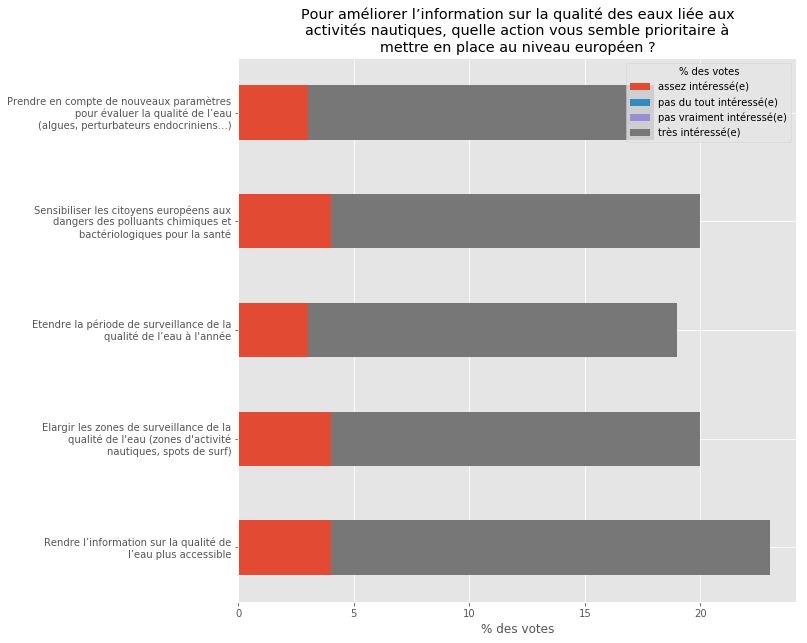

In [347]:
plot_moyenne_pct(q, scope)

## Question 4

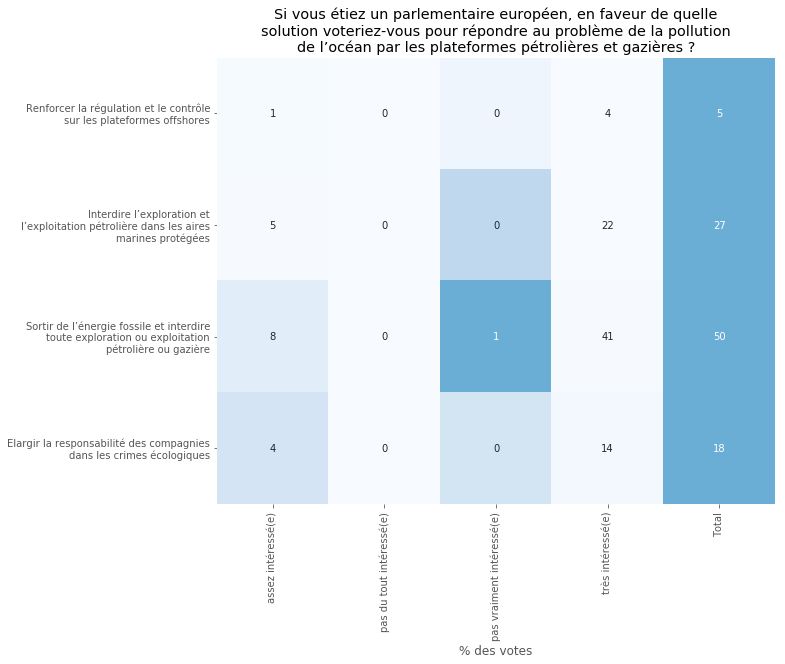

In [348]:
q = 4
plot_khi_2(q, scope)

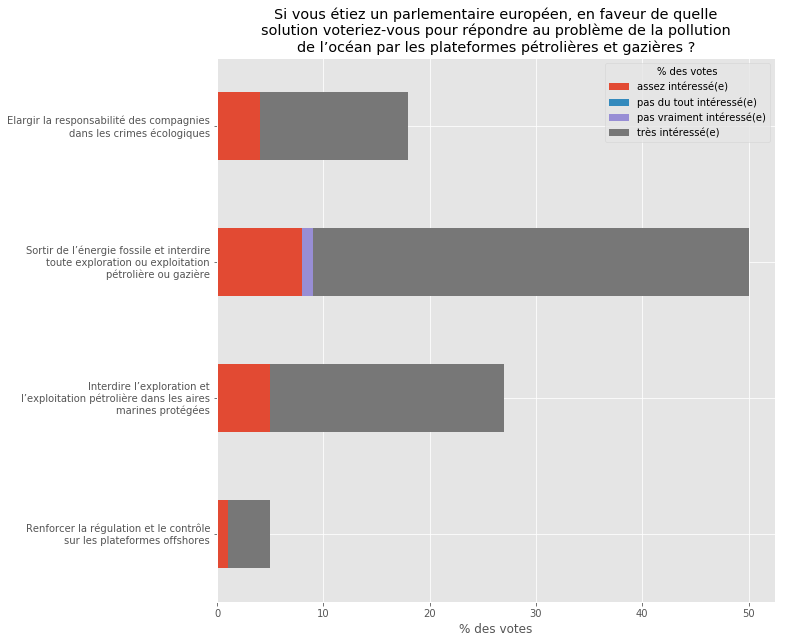

In [349]:
plot_moyenne_pct(q, scope)

## Question 5

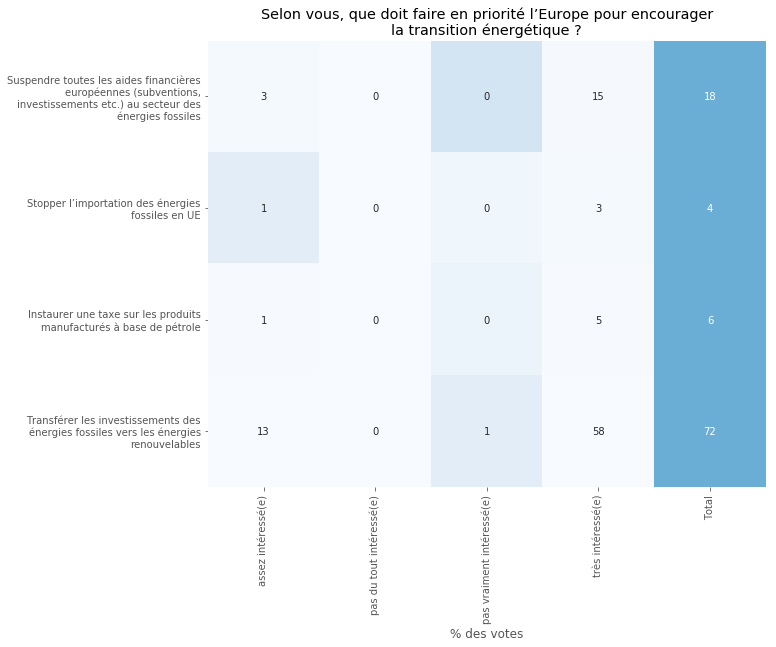

In [350]:
q = 5
plot_khi_2(q, scope)

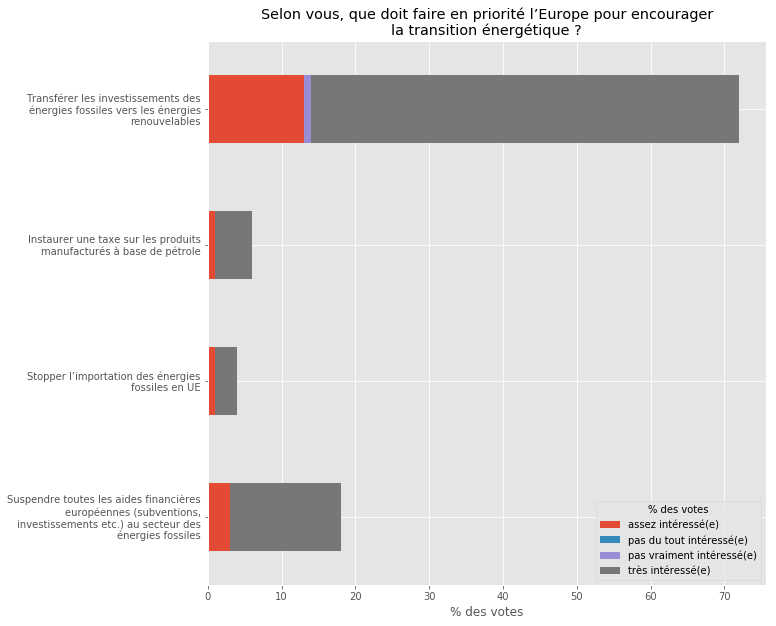

In [351]:
plot_moyenne_pct(q, scope)

## Question 6

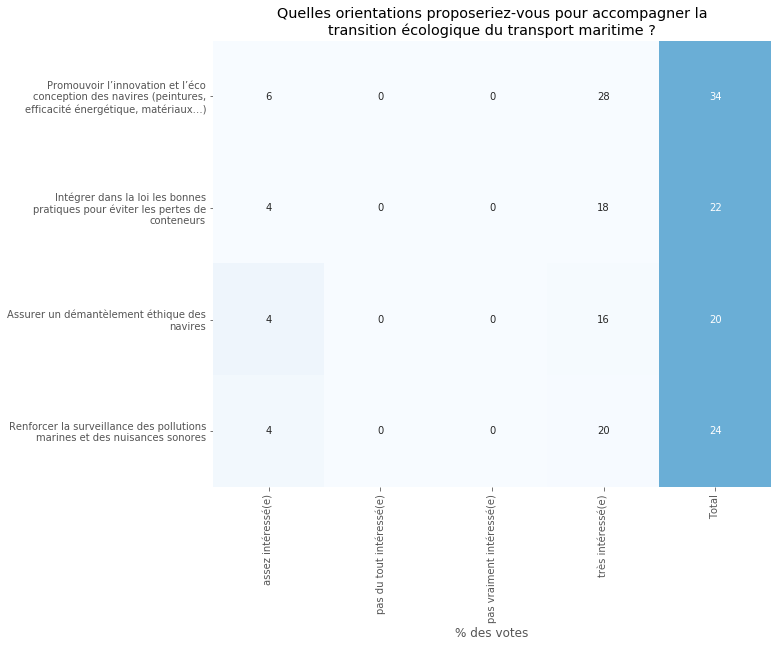

In [352]:
q = 6
plot_khi_2(q, scope)

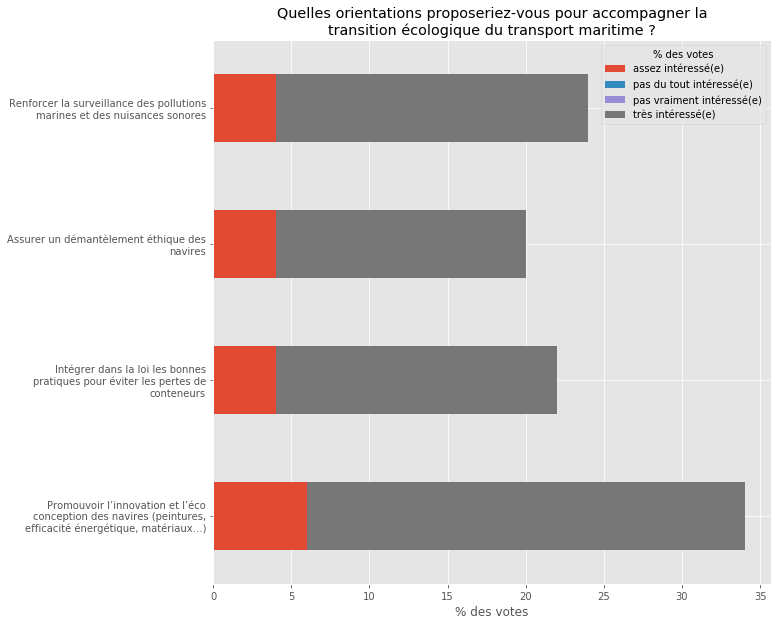

In [353]:
plot_moyenne_pct(q, scope)

## Question 7

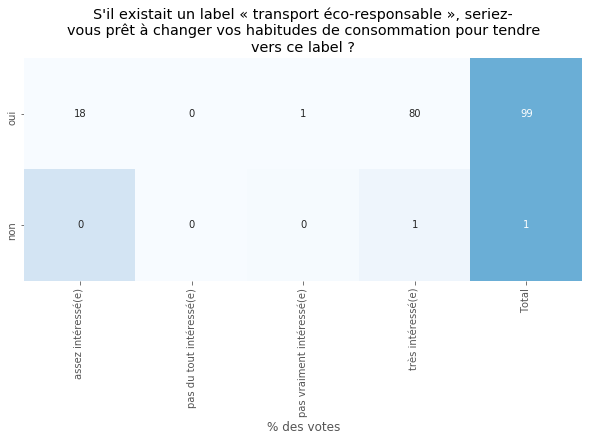

In [354]:
q = 7
plot_khi_2(q, scope)

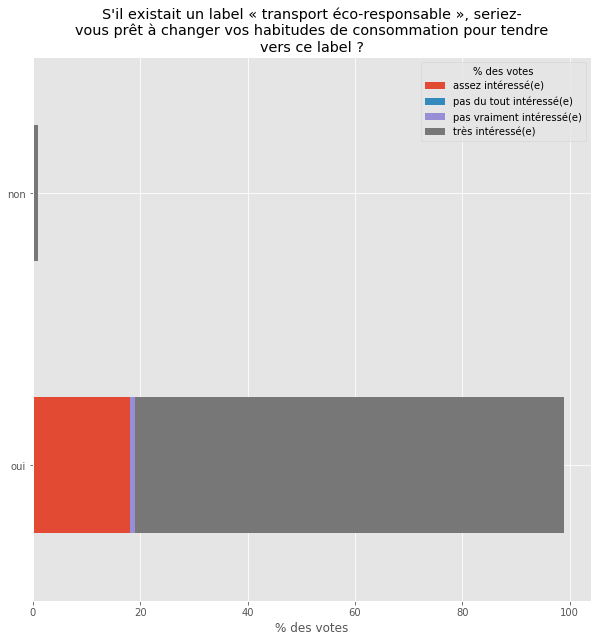

In [355]:
plot_moyenne_pct(q, scope)

## Question 8

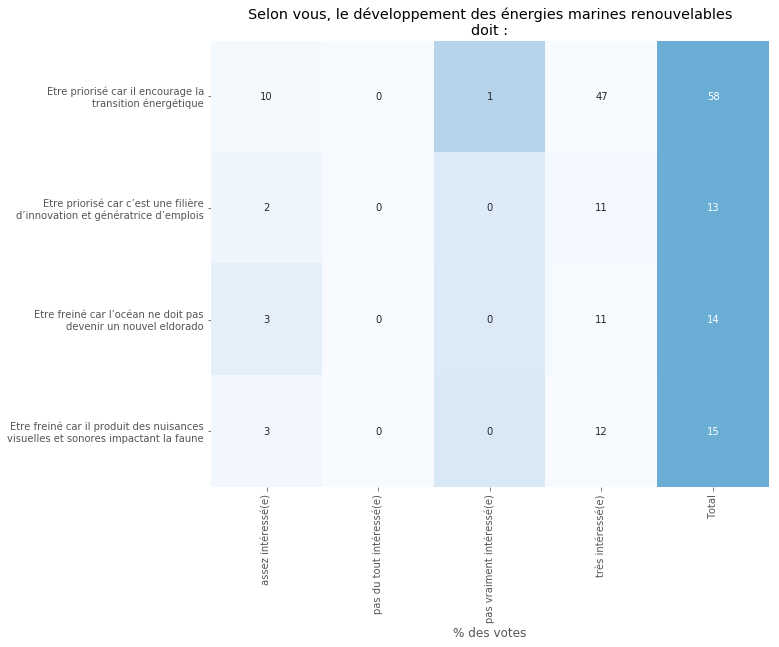

In [356]:
q = 8
plot_khi_2(q, scope)

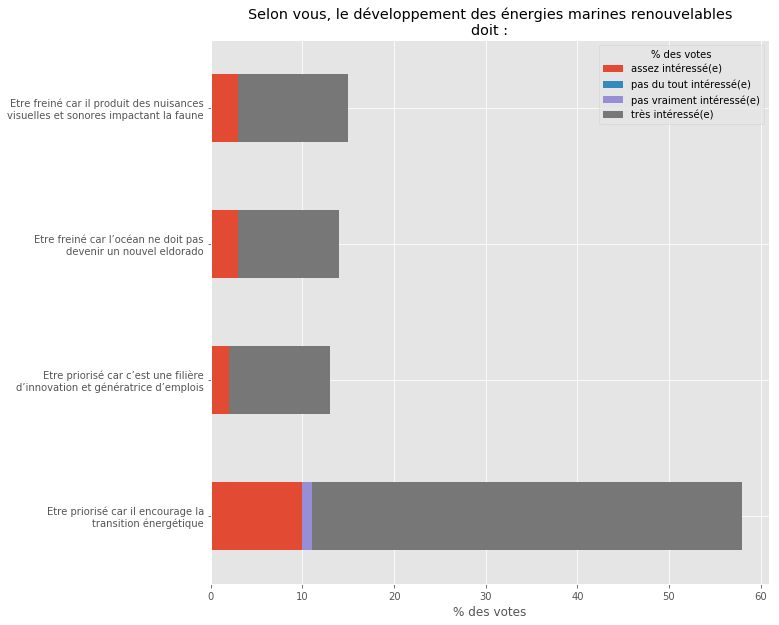

In [357]:
plot_moyenne_pct(q, scope)

## Question 9

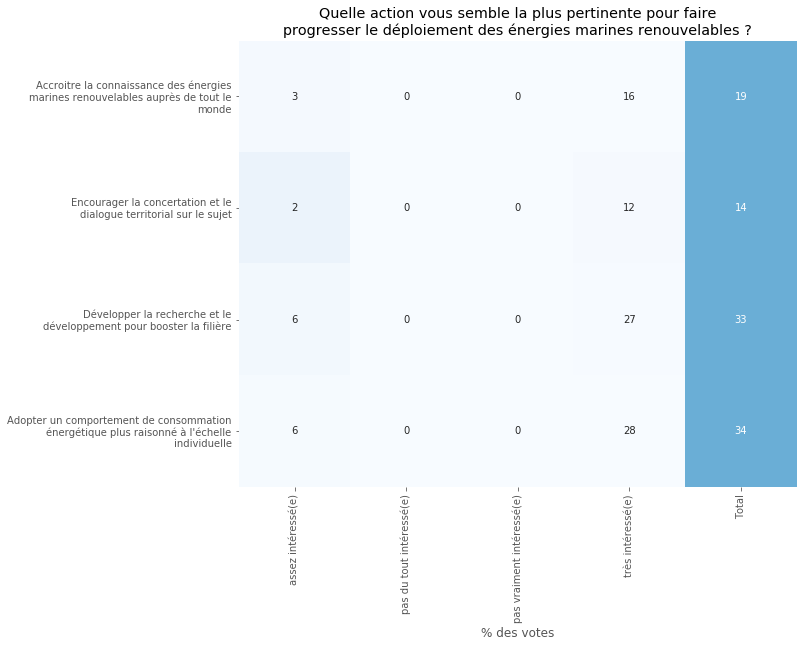

In [358]:
q = 9
plot_khi_2(q, scope)

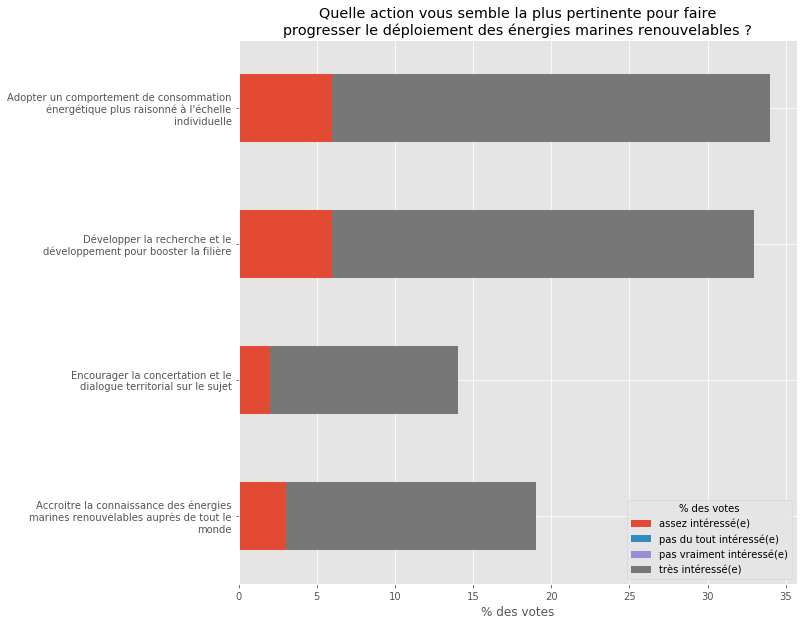

In [359]:
plot_moyenne_pct(q, scope)

## Question 10

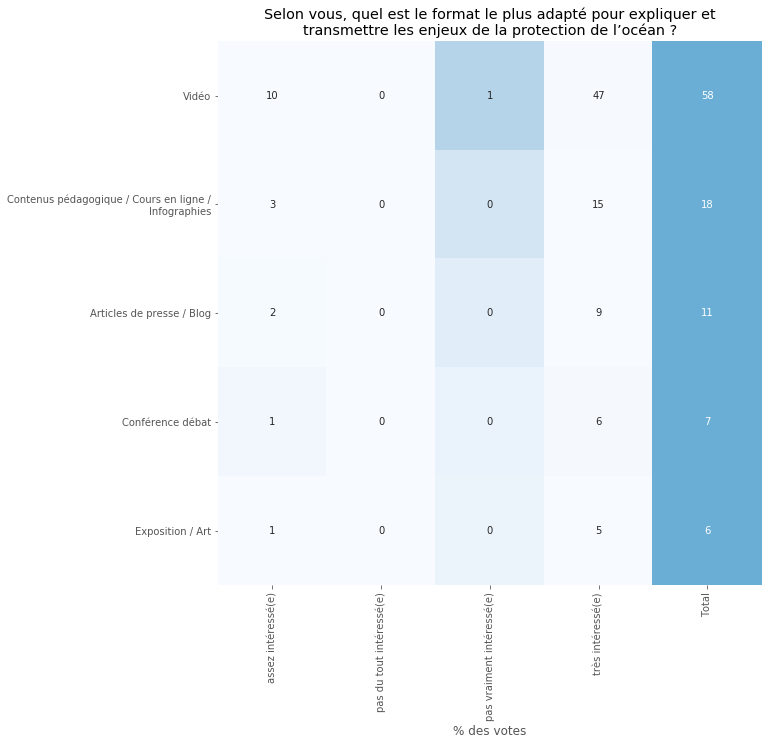

In [360]:
q = 10
plot_khi_2(q, scope)

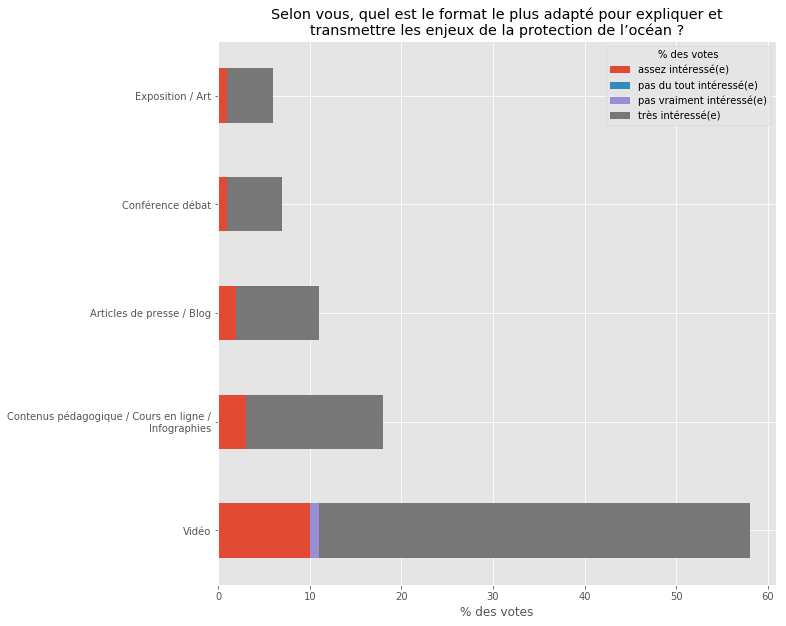

In [361]:
plot_moyenne_pct(q, scope)

## Question 11

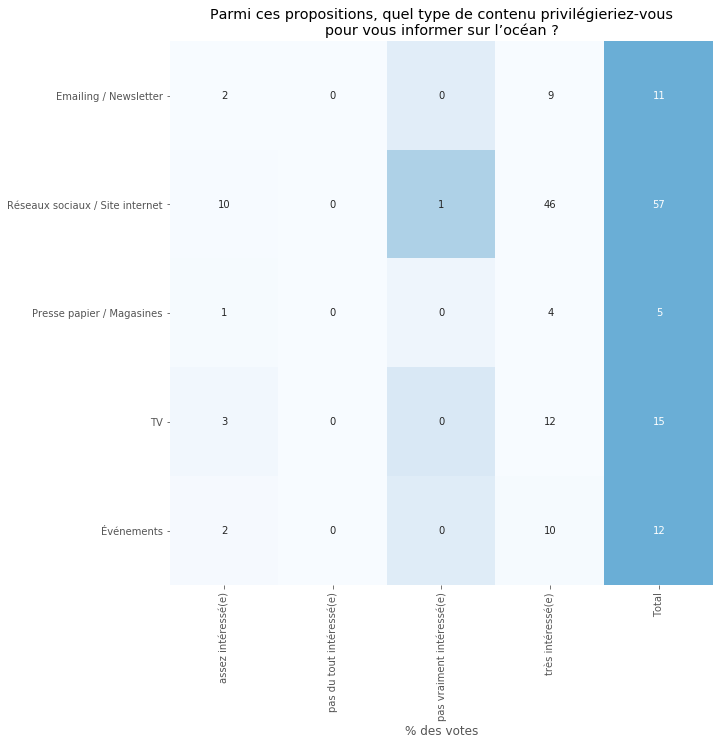

In [362]:
q = 11
plot_khi_2(q, scope)

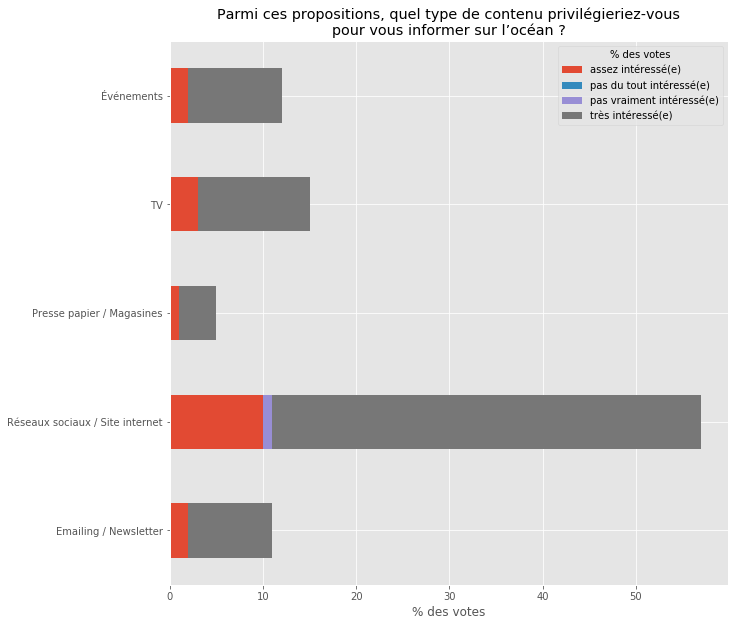

In [363]:
plot_moyenne_pct(q, scope)

## Question 12

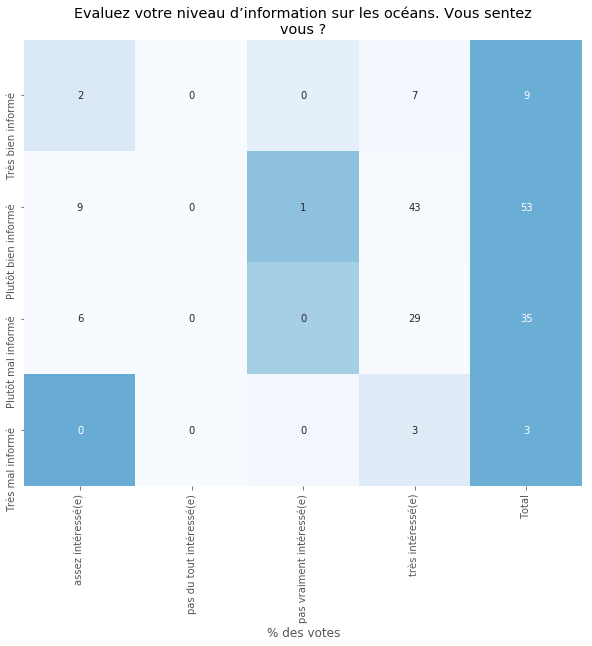

In [364]:
q = 12
plot_khi_2(q, scope)

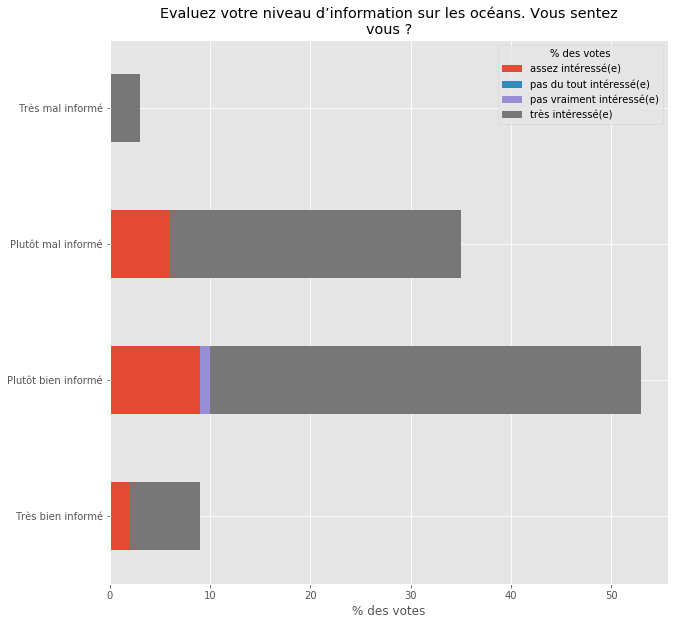

In [365]:
plot_moyenne_pct(q, scope)

## Question 13

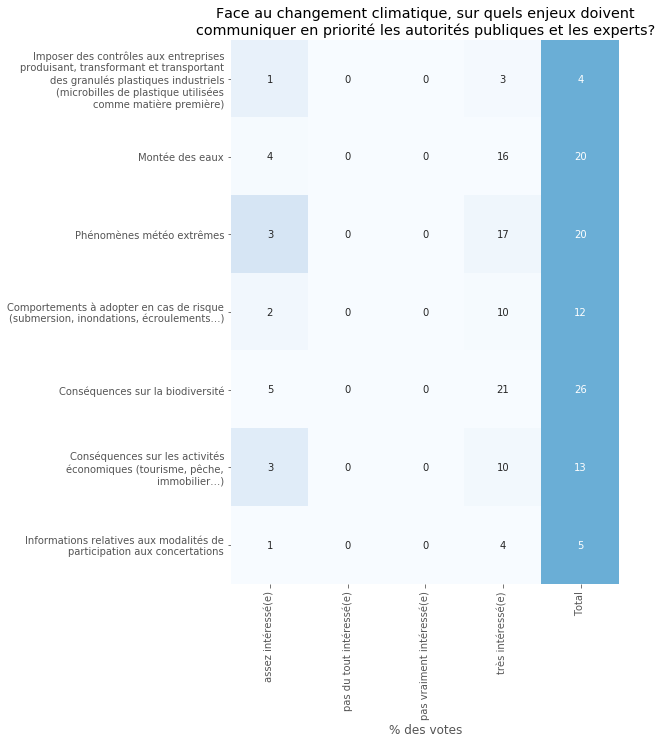

In [366]:
q = 13
plot_khi_2(q, scope)

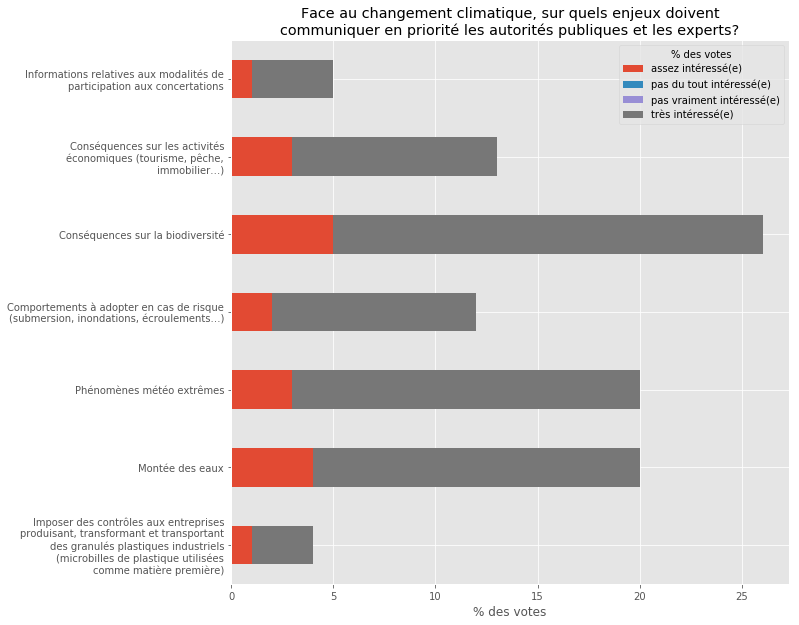

In [367]:
plot_moyenne_pct(q, scope)

## Question 14

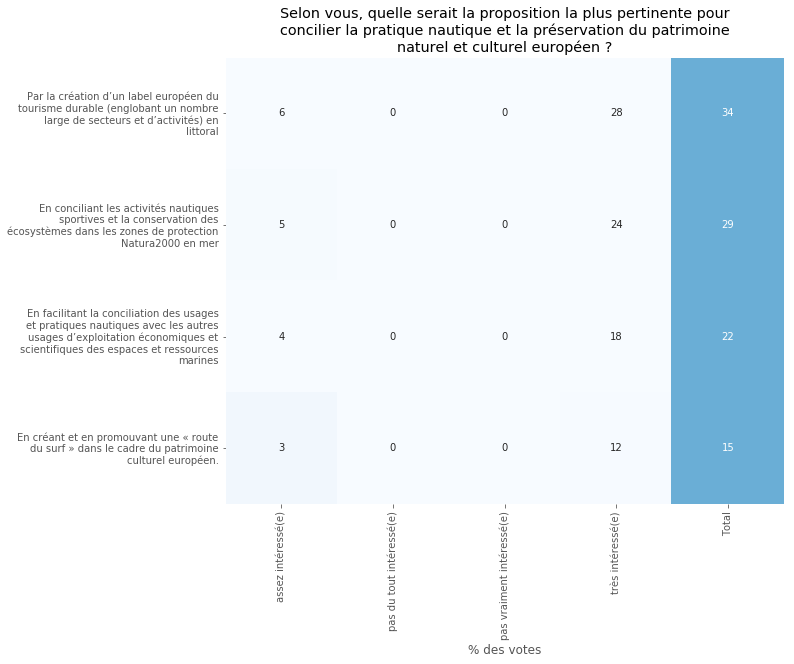

In [368]:
q = 14
plot_khi_2(q, scope)

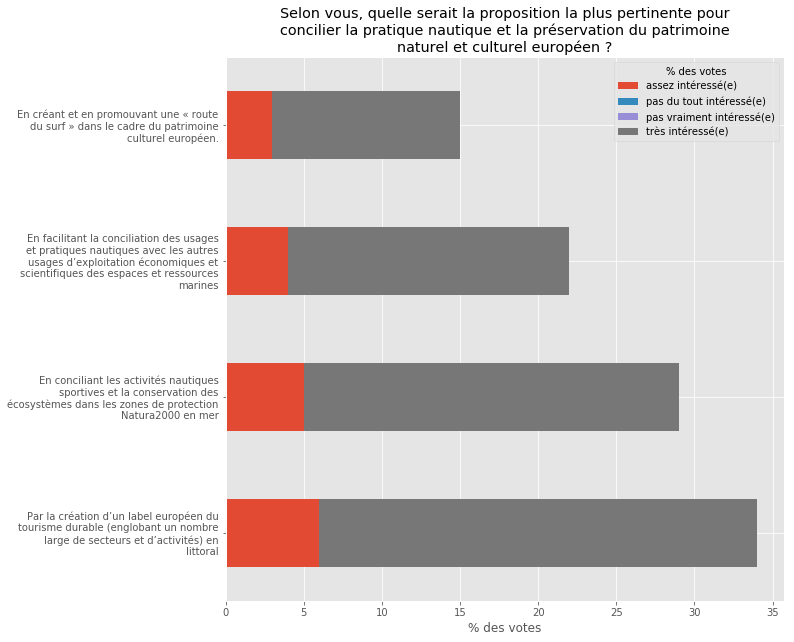

In [369]:
plot_moyenne_pct(q, scope)

# Par pays/continent

In [370]:
scope = "pays"

In [371]:
reponses.groupby("pays").count()["cnt"]

pays
AFG         4
ALA         1
ARG         1
ARM         1
AUS         2
AUT         8
AZE         1
BEL       144
BEN         2
BGR       101
BRA         3
CAN        25
CHE        41
CIV         1
COL         1
CYP         3
DEU       122
DNK         8
DZA         1
ESP       226
FIN         3
FRA      5453
GBR        59
GIB         1
GRC         5
HRV         1
HUN         1
IND         1
IOT         1
IRL        18
ITA        56
KEN         1
LKA         1
LUX         5
MAR         3
MCO         5
MDA         1
MEX         1
MOZ         2
NLD        31
NOR         9
NZL         3
PAN         1
PER         1
PHL         1
PRT       375
ROU         6
RUS         1
SEN         2
SGP         1
SRB         1
SVN         6
SWE         9
TUR         2
UKR         2
USA        18
WORLD       9
ZAF         1
nan        84
Name: cnt, dtype: int64

In [372]:
# On ne conserve que les pays ayant eu plus de 100 votes, les autres seront classés dans WORLD
selected = ["BGR","DEU","BEL","ESP","PRT","FRA"]
reponses["pays"] = reponses["pays"].apply(lambda row: row if row in selected else "WORLD")

In [373]:

pd.DataFrame(reponses.groupby(scope).count()["cnt"])

cnt
pays       
BEL     144
BGR     101
DEU     122
ESP     226
FRA    5453
PRT     375
WORLD   456

## Question 0

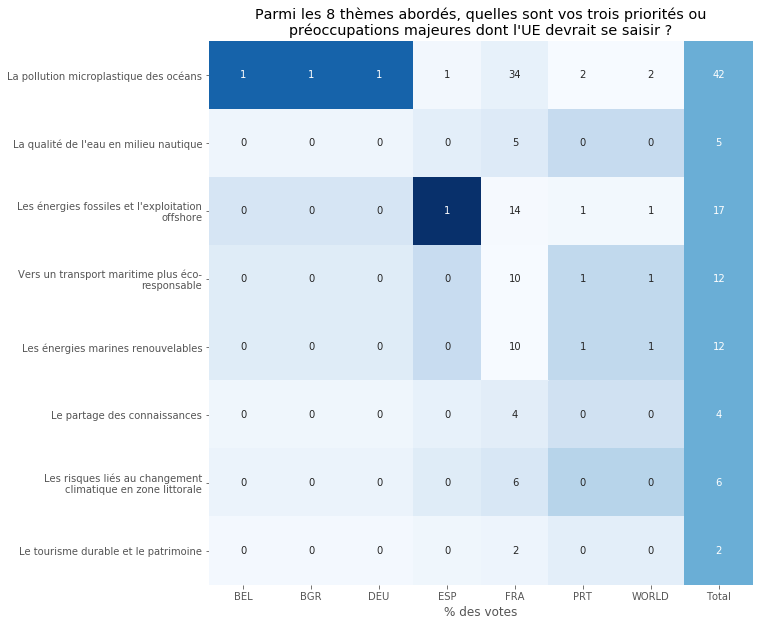

In [374]:
q = 0
plot_khi_2(q, scope)

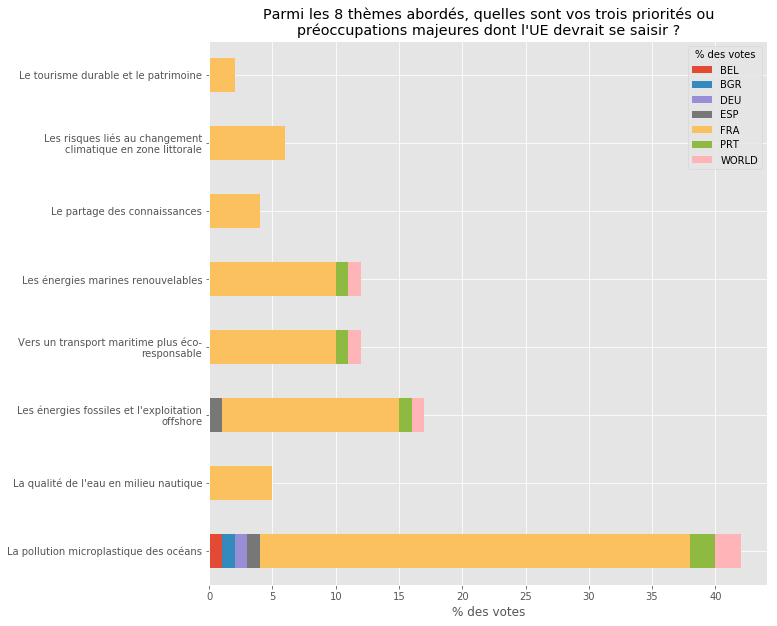

In [375]:
plot_moyenne_pct(q, scope)

## Question 1

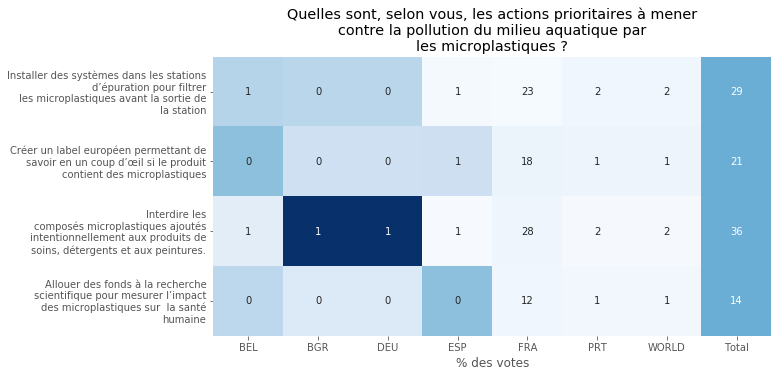

In [376]:
q = 1
plot_khi_2(q, scope)

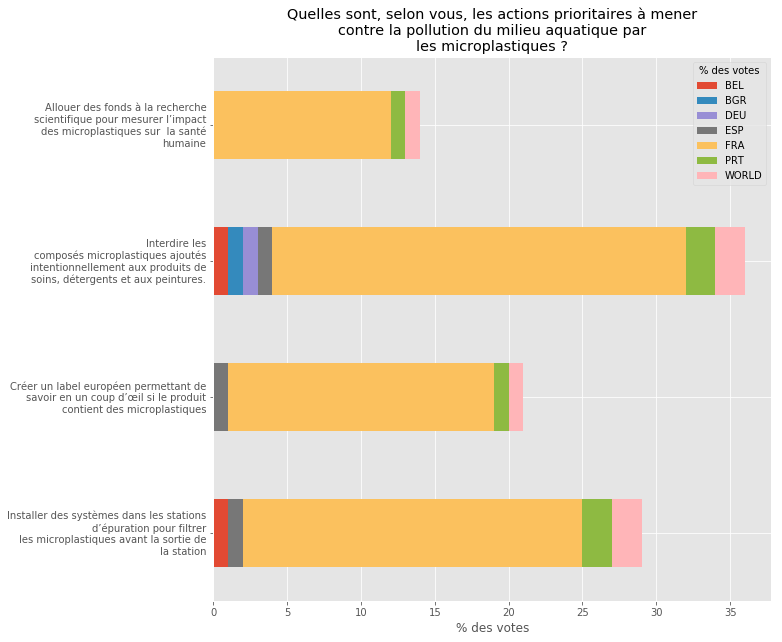

In [377]:
plot_moyenne_pct(q, scope)

## Question 2

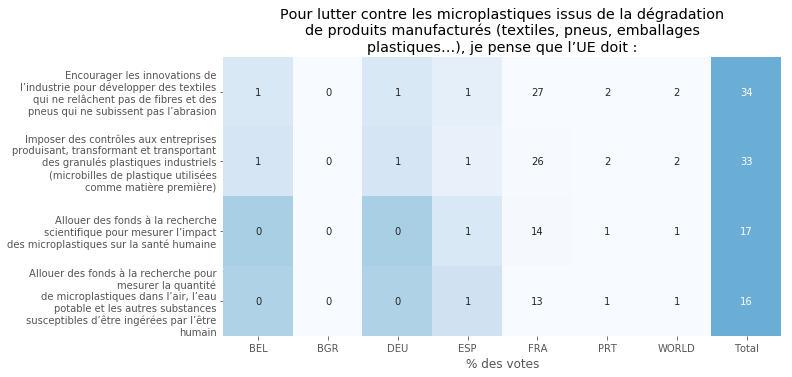

In [378]:
q = 2
plot_khi_2(q, scope)

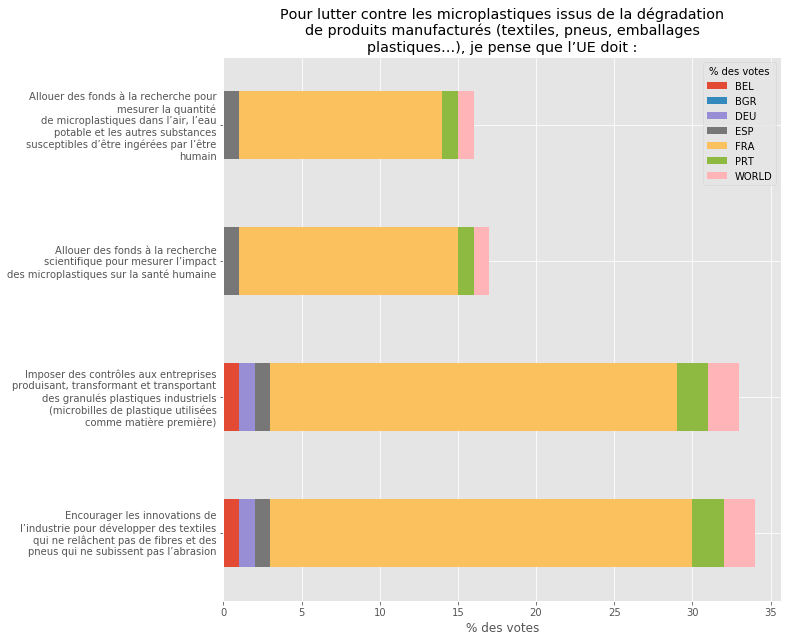

In [379]:
plot_moyenne_pct(q, scope)

## Question 3

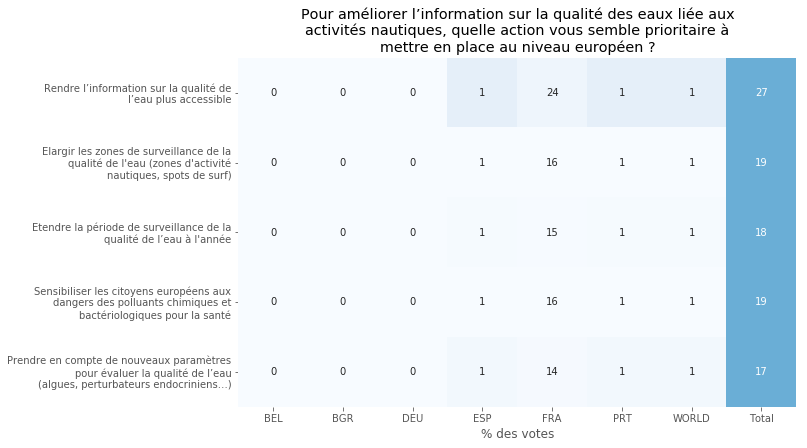

In [380]:
q = 3
plot_khi_2(q, scope)

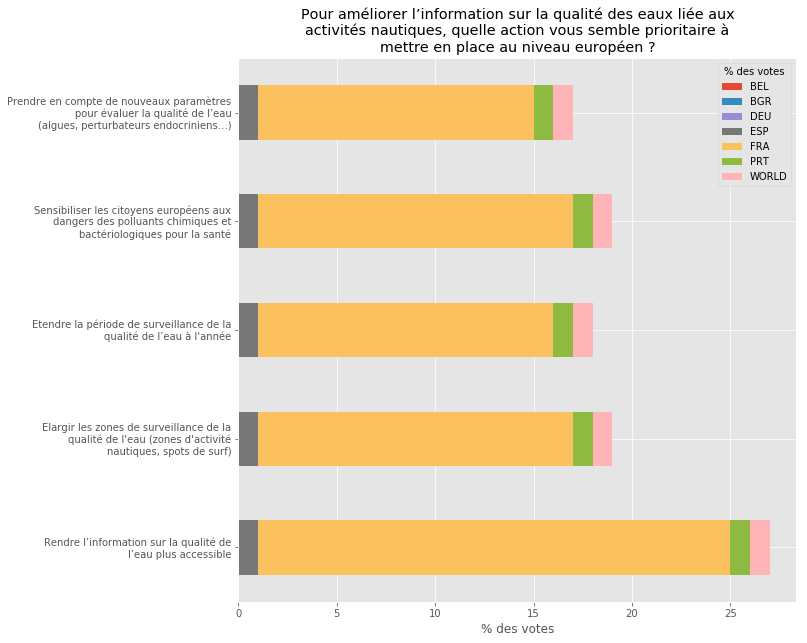

In [381]:
plot_moyenne_pct(q, scope)

## Question 4

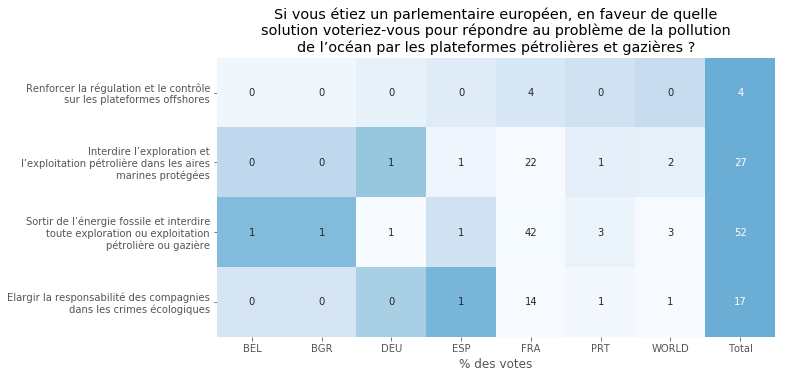

In [382]:
q = 4
plot_khi_2(q, scope)

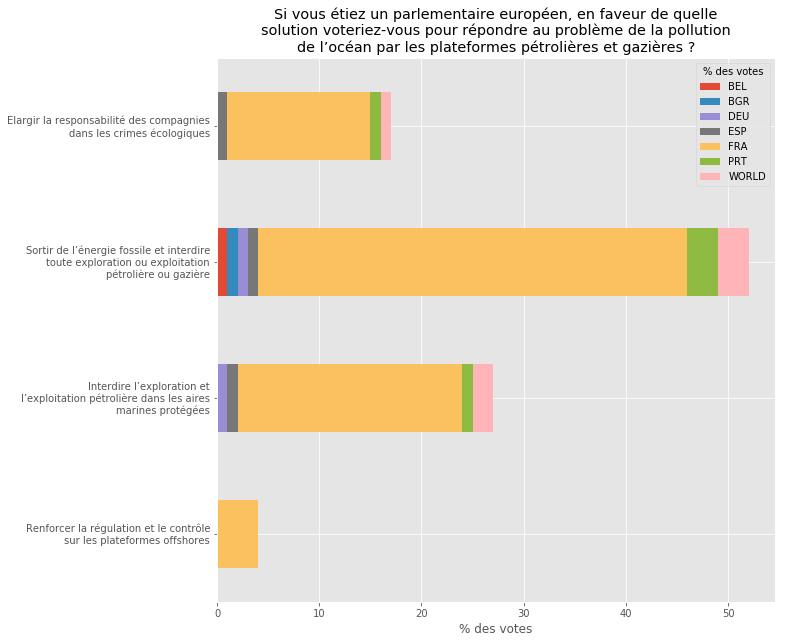

In [383]:
plot_moyenne_pct(q, scope)

## Question 5

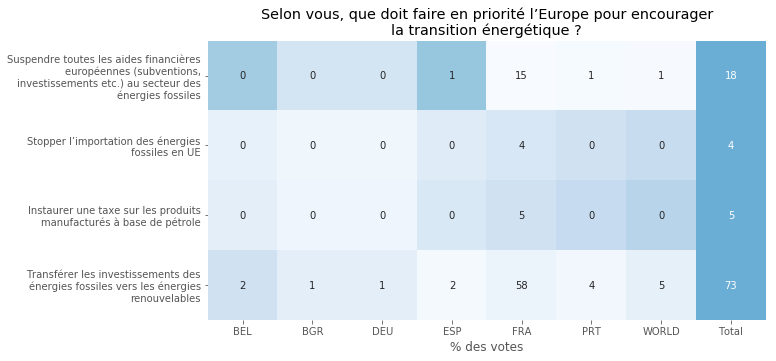

In [384]:
q = 5
plot_khi_2(q, scope)

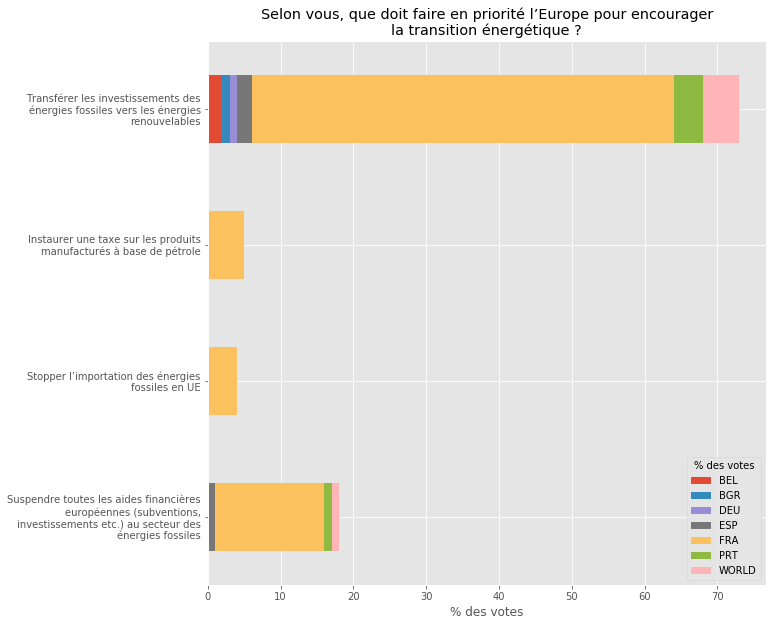

In [385]:
plot_moyenne_pct(q, scope)

## Question 6

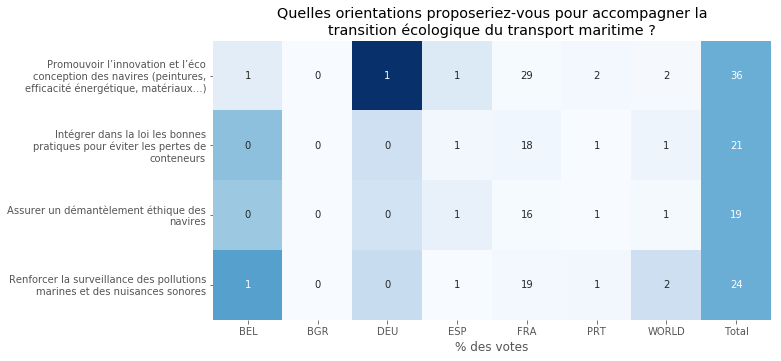

In [386]:
q = 6
plot_khi_2(q, scope)

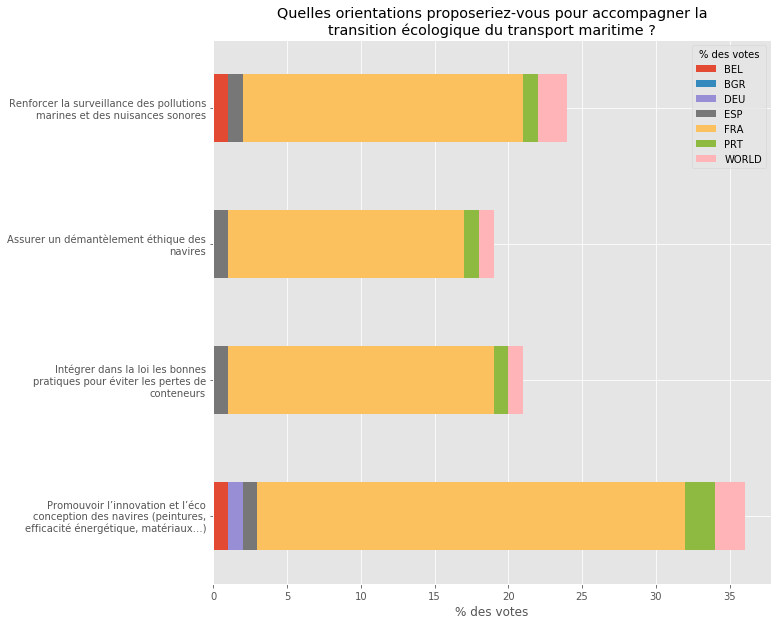

In [387]:
plot_moyenne_pct(q, scope)

## Question 7

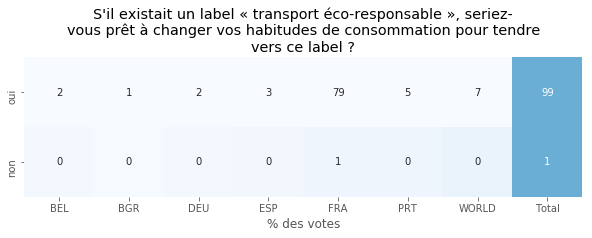

In [388]:
q = 7
plot_khi_2(q, scope)

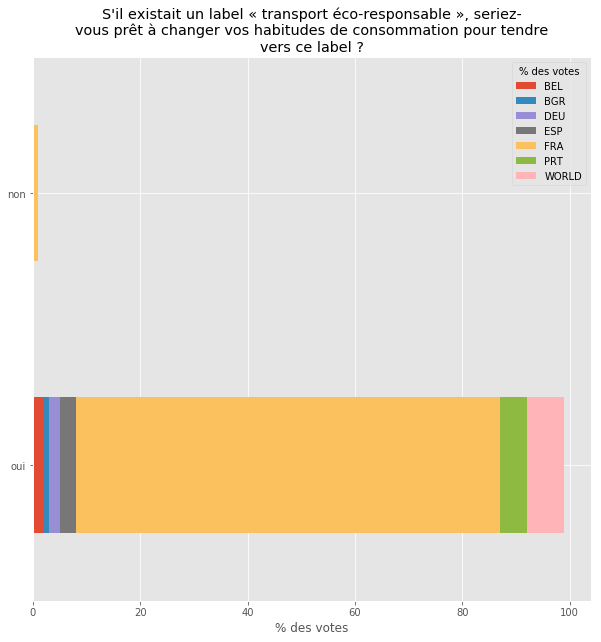

In [389]:
plot_moyenne_pct(q, scope)

## Question 8

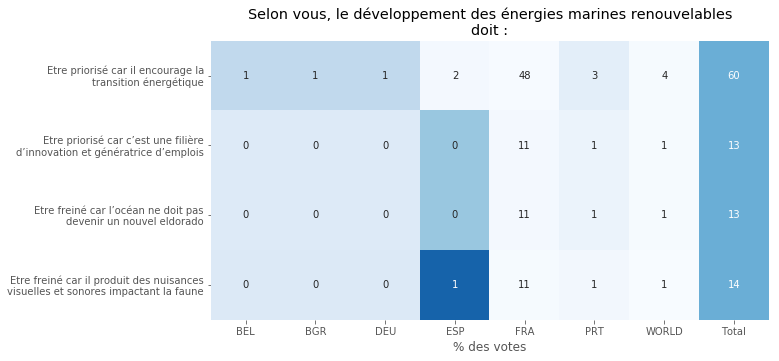

In [390]:
q = 8
plot_khi_2(q, scope)

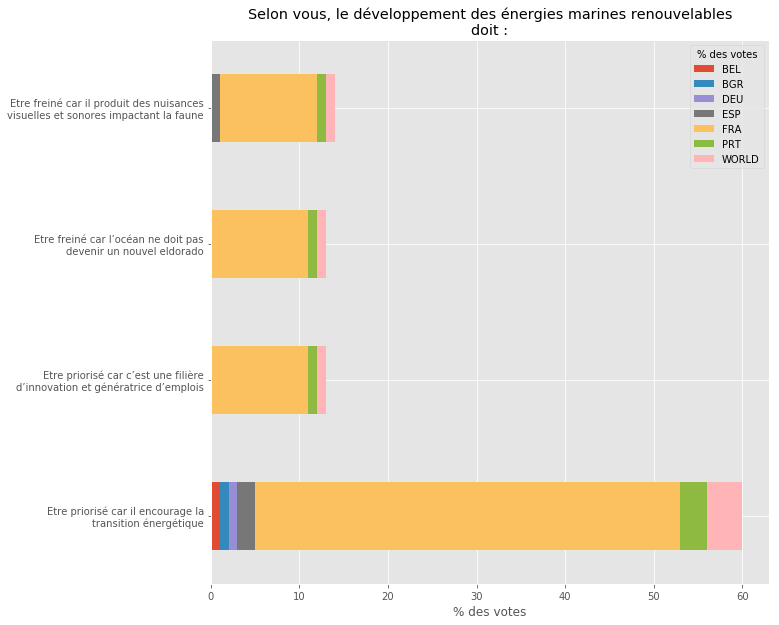

In [391]:
plot_moyenne_pct(q, scope)

## Question 9

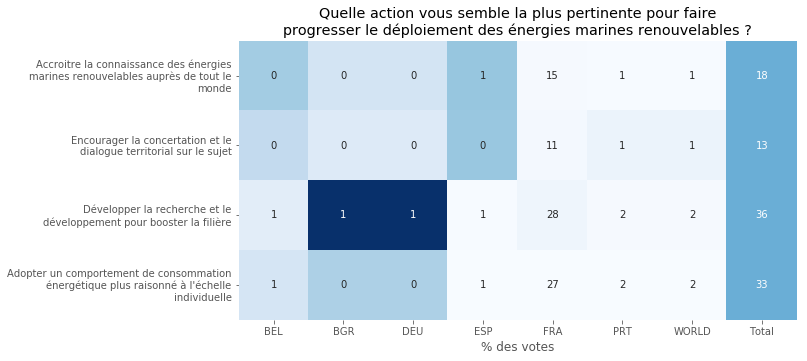

In [392]:
q = 9
plot_khi_2(q, scope)

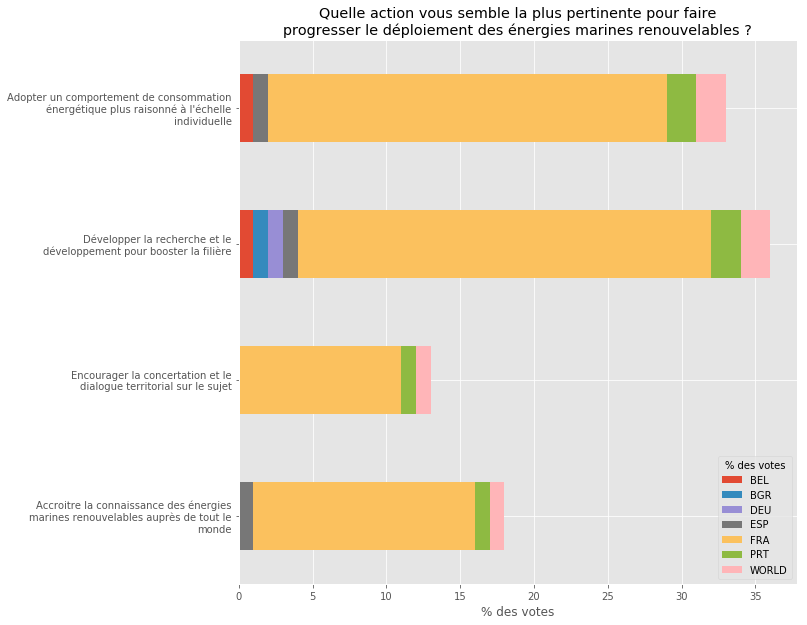

In [393]:
plot_moyenne_pct(q, scope)

## Question 10

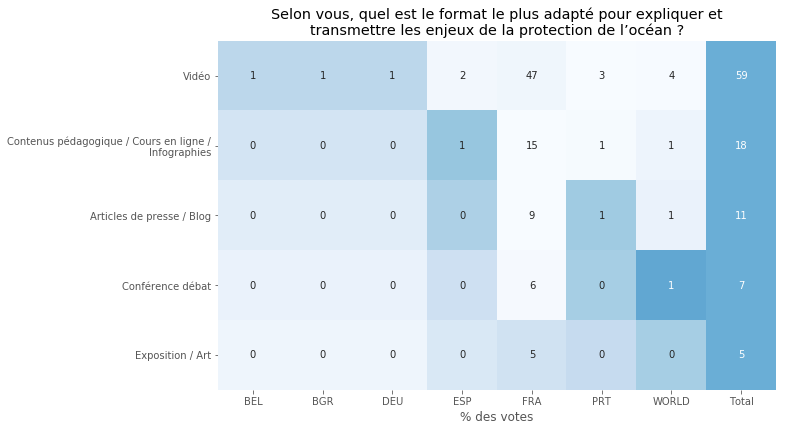

In [394]:
q = 10
plot_khi_2(q, scope)

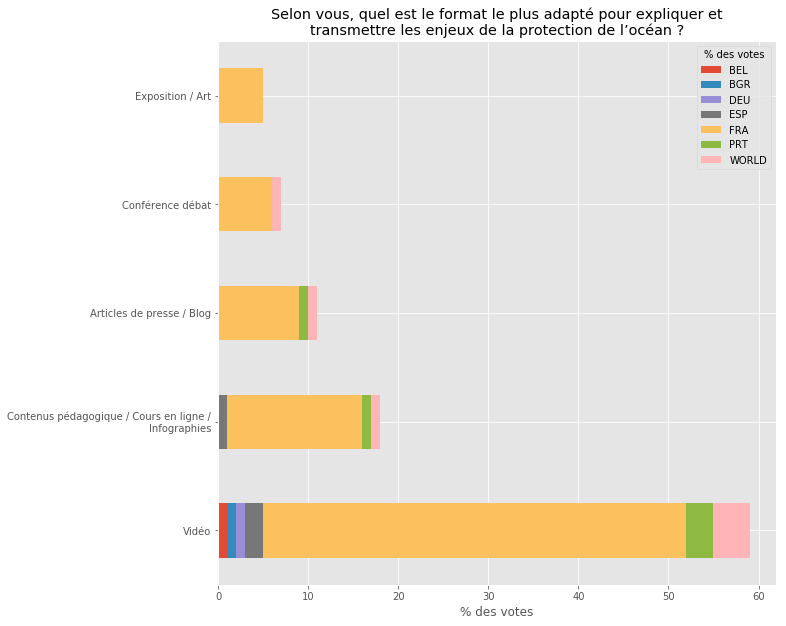

In [395]:
plot_moyenne_pct(q, scope)

## Question 11

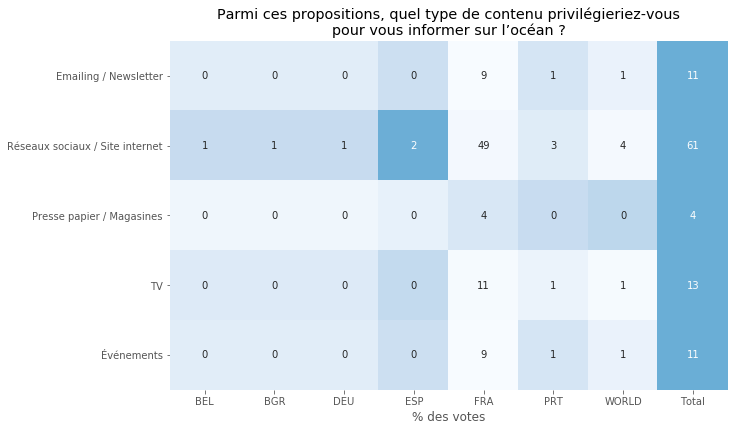

In [396]:
q = 11
plot_khi_2(q, scope)

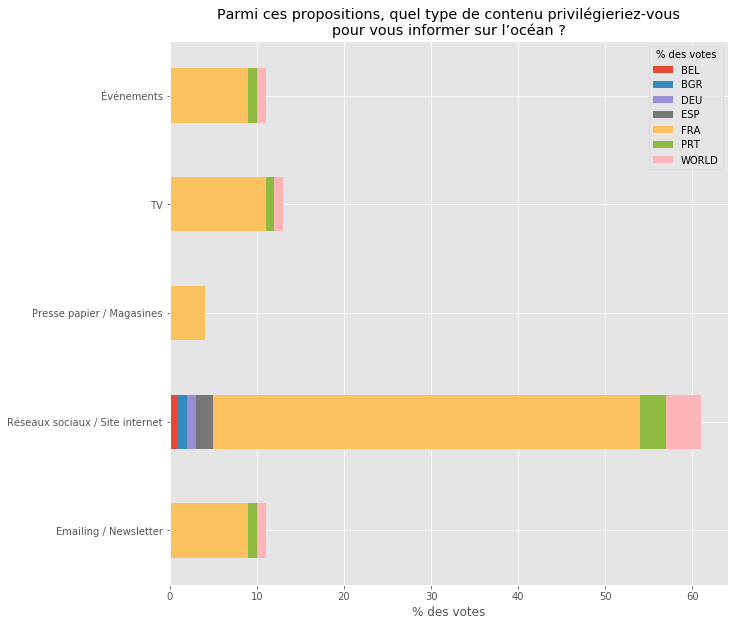

In [397]:
plot_moyenne_pct(q, scope)

## Question 12

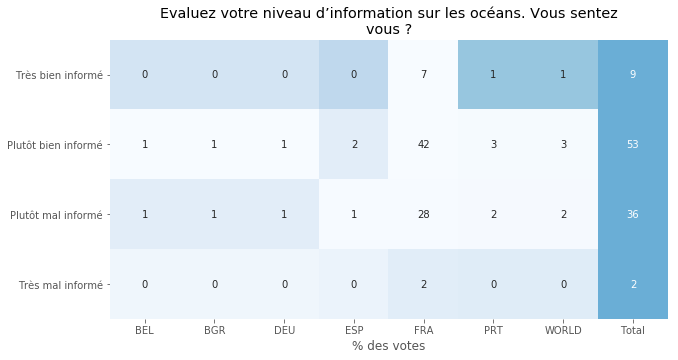

In [398]:
q = 12
plot_khi_2(q, scope)

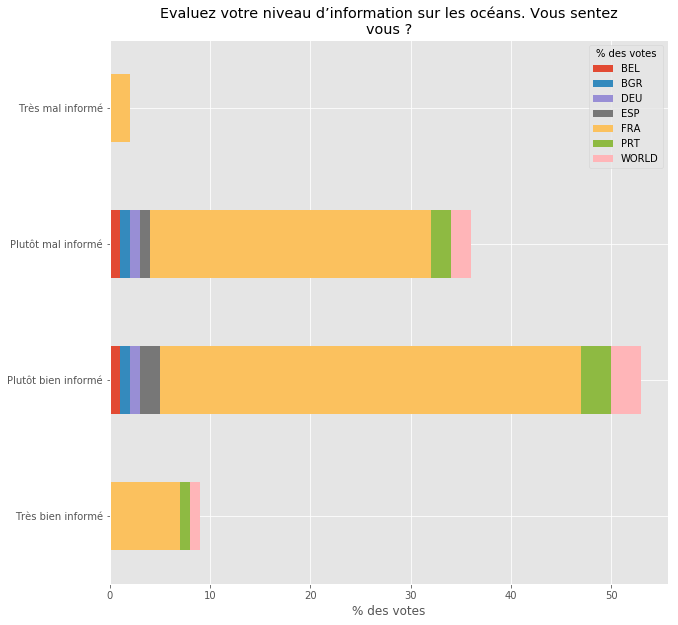

In [399]:
plot_moyenne_pct(q, scope)

## Question 13

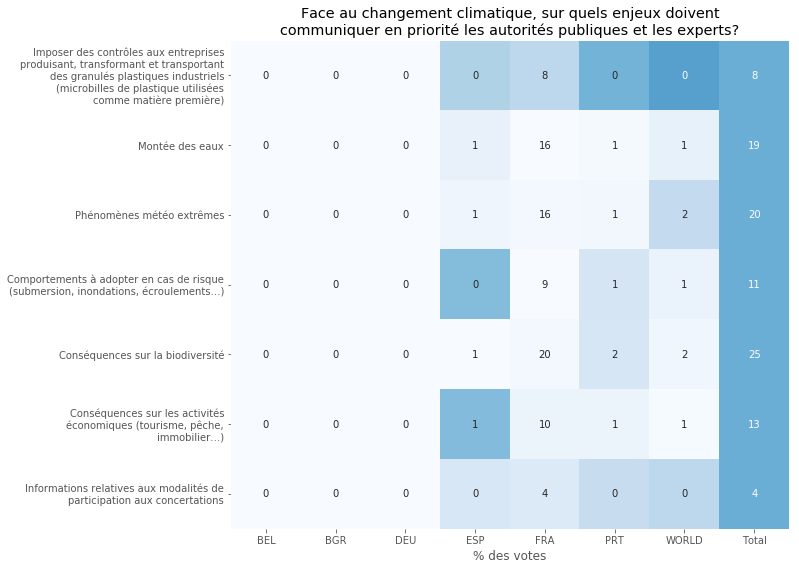

In [400]:
q = 13
plot_khi_2(q, scope)

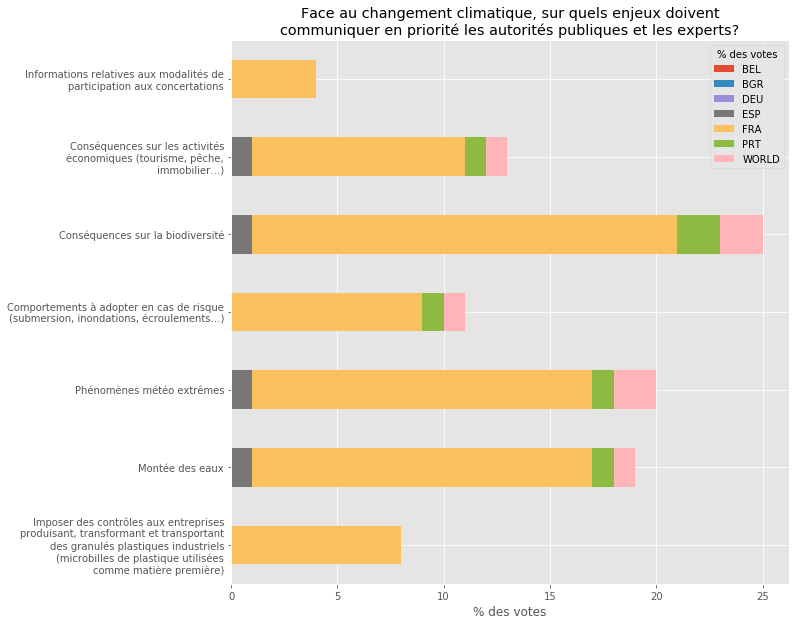

In [401]:
plot_moyenne_pct(q, scope)

## Question 14

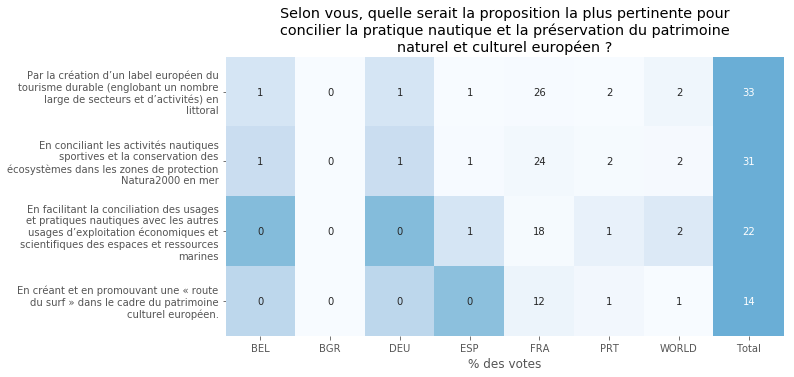

In [402]:
q = 14
plot_khi_2(q, scope)

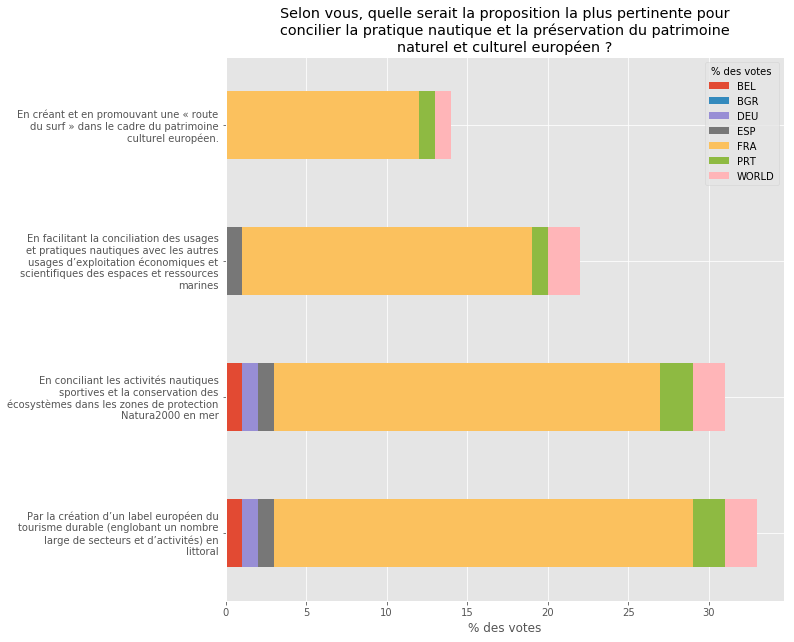

In [403]:
plot_moyenne_pct(q, scope)